# Лабораторная №3
__Цель лабораторной работы:__ изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

#### Задание:

1. Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    1. масштабирование признаков (не менее чем тремя способами);
    1. обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
    1. обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
    1. отбор признаков:
        - один метод из группы методов фильтрации (filter methods);
        - один метод из группы методов обертывания (wrapper methods);
        - один метод из группы методов вложений (embedded methods).

# Melbourne Housing Snapshot

- Rooms: Number of rooms
- Price: Price in dollars
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - - development site; o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size
- BuildingArea: Building Size
- CouncilArea: Governing council for the area

In [73]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv('melb_data.csv')

In [25]:
data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [75]:
total_count = data.shape[0]
num_cols = []
cat_cols = []
for col in data.columns:
    dt = str(data[col].dtype)
    if dt=='float64' or dt=='int64':
        num_cols.append(col)
    elif dt=='object':
        cat_cols.append(col)

In [76]:
data = data.fillna(data.mode())

In [77]:
data[:] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(data)

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical1 = ['Suburb', 'Address', 'SellerG', 'CouncilArea']
for col in categorical1:
    data[col] = le.fit_transform(data[col])

In [79]:
categorical2 = ['Type', 'Method', 'Regionname']

data = pd.concat([data, pd.get_dummies(data[categorical2], columns=categorical2, drop_first=True)],axis=1)
data.drop(categorical2, axis=1, inplace=True)

## Нестандартный признак

Преобразуем дату

In [80]:
import datetime as dt

data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(dt.datetime.toordinal)

## Масштабирование данных

In [5]:
def arr_to_df(arr_scaled, columns):
    res = pd.DataFrame(arr_scaled, columns=columns)
    return res

#### MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data_minmax = arr_to_df( min_max_scaler.fit_transform(data), data.columns )
data_minmax.describe()

Suburb       Address         Rooms         Price       SellerG  \
count  13580.000000  13580.000000  13580.000000  13580.000000  13580.000000   
mean       0.496192      0.499906      0.215333      0.111126      0.489929   
std        0.288523      0.288533      0.106194      0.071712      0.291146   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.223642      0.250112      0.111111      0.063376      0.273408   
50%        0.492013      0.499701      0.222222      0.091755      0.505618   
75%        0.747604      0.749664      0.222222      0.139652      0.726592   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               Date      Distance      Postcode      Bedroom2      Bathroom  \
count  13580.000000  13580.000000  13580.000000  13580.000000  13580.000000   
mean       0.524248      0.210765      0.107781      0.145736      0.191780   
std        0.264164      0.122011      0.092812      0.048296      0.086464   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.286765      0.126819      0.045036      0.100000      0.125000   
50%        0.579412      0.191268      0.085977      0.150000      0.125000   
75%        0.754412      0.270270      0.151484      0.150000      0.250000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...     Method_SA     Method_SP     Method_VB  \
count  ...  13580.000000  13580.000000  13580.000000   
mean   ...      0.006775      0.125405      0.088292   
std    ...      0.082032      0.331190      0.283729   
min    ...      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000   

       Regionname_Eastern Victoria  Regionname_Northern Metropolitan  \
count                 13580.000000                      13580.000000   
mean                      0.003903                          0.286451   
std                       0.062353                          0.452119   
min                       0.000000                          0.000000   
25%                       0.000000                          0.000000   
50%                       0.000000                          0.000000   
75%                       0.000000                          1.000000   
max                       1.000000                          1.000000   

       Regionname_Northern Victoria  Regionname_South-Eastern Metropolitan  \
count                  13580.000000                           13580.000000   
mean                       0.003019                               0.033137   
std                        0.054866                               0.179001   
min                        0.000000                               0.000000   
25%                        0.000000                               0.000000   
50%                        0.000000                               0.000000   
75%                        0.000000                               0.000000   
max                        1.000000                               1.000000   

       Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
count                      13580.000000                     13580.000000   
mean                           0.345729                         0.217084   
std                            0.475623                         0.412275   
min                            0.000000                         0.000000   
25%                            0.000000                         0.000000   
50%                            0.000000                         0.000000   
75%                            1.000000                         0.000000   
max                            1.000000                         1.000000   

       Regionname_Western Victoria  
count     

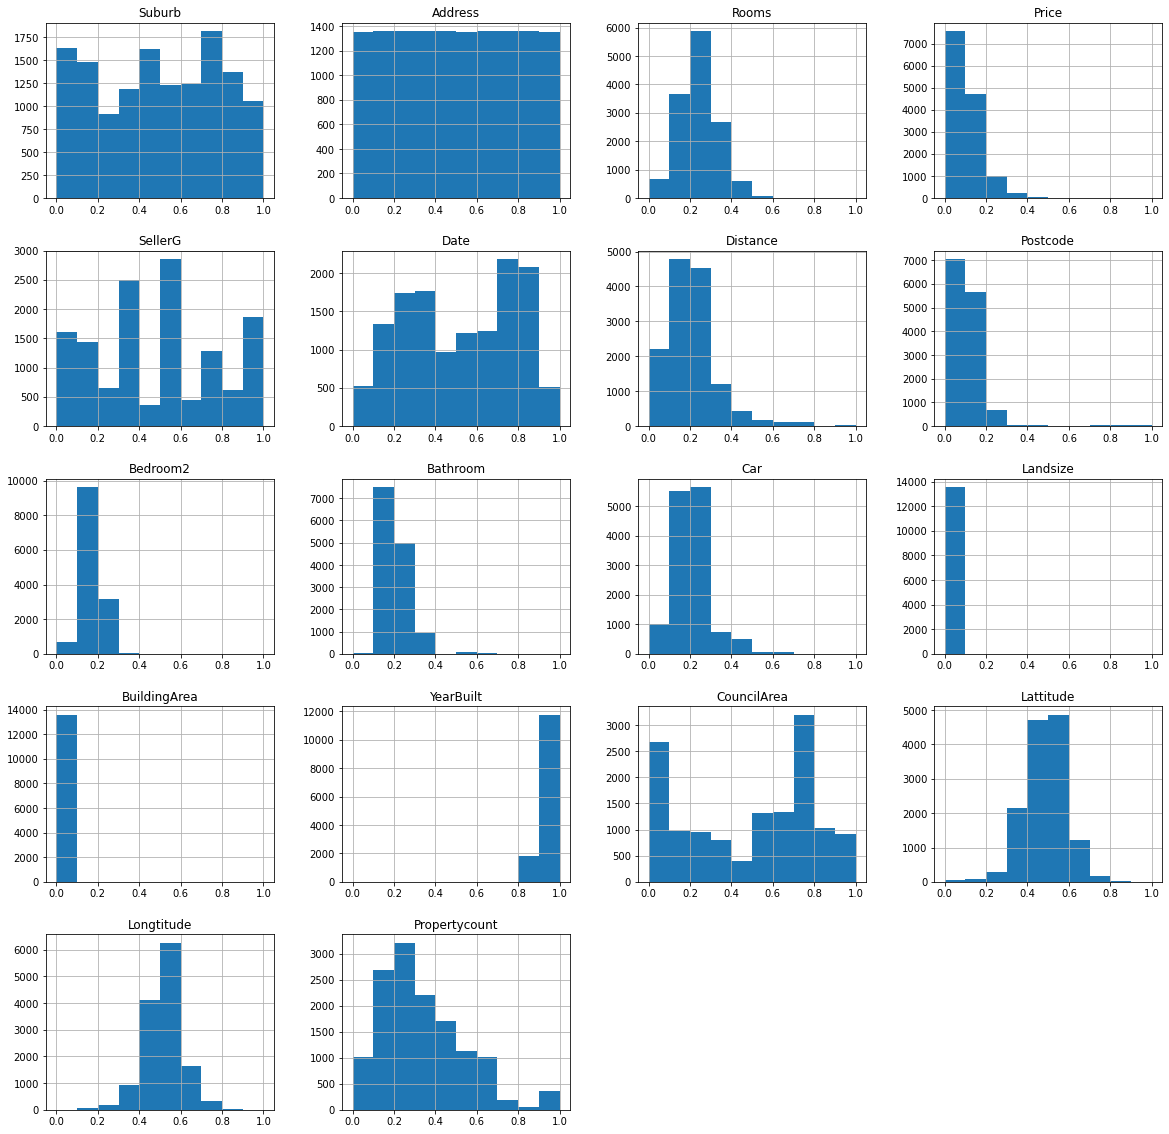

In [16]:
data_minmax[num_cols].hist(figsize=(20,20))
plt.show()

#### StandardScaler

In [17]:
from sklearn.preprocessing import StandardScaler

cs11 = StandardScaler()
data_stscal = arr_to_df( cs11.fit_transform(data), data.columns )
data_stscal.describe()

Suburb       Address         Rooms         Price       SellerG  \
count  1.358000e+04  1.358000e+04  1.358000e+04  1.358000e+04  1.358000e+04   
mean   6.990481e-16  1.463401e-17 -4.175779e-15  2.150546e-16 -1.428084e-16   
std    1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00   
min   -1.719825e+00 -1.732641e+00 -2.027803e+00 -1.549670e+00 -1.682823e+00   
25%   -9.446698e-01 -8.657696e-01 -9.814634e-01 -6.658730e-01 -7.437115e-01   
50%   -1.448380e-02 -7.119996e-04  6.487613e-02 -2.701197e-01  5.388991e-02   
75%    8.714076e-01  8.656411e-01  6.487613e-02  3.978117e-01  8.128977e-01   
max    1.746225e+00  1.733290e+00  7.389253e+00  1.239555e+01  1.752009e+00   

               Date      Distance      Postcode      Bedroom2      Bathroom  \
count  1.358000e+04  1.358000e+04  1.358000e+04  1.358000e+04  1.358000e+04   
mean   2.702633e-13 -7.168296e-16  4.574642e-16  2.301187e-15 -5.122134e-15   
std    1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00   
min   -1.984625e+00 -1.727488e+00 -1.161329e+00 -3.017674e+00 -2.218118e+00   
25%   -8.990304e-01 -6.880412e-01 -6.760722e-01 -9.470352e-01 -7.723755e-01   
50%    2.088330e-01 -1.597980e-01 -2.349296e-01  8.828423e-02 -7.723755e-01   
75%    8.713242e-01  4.877259e-01  4.708986e-01  8.828423e-02  6.733667e-01   
max    1.801039e+00  6.468802e+00  9.613579e+00  1.768871e+01  9.347820e+00   

       ...     Method_SA     Method_SP     Method_VB  \
count  ...  1.358000e+04  1.358000e+04  1.358000e+04   
mean   ...  4.526853e-15  1.487274e-15 -2.525308e-16   
std    ...  1.000037e+00  1.000037e+00  1.000037e+00   
min    ... -8.258861e-02 -3.786639e-01 -3.111944e-01   
25%    ... -8.258861e-02 -3.786639e-01 -3.111944e-01   
50%    ... -8.258861e-02 -3.786639e-01 -3.111944e-01   
75%    ... -8.258861e-02 -3.786639e-01 -3.111944e-01   
max    ...  1.210821e+01  2.640864e+00  3.213426e+00   

       Regionname_Eastern Victoria  Regionname_Northern Metropolitan  \
count                 1.358000e+04                      1.358000e+04   
mean                  3.529236e-15                     -2.822844e-15   
std                   1.000037e+00                      1.000037e+00   
min                  -6.259465e-02                     -6.335967e-01   
25%                  -6.259465e-02                     -6.335967e-01   
50%                  -6.259465e-02                     -6.335967e-01   
75%                  -6.259465e-02                      1.578291e+00   
max                   1.597581e+01                      1.578291e+00   

       Regionname_Northern Victoria  Regionname_South-Eastern Metropolitan  \
count                  1.358000e+04                           1.358000e+04   
mean                  -1.360037e-14                          -1.409974e-14   
std                    1.000037e+00                           1.000037e+00   
min                   -5.502989e-02                          -1.851288e-01   
25%                   -5.502989e-02                          -1.851288e-01   
50%                   -5.502989e-02                          -1.851288e-01   
75%                   -5.502989e-02                          -1.851288e-01   
max                    1.817194e+01                           5.401646e+00   

       Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
count                      1.358000e+04                     1.358000e+04   
mean                      -1.928006e-14                     4.163680e-15   
std                        1.000037e+00                     1.000037e+00   
min                       -7.269241e-01                    -5.265702e-01   
25%                       -7.269241e-01                    -5.265702e-01   
50%                       -7.269241e-01                    -5.265702e-01   
75%                        1.375659e+00                    -5.265702e-01   
max                        1.375659e+00                     1.899082e+00   

       Regionname_Western Victoria  
count     

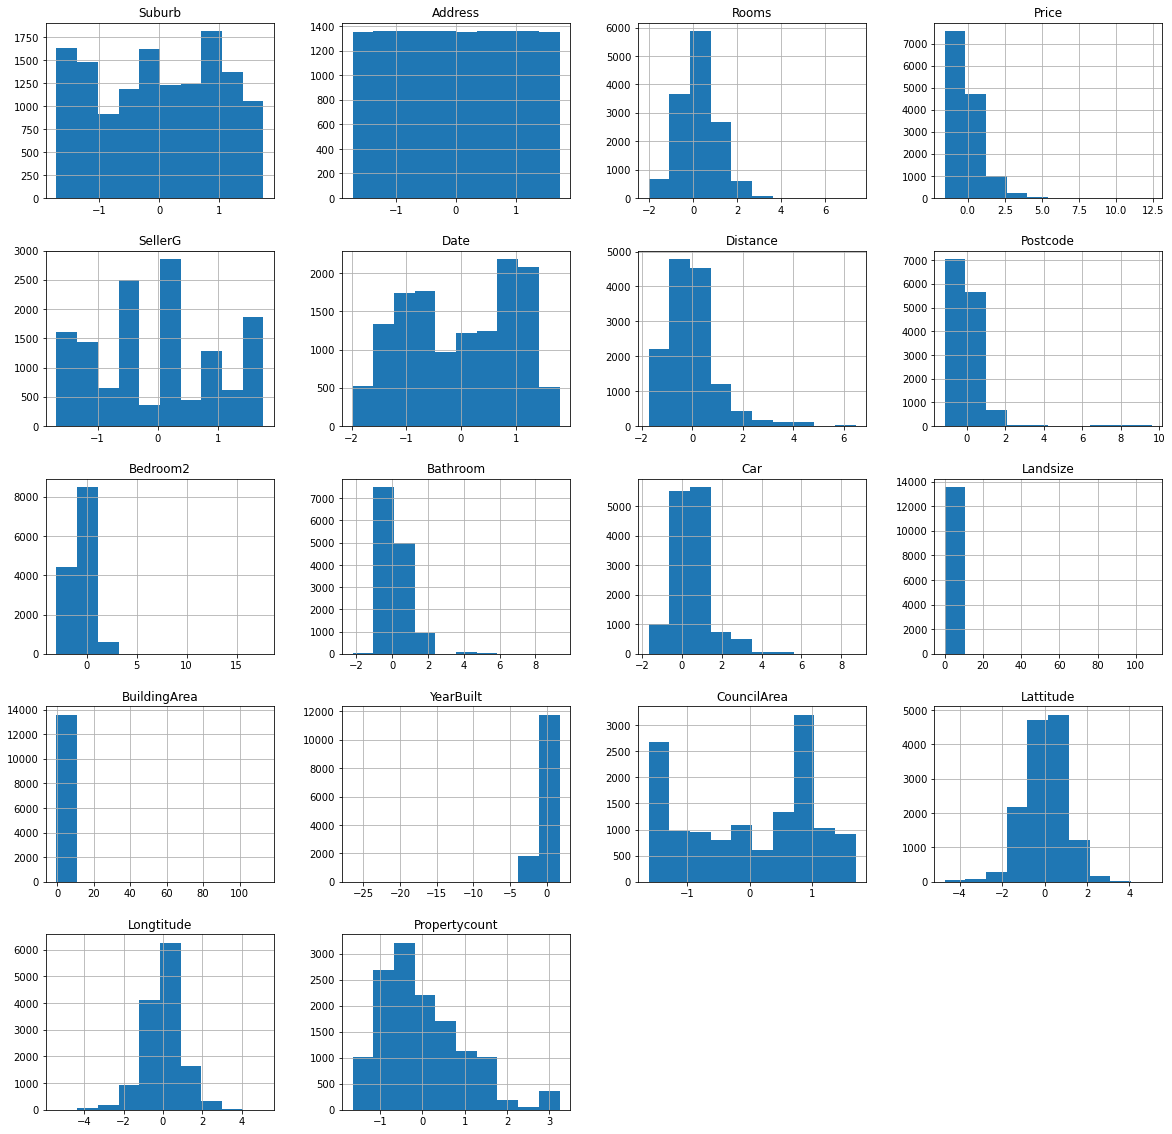

In [18]:
data_stscal[num_cols].hist(figsize=(20,20))
plt.show()

#### MeanNormalisation

In [19]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = param_df.mean(axis=0)
        maxs = param_df.max(axis=0)
        mins = param_df.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [20]:
sc21 = MeanNormalisation()
data_meann = sc21.fit_transform(data)
data_meann.describe()

Suburb       Address         Rooms         Price       SellerG  \
count  1.358000e+04  1.358000e+04  1.358000e+04  1.358000e+04  1.358000e+04   
mean  -1.206726e-15  6.454500e-18 -6.437004e-16  1.574230e-17 -4.696374e-17   
std    2.885235e-01  2.885334e-01  1.061942e-01  7.171180e-02  2.911458e-01   
min   -4.961915e-01 -4.999064e-01 -2.153330e-01 -1.111255e-01 -4.899287e-01   
25%   -2.725494e-01 -2.497943e-01 -1.042219e-01 -4.774920e-02 -2.165205e-01   
50%   -4.178763e-03 -2.054281e-04  6.889216e-03 -1.937006e-02  1.568924e-02   
75%    2.514123e-01  2.497572e-01  6.889216e-03  2.852674e-02  2.366630e-01   
max    5.038085e-01  5.000936e-01  7.846670e-01  8.888745e-01  5.100713e-01   

               Date      Distance      Postcode      Bedroom2      Bathroom  \
count  1.358000e+04  1.358000e+04  1.358000e+04  1.358000e+04  1.358000e+04   
mean   7.065129e-14  5.358080e-15  1.094393e-16 -2.057561e-16 -3.793296e-16   
std    2.641642e-01  1.220109e-01  9.281163e-02  4.829605e-02  8.646397e-02   
min   -5.242476e-01 -2.107646e-01 -1.077809e-01 -1.457364e-01 -1.917802e-01   
25%   -2.374829e-01 -8.394545e-02 -6.274505e-02 -4.573638e-02 -6.678019e-02   
50%    5.516417e-02 -1.949639e-02 -2.180339e-02  4.263623e-03 -6.678019e-02   
75%    2.301642e-01  5.950569e-02  4.370326e-02  4.263623e-03  5.821981e-02   
max    4.757524e-01  7.892354e-01  8.922191e-01  8.542636e-01  8.082198e-01   

       ...     Method_SA     Method_SP     Method_VB  \
count  ...  1.358000e+04  1.358000e+04  1.358000e+04   
mean   ...  2.320927e-17  1.311666e-15 -1.936738e-16   
std    ...  8.203212e-02  3.311898e-01  2.837290e-01   
min    ... -6.774669e-03 -1.254050e-01 -8.829161e-02   
25%    ... -6.774669e-03 -1.254050e-01 -8.829161e-02   
50%    ... -6.774669e-03 -1.254050e-01 -8.829161e-02   
75%    ... -6.774669e-03 -1.254050e-01 -8.829161e-02   
max    ...  9.932253e-01  8.745950e-01  9.117084e-01   

       Regionname_Eastern Victoria  Regionname_Northern Metropolitan  \
count                 1.358000e+04                      1.358000e+04   
mean                  3.308422e-16                     -1.488418e-15   
std                   6.235265e-02                      4.521192e-01   
min                  -3.902798e-03                     -2.864507e-01   
25%                  -3.902798e-03                     -2.864507e-01   
50%                  -3.902798e-03                     -2.864507e-01   
75%                  -3.902798e-03                      7.135493e-01   
max                   9.960972e-01                      7.135493e-01   

       Regionname_Northern Victoria  Regionname_South-Eastern Metropolitan  \
count                  1.358000e+04                           1.358000e+04   
mean                   2.110003e-16                           3.619236e-15   
std                    5.486577e-02                           1.790007e-01   
min                   -3.019146e-03                          -3.313697e-02   
25%                   -3.019146e-03                          -3.313697e-02   
50%                   -3.019146e-03                          -3.313697e-02   
75%                   -3.019146e-03                          -3.313697e-02   
max                    9.969809e-01                           9.668630e-01   

       Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
count                      1.358000e+04                     1.358000e+04   
mean                      -1.210549e-14                    -1.308968e-15   
std                        4.756229e-01                     4.122754e-01   
min                       -3.457290e-01                    -2.170839e-01   
25%                       -3.457290e-01                    -2.170839e-01   
50%                       -3.457290e-01                    -2.170839e-01   
75%                        6.542710e-01                    -2.170839e-01   
max                        6.542710e-01                     7.829161e-01   

       Regionname_Western Victoria  
count     

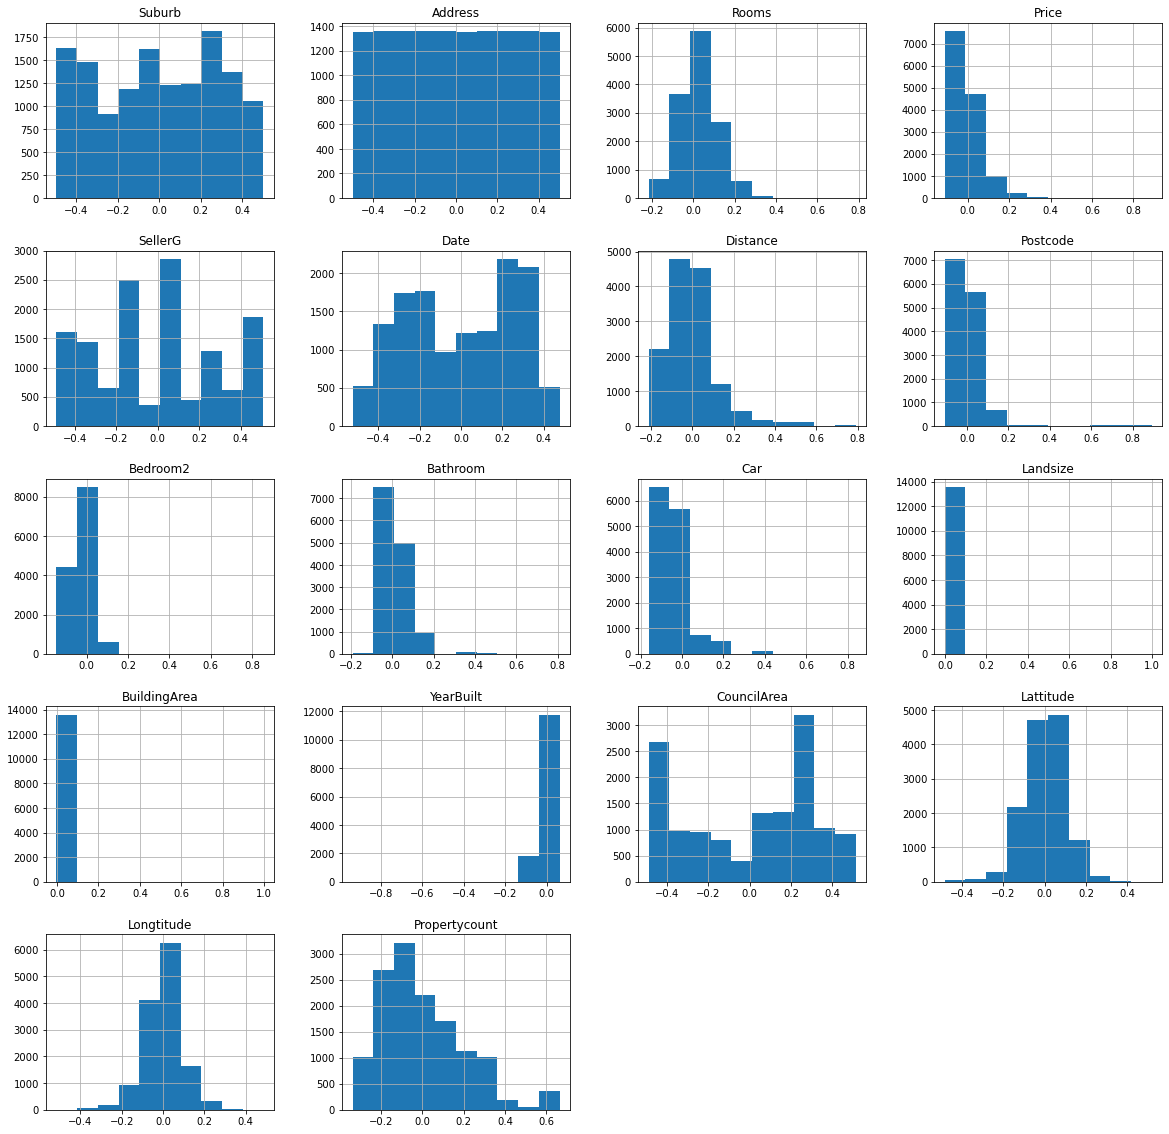

In [21]:
data_meann[num_cols].hist(figsize=(20,20))
plt.show()

In [22]:
data = data_minmax

## Обработка выбросов для числовых признаков

In [23]:
def diagnostic_plots_out(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [24]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [25]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

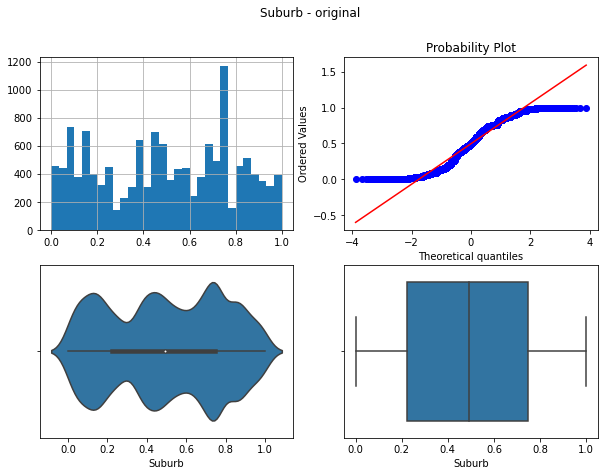

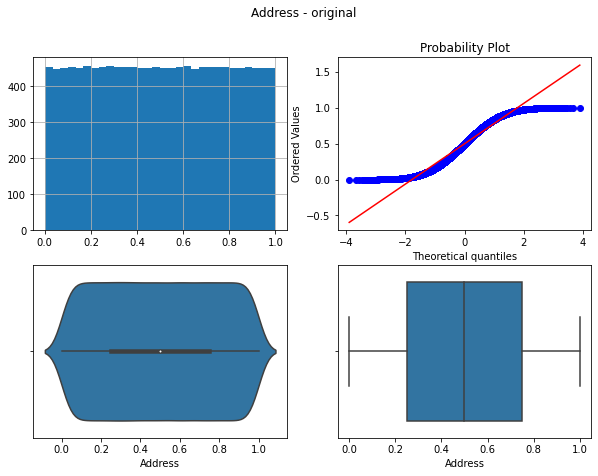

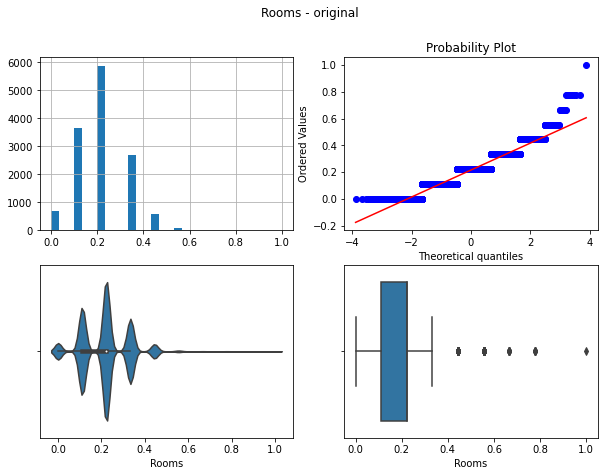

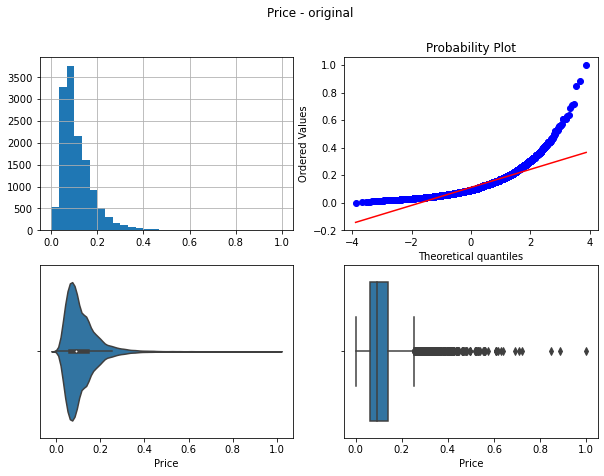

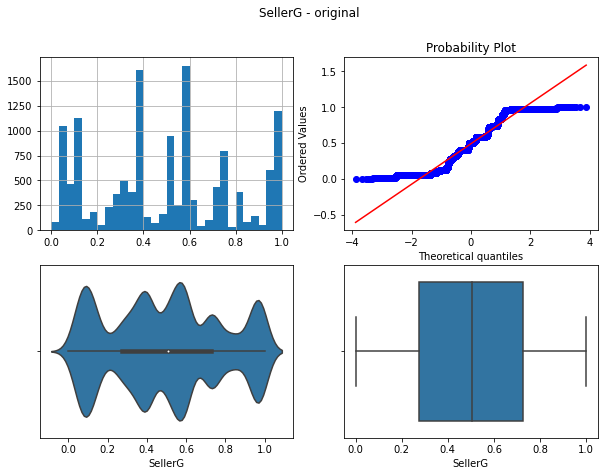

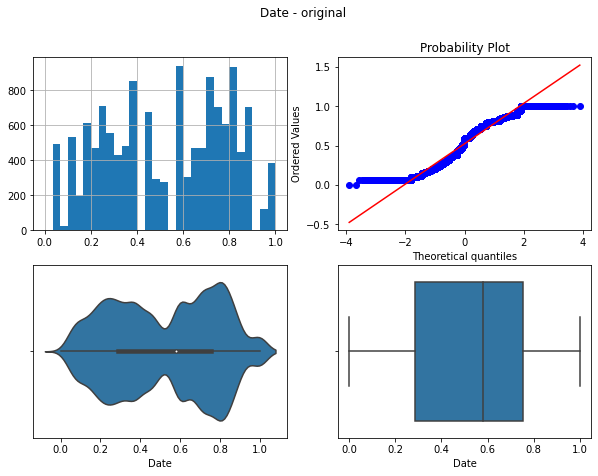

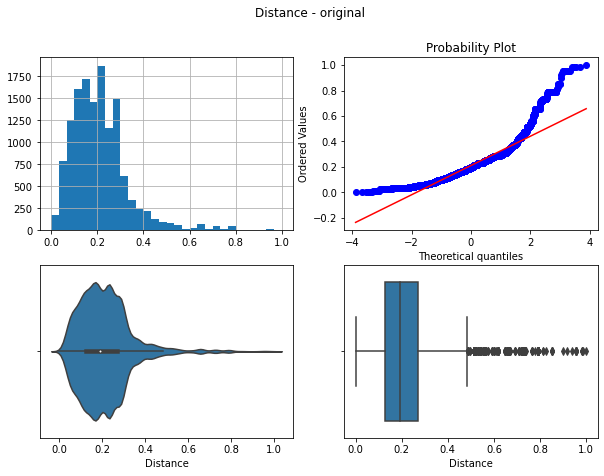

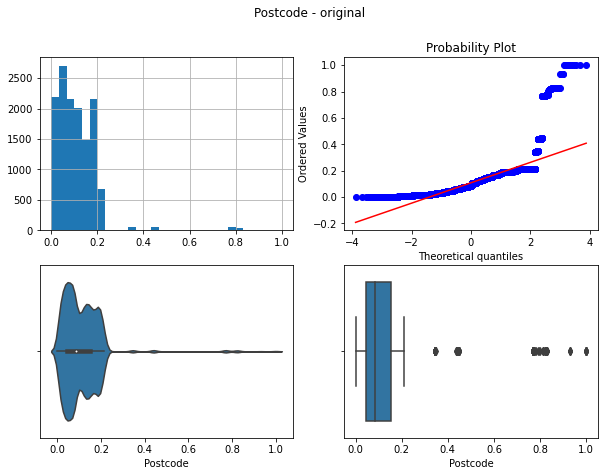

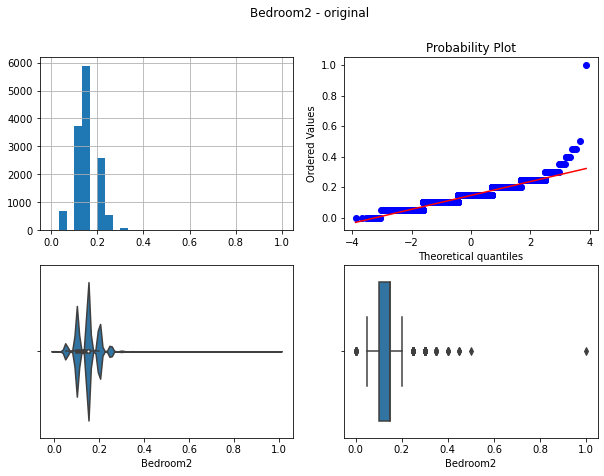

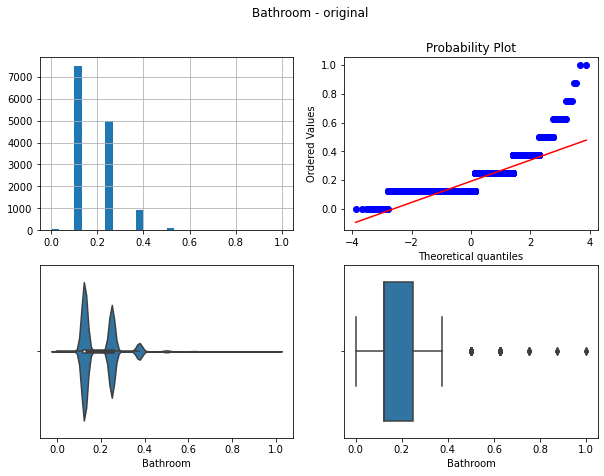

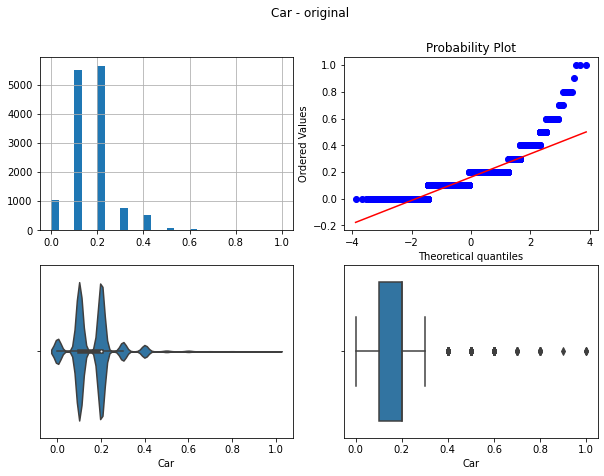

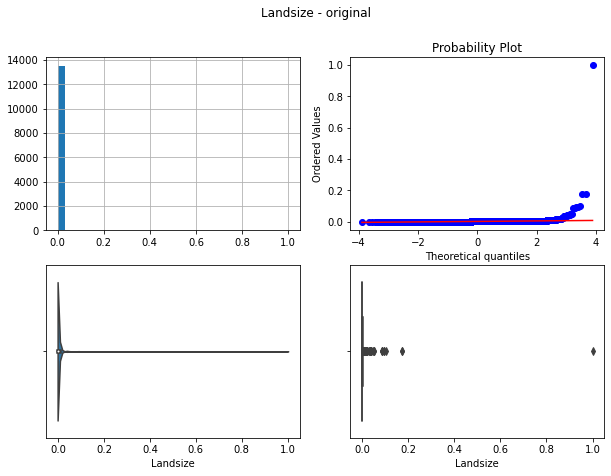

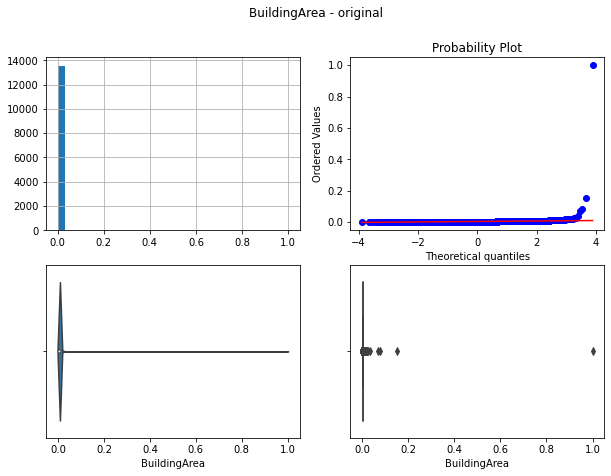

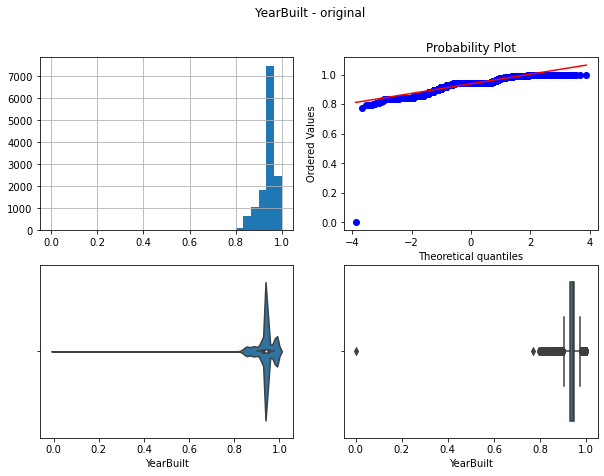

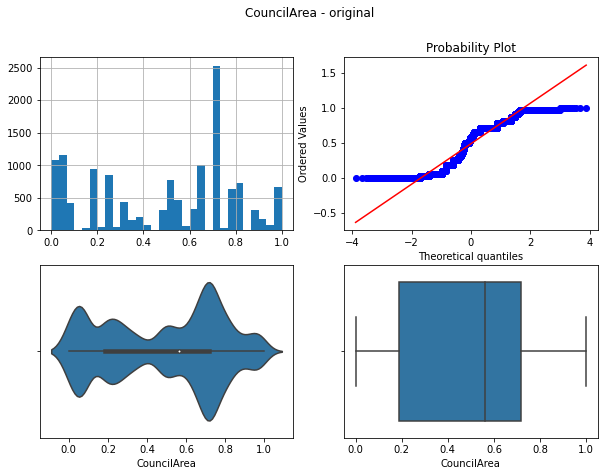

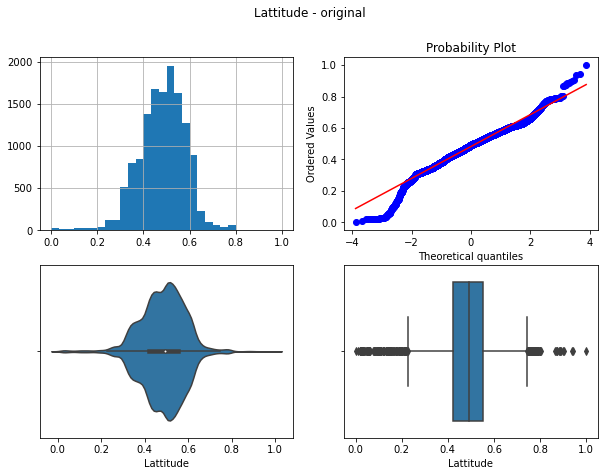

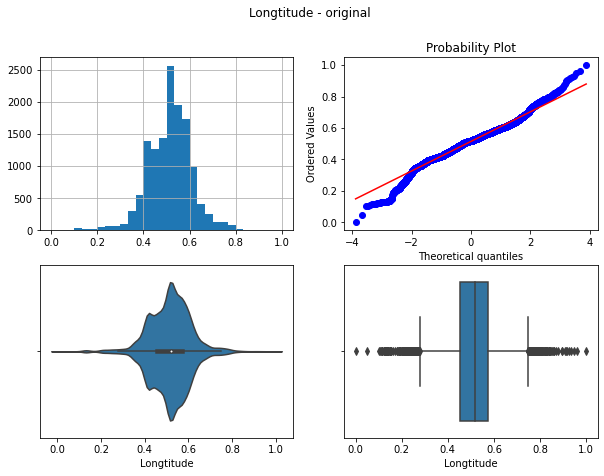

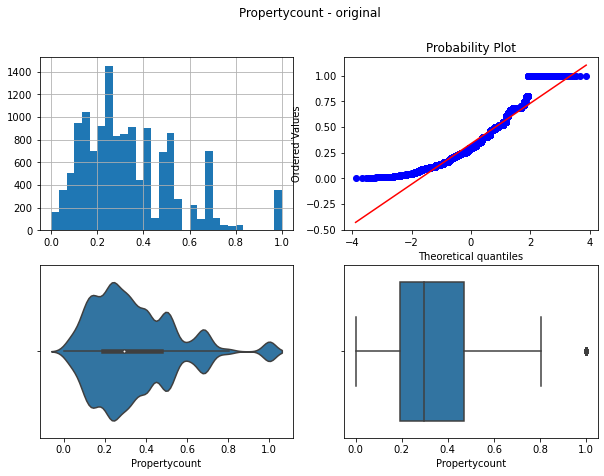

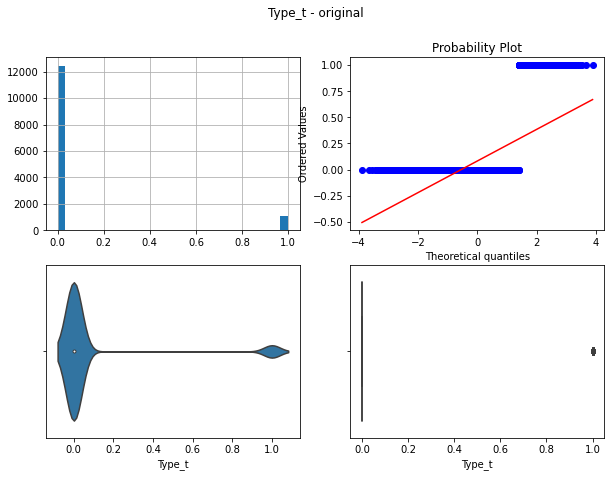

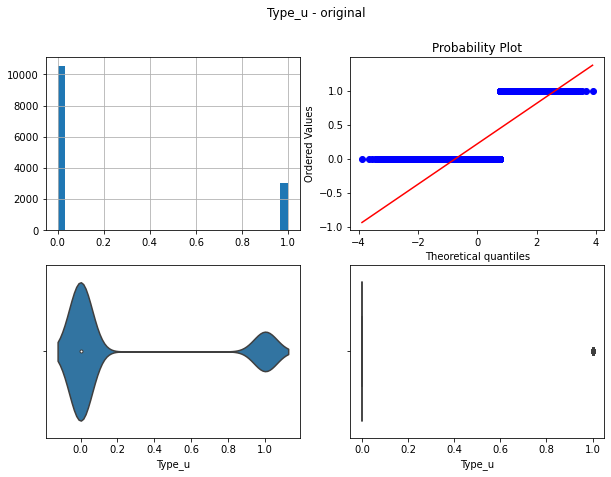

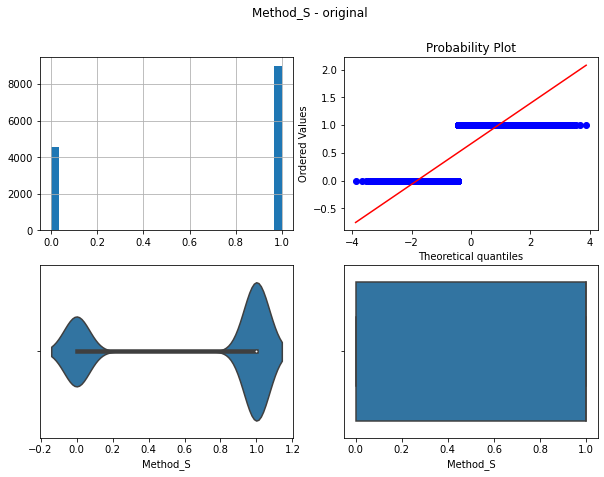

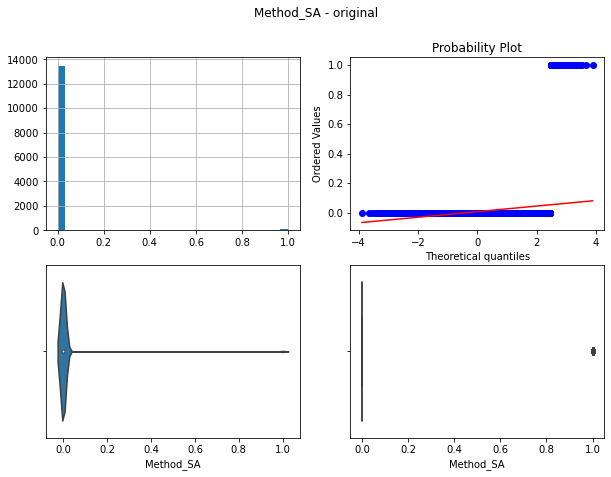

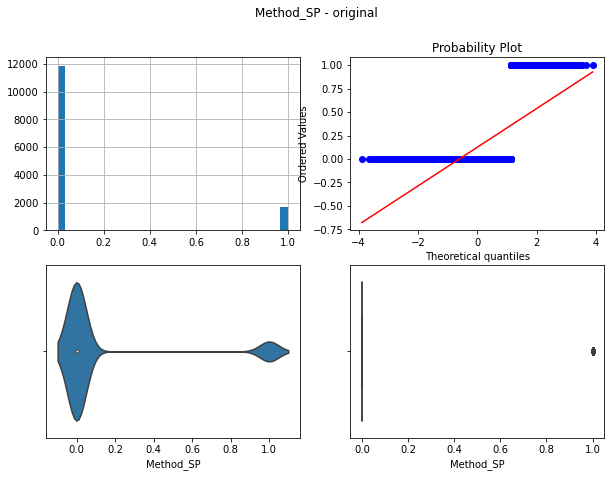

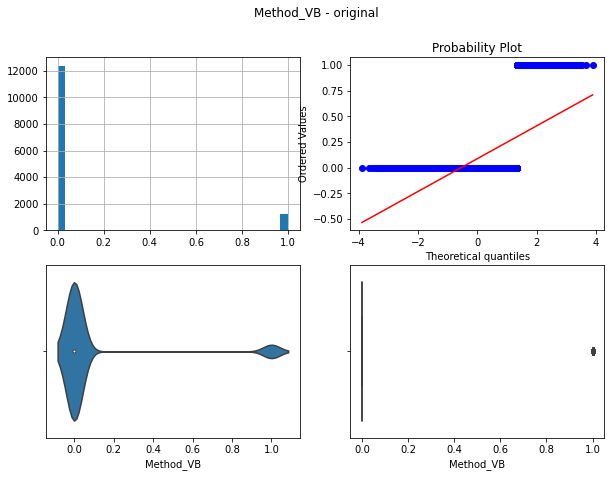

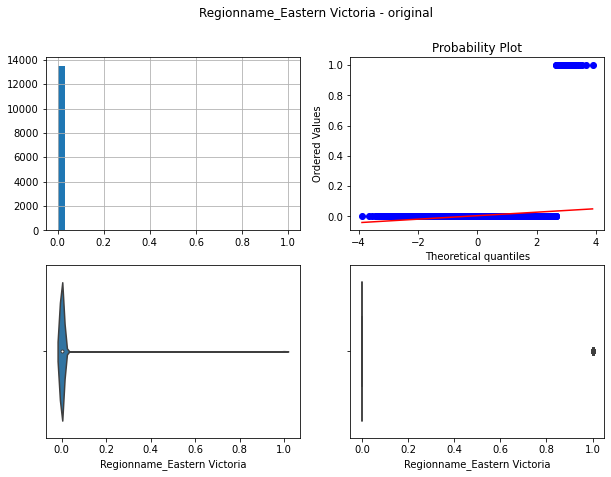

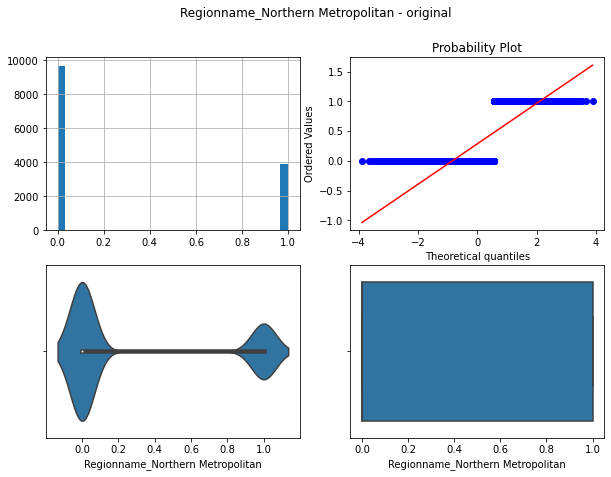

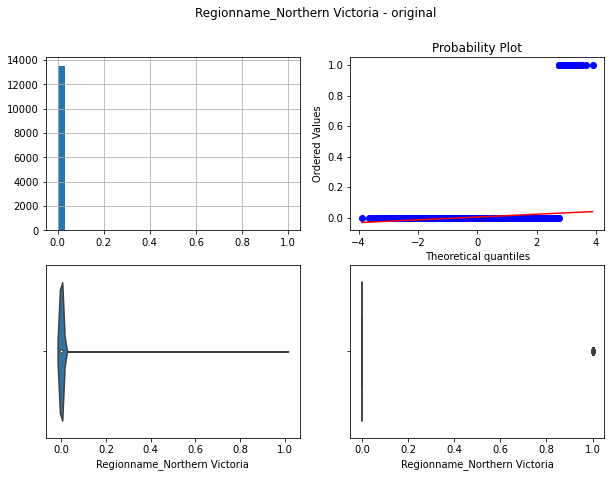

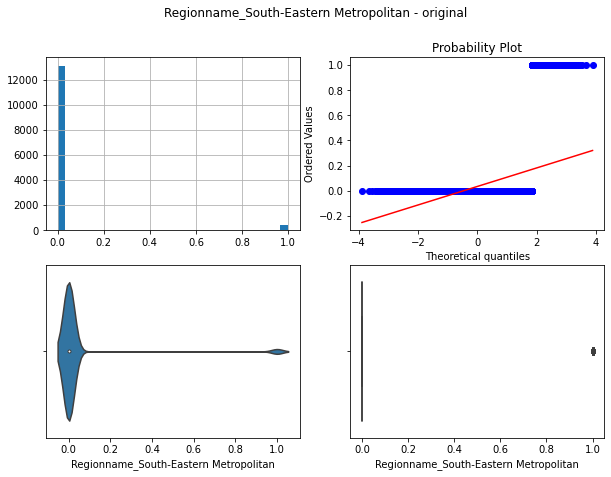

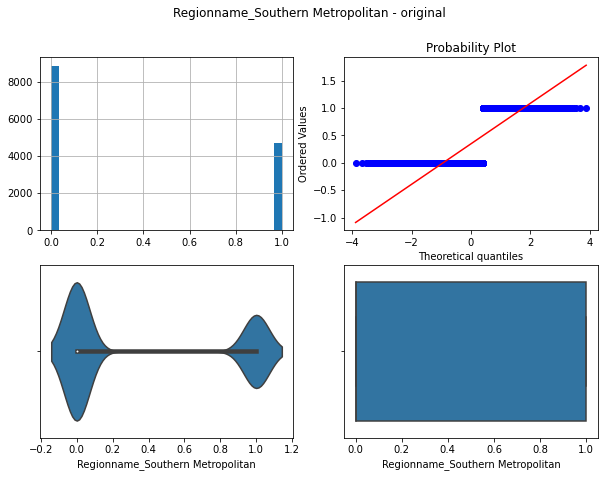

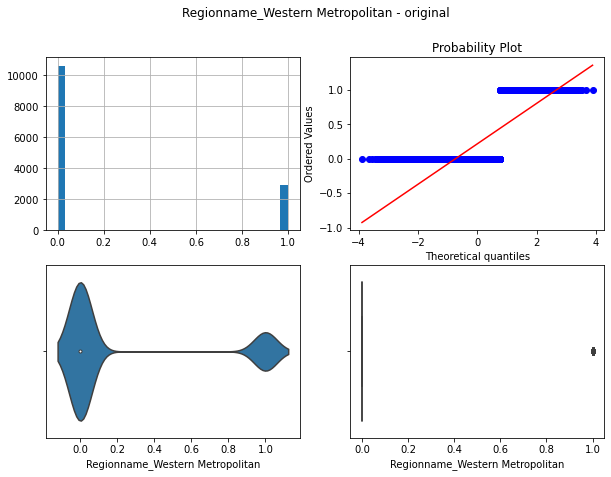

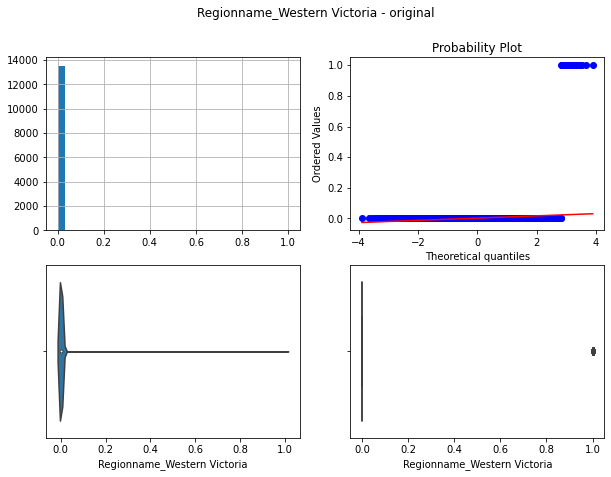

In [31]:
for col in num_cols:
    diagnostic_plots_out(data, col, col + ' - original') 

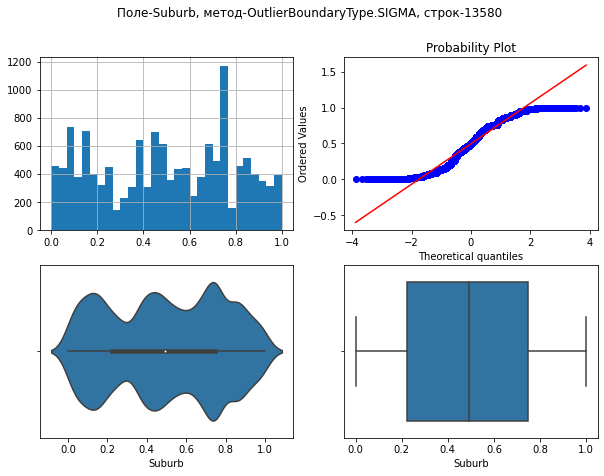

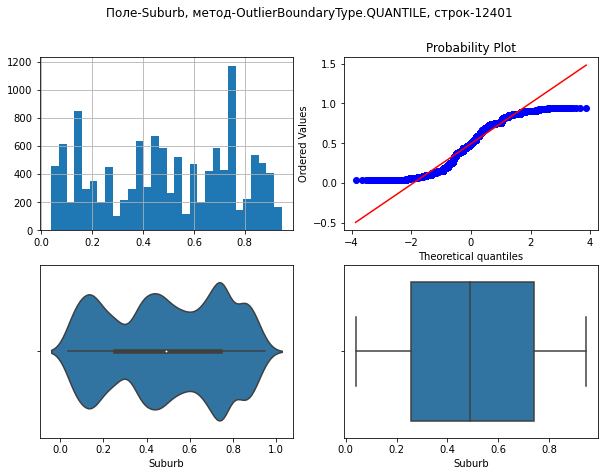

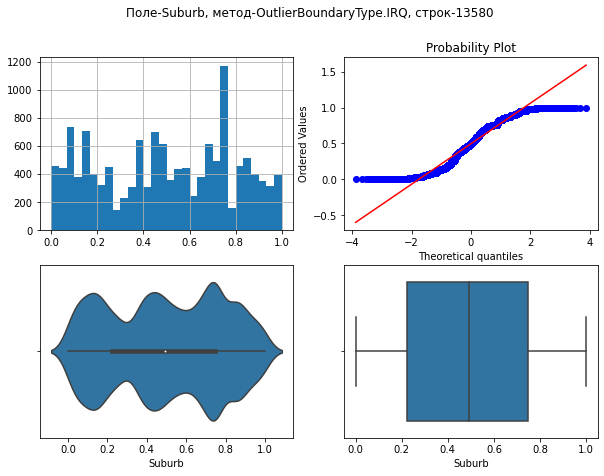

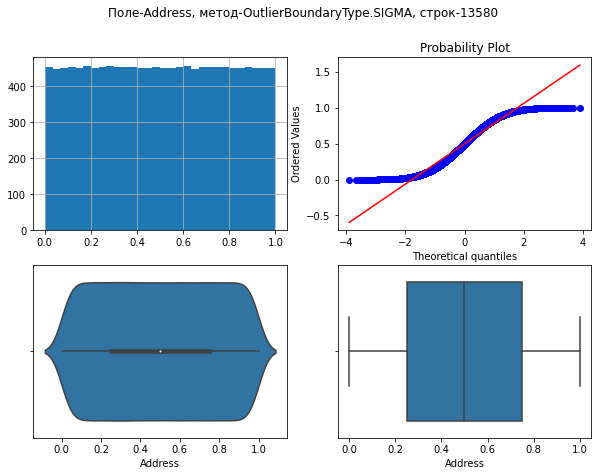

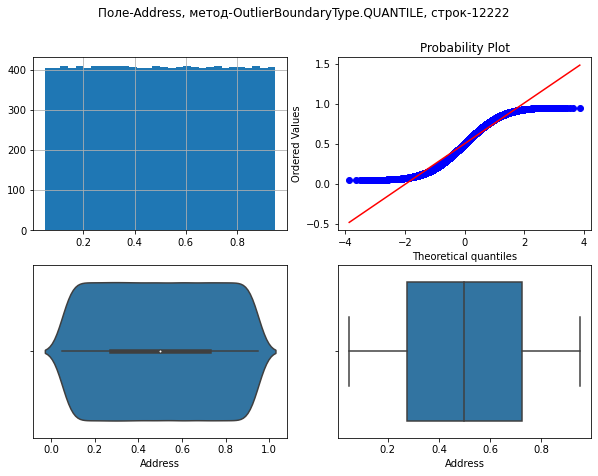

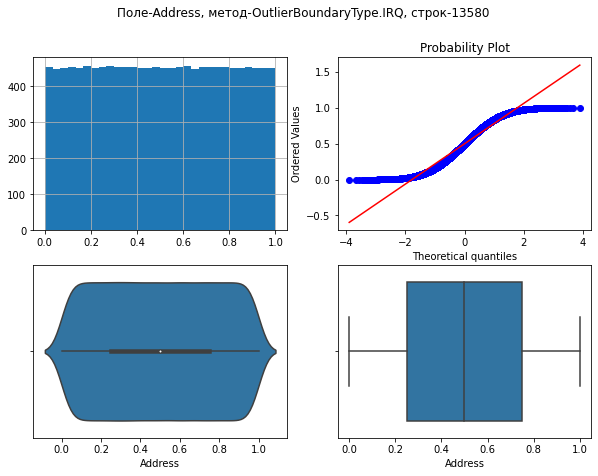

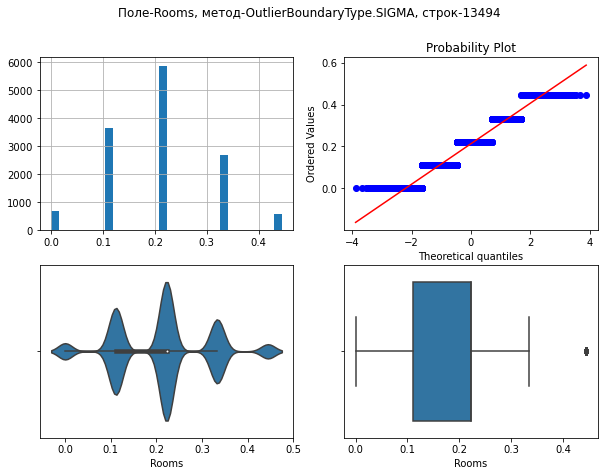

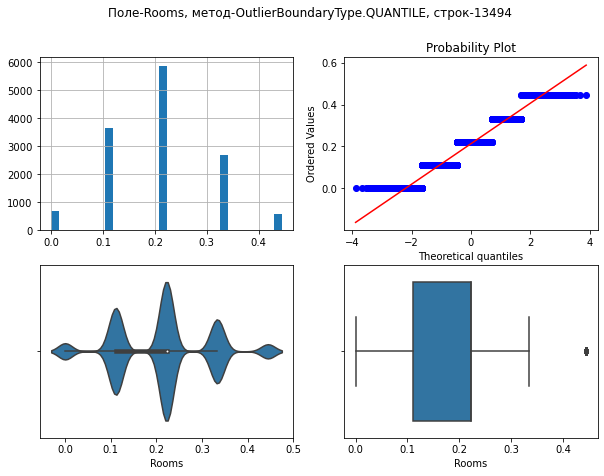

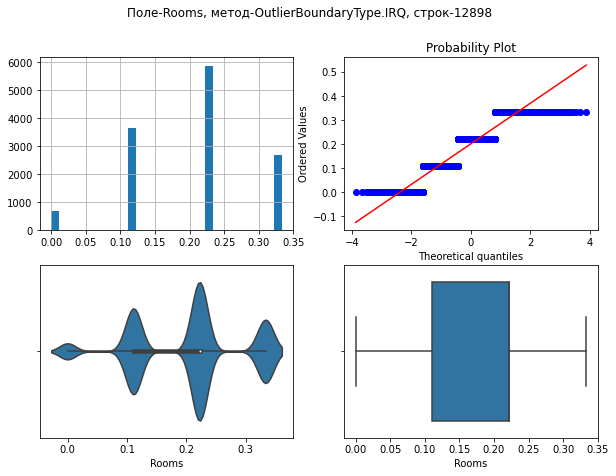

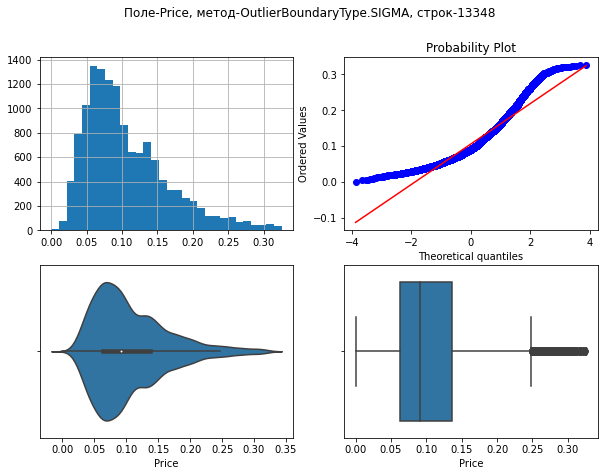

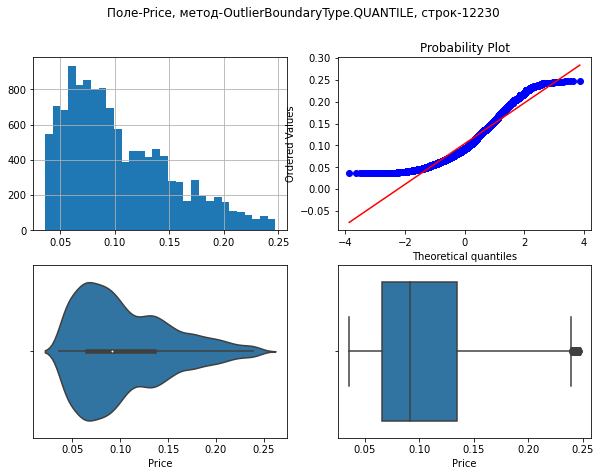

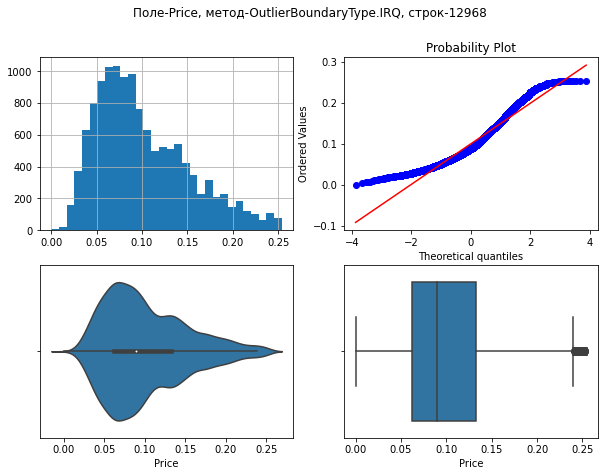

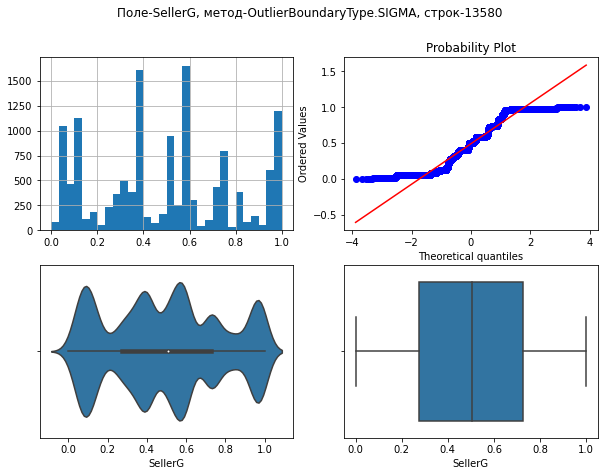

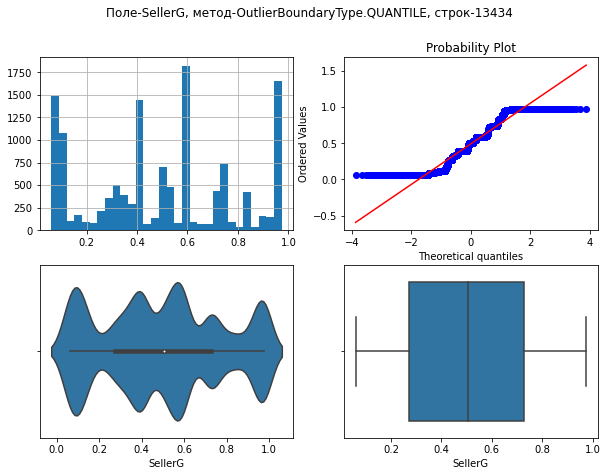

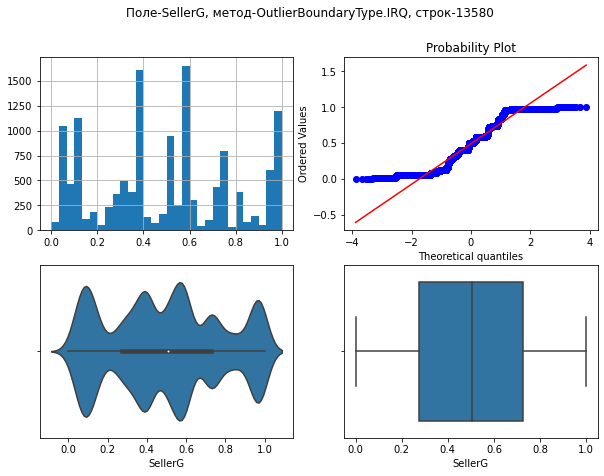

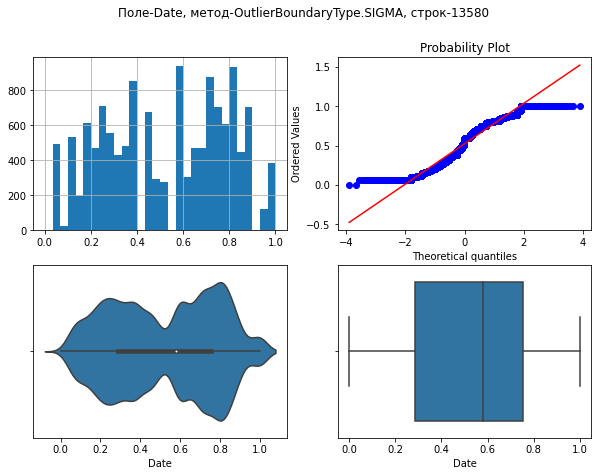

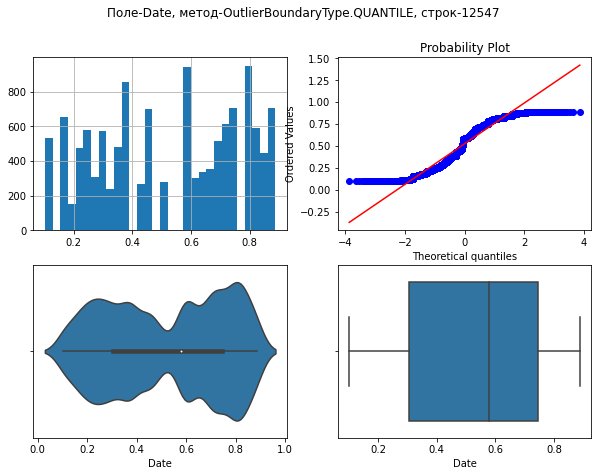

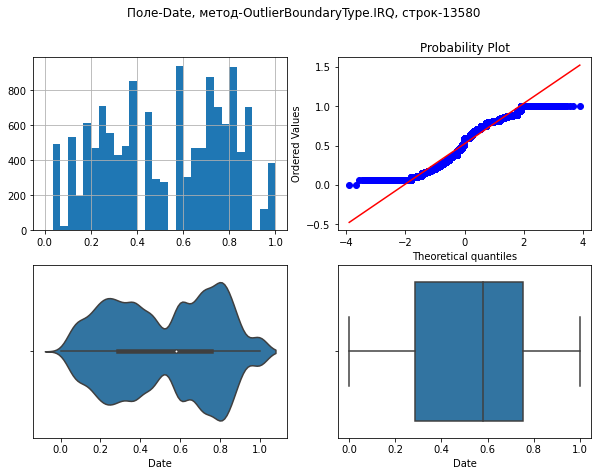

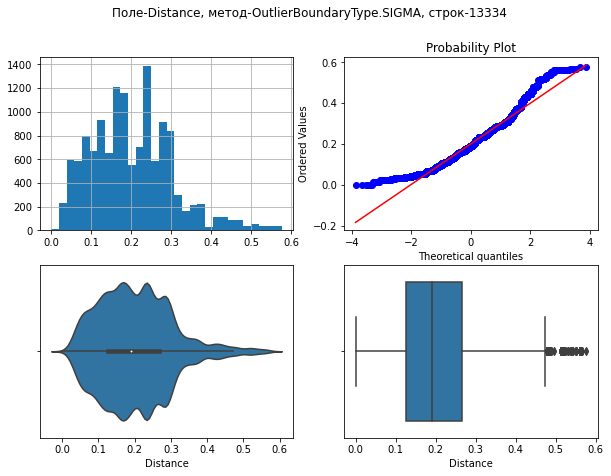

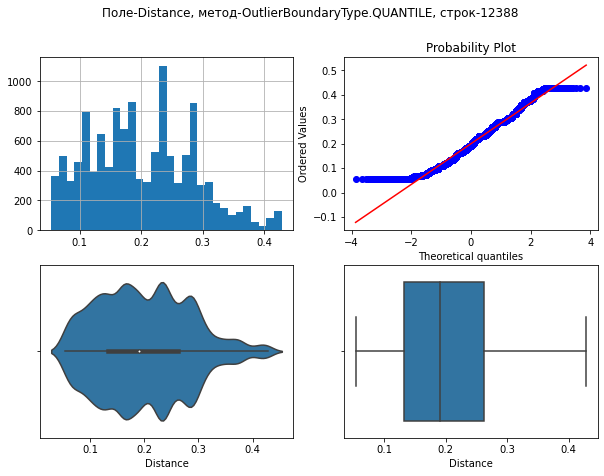

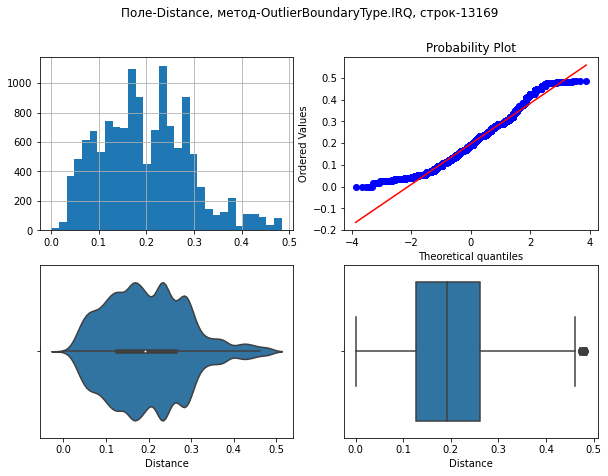

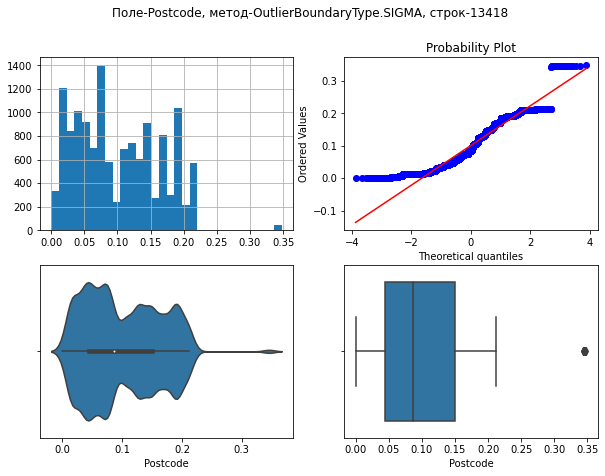

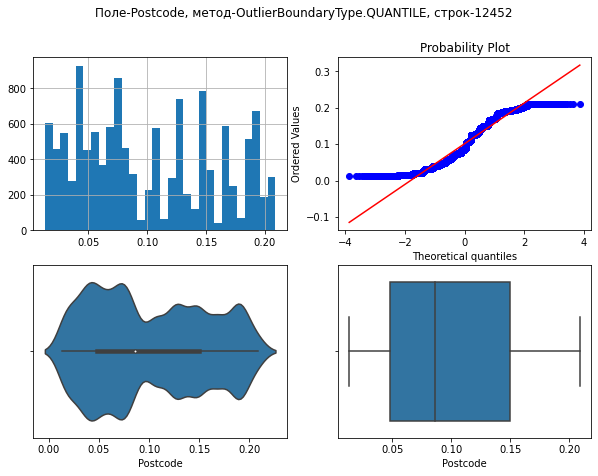

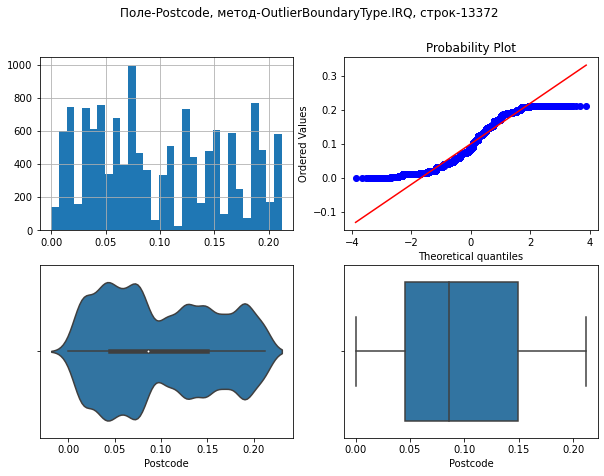

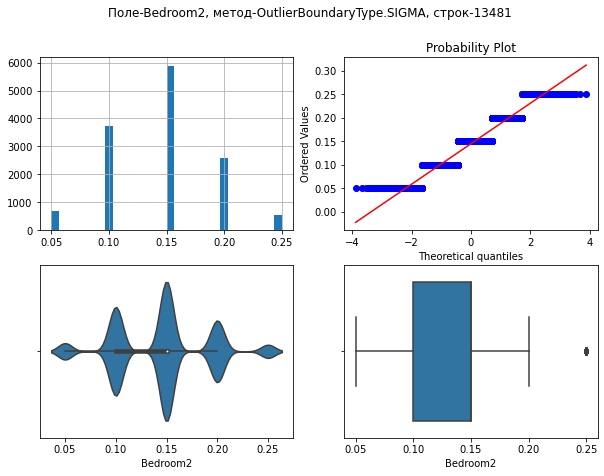

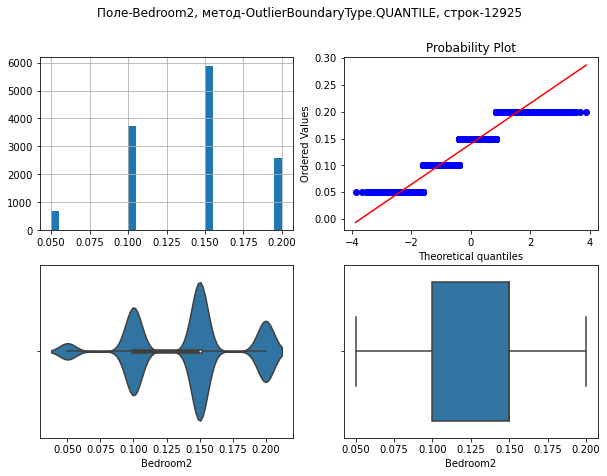

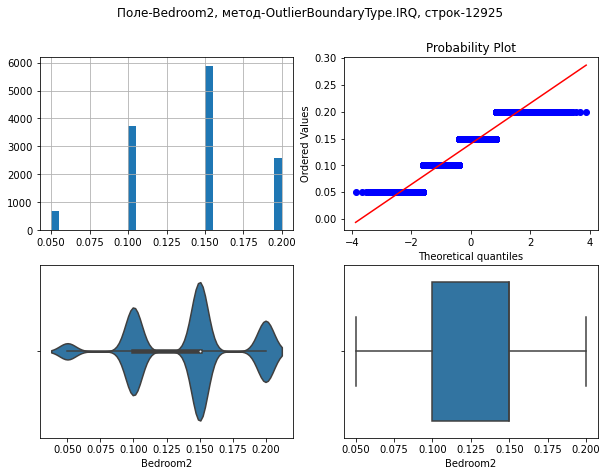

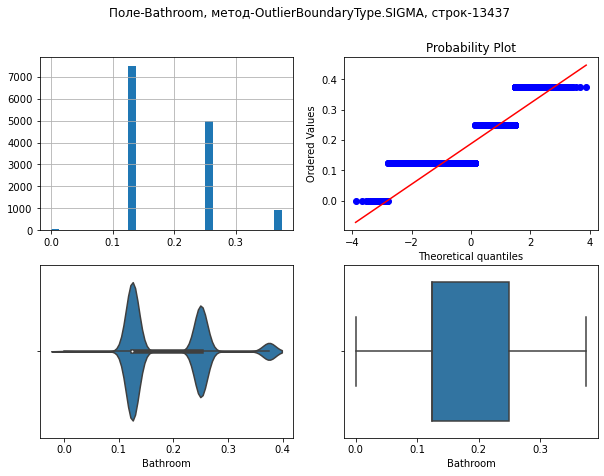

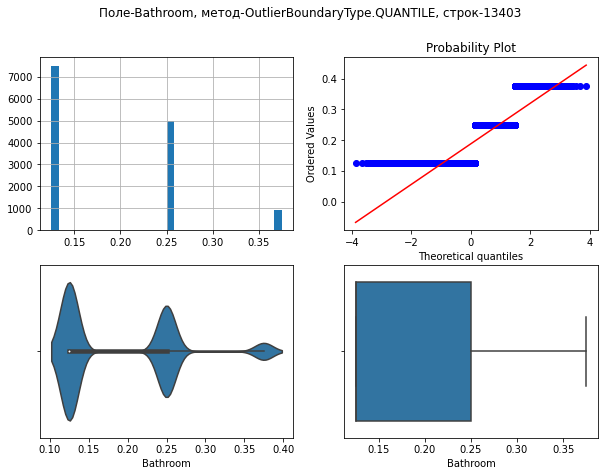

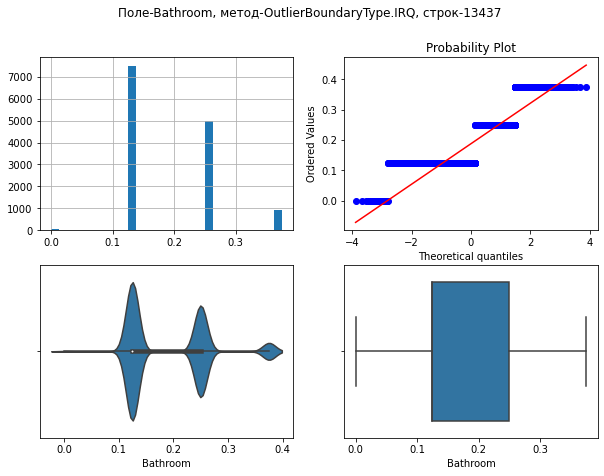

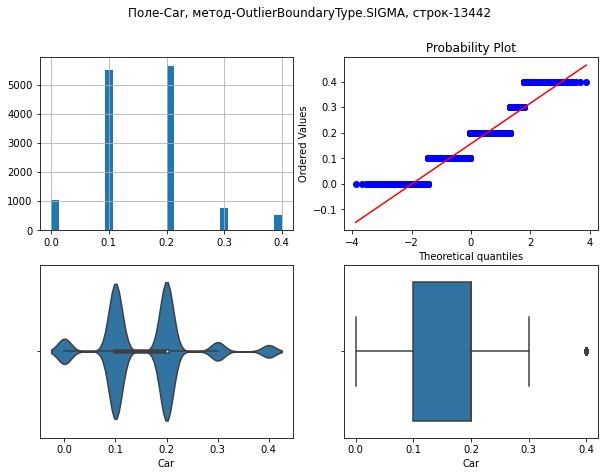

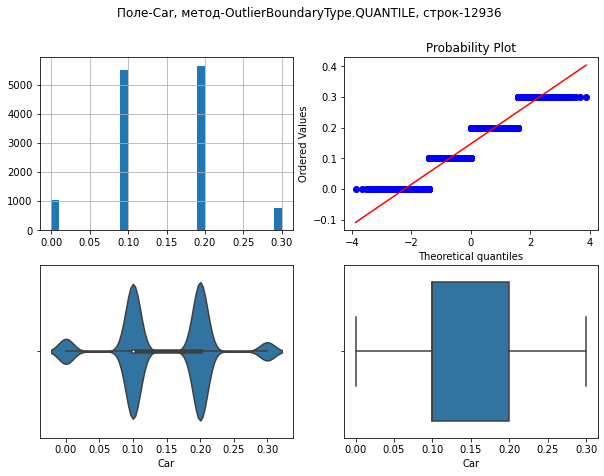

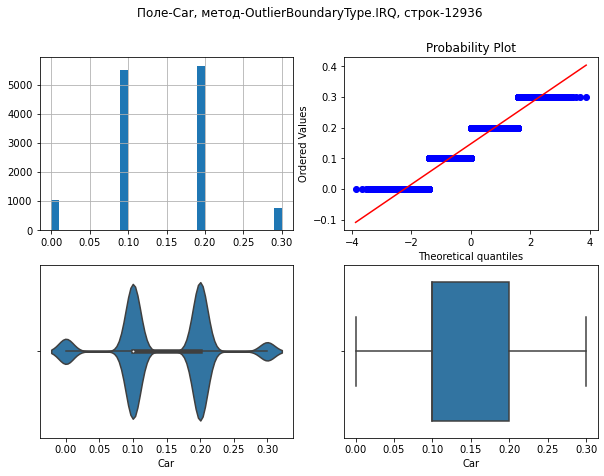

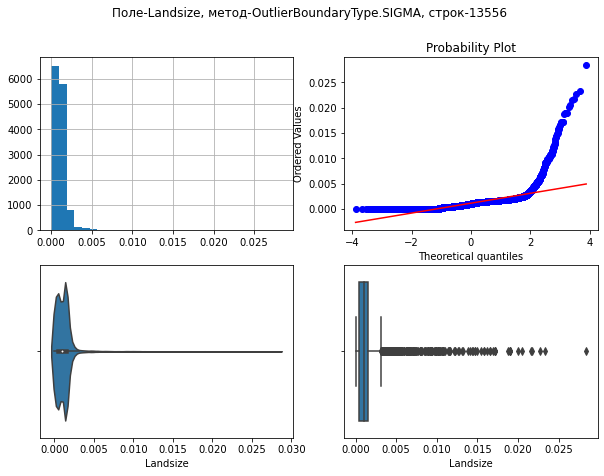

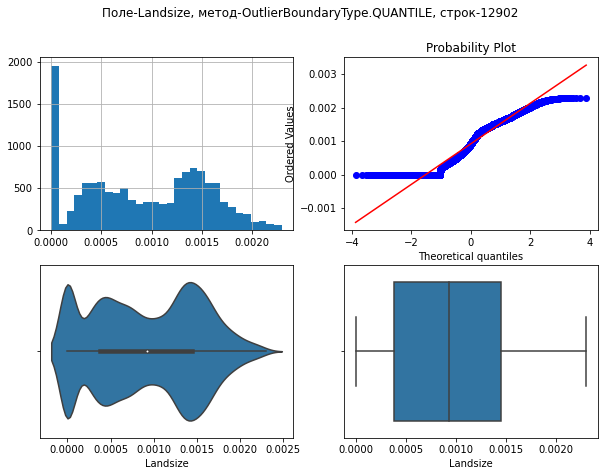

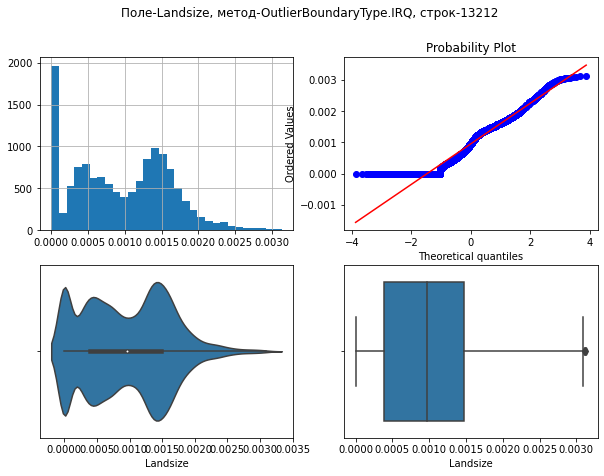

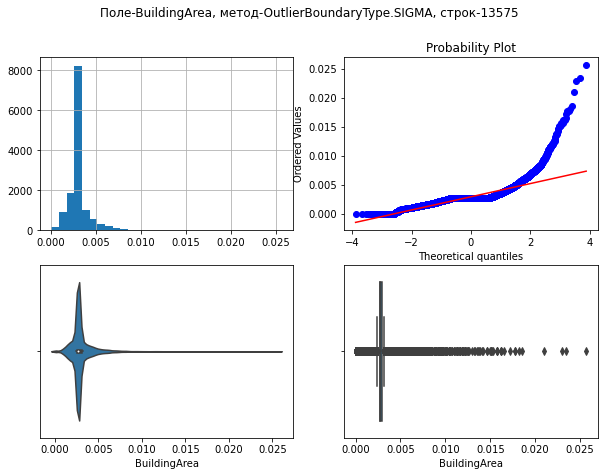

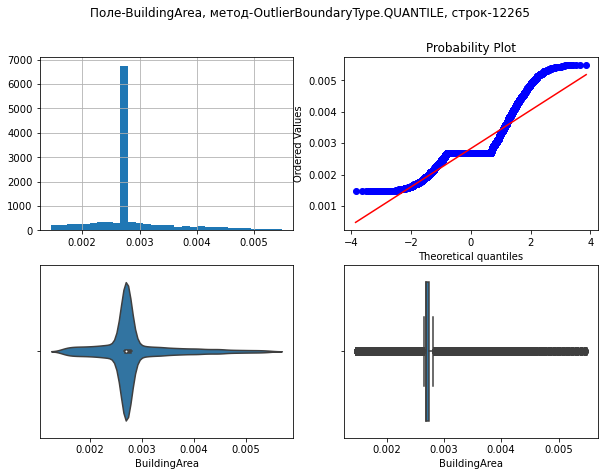

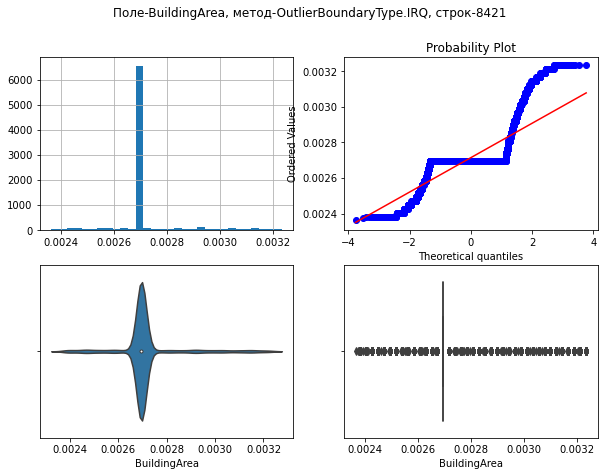

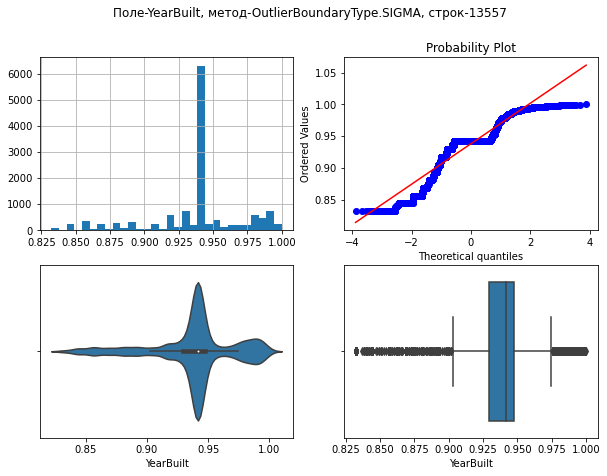

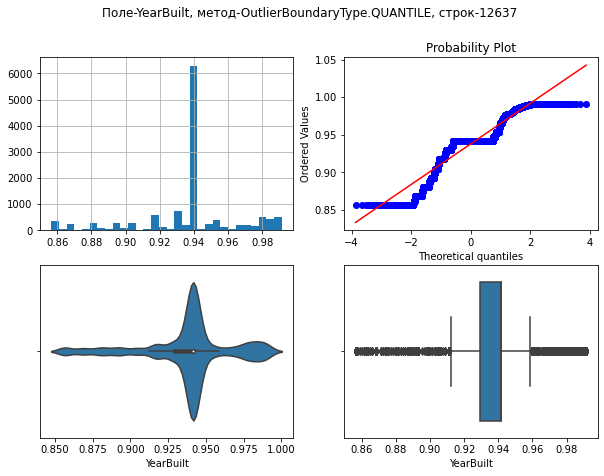

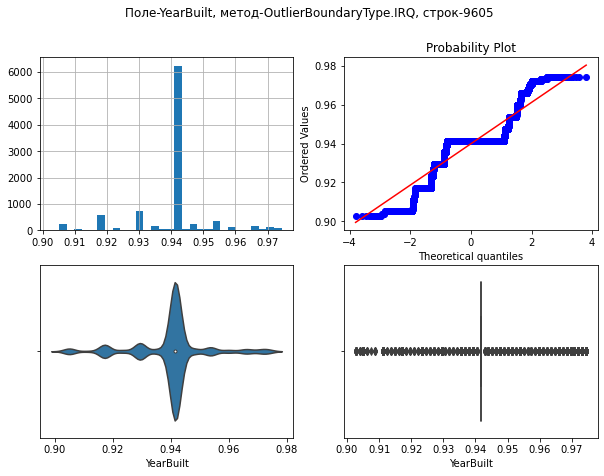

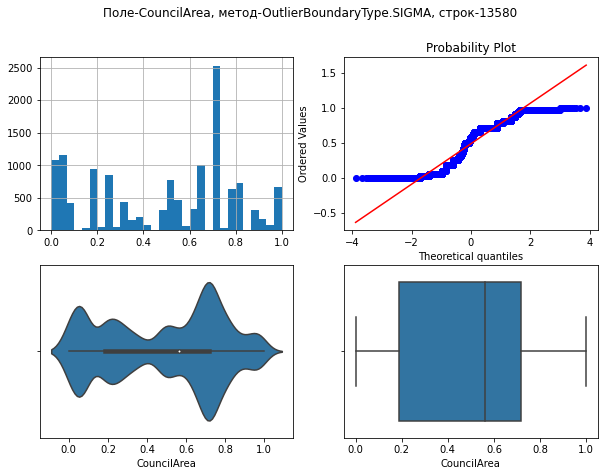

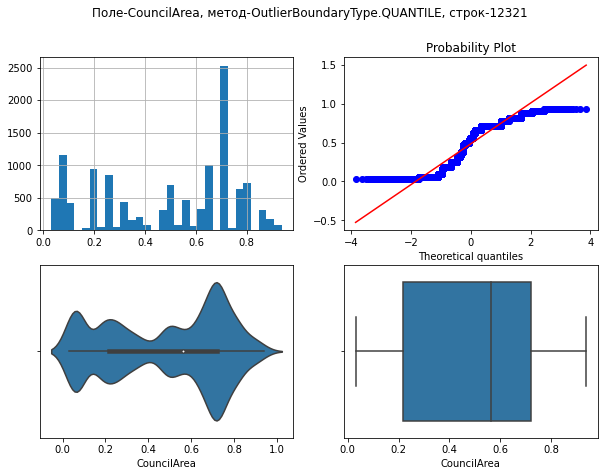

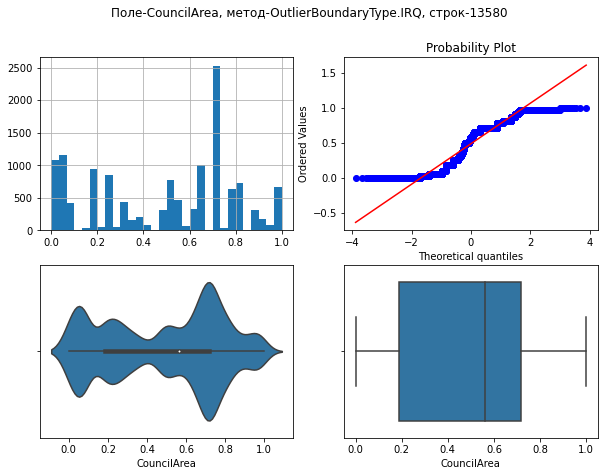

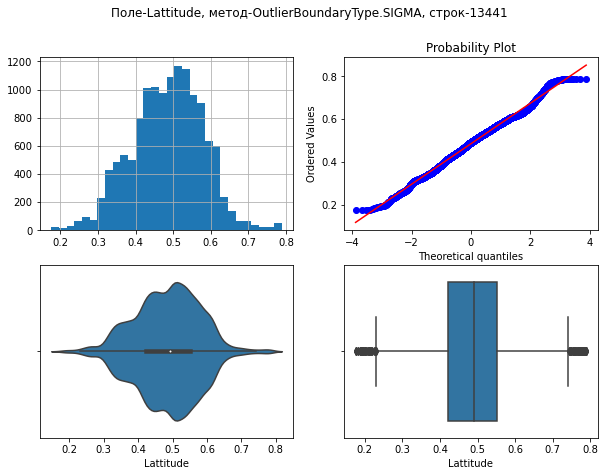

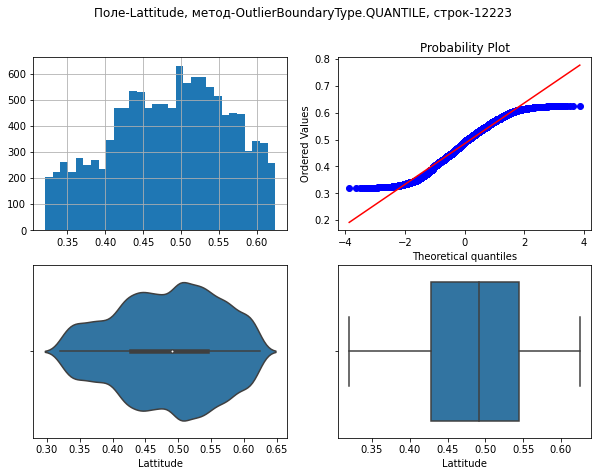

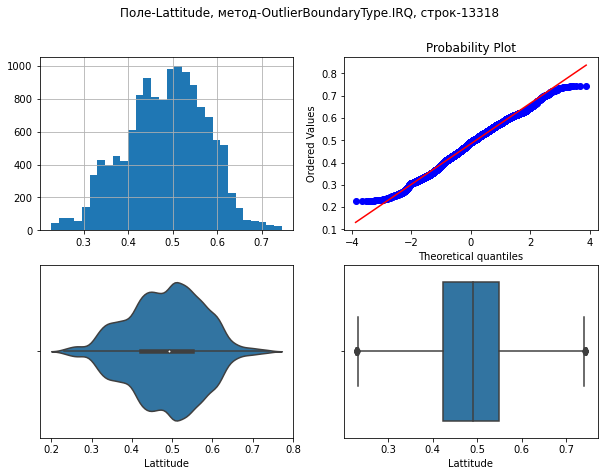

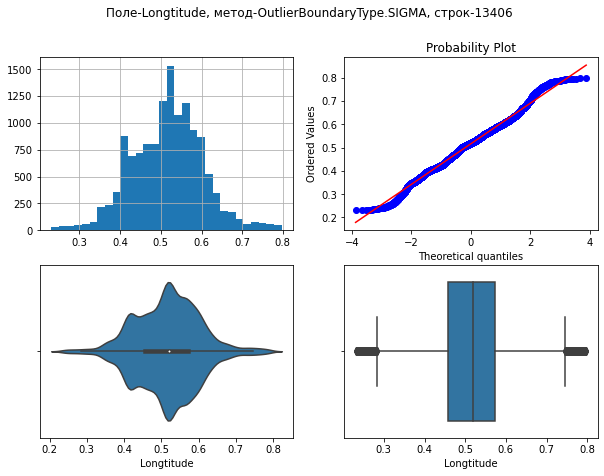

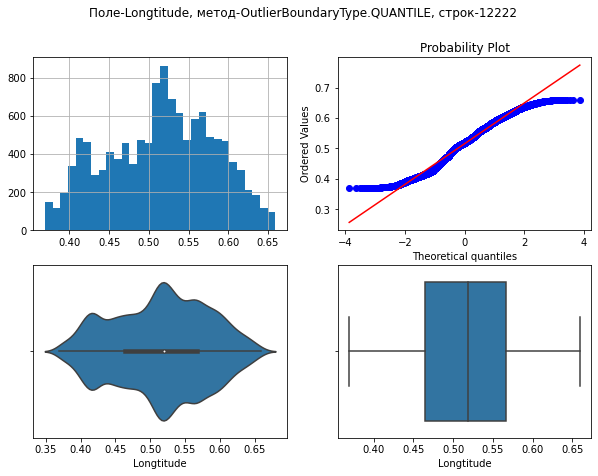

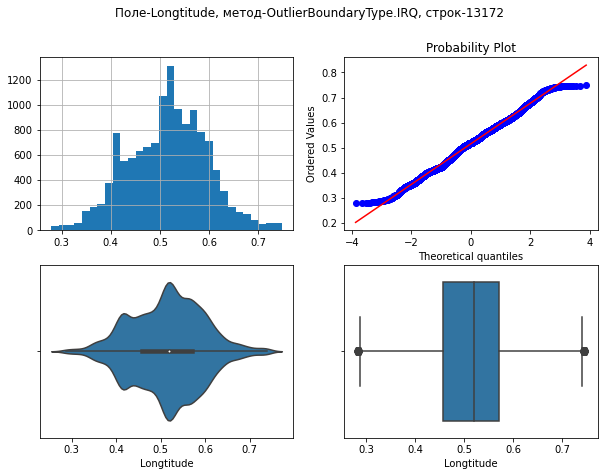

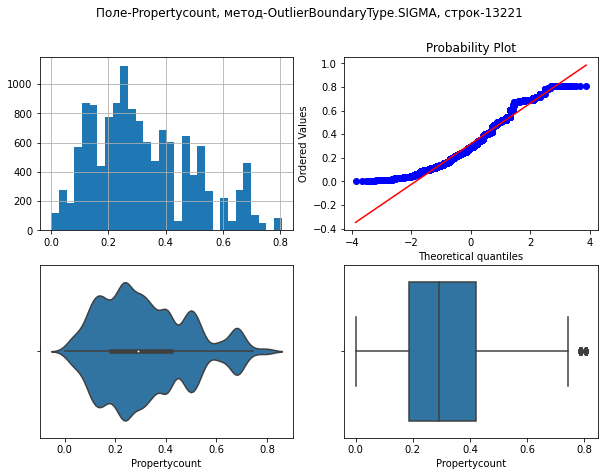

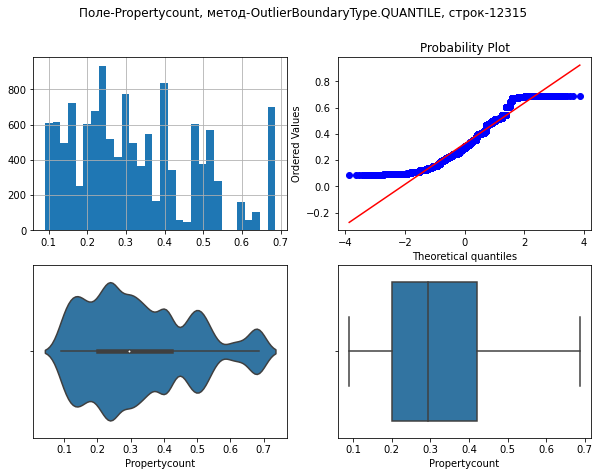

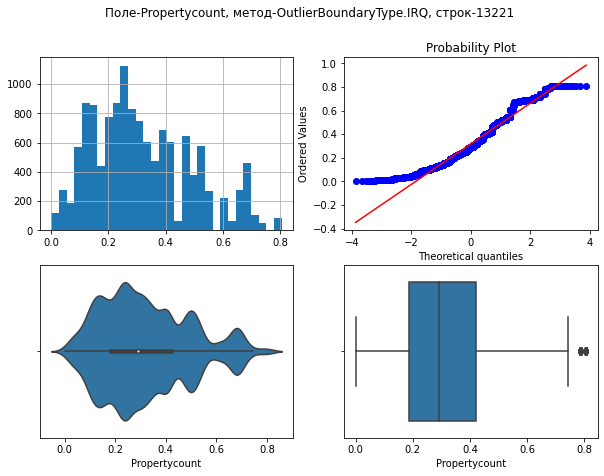

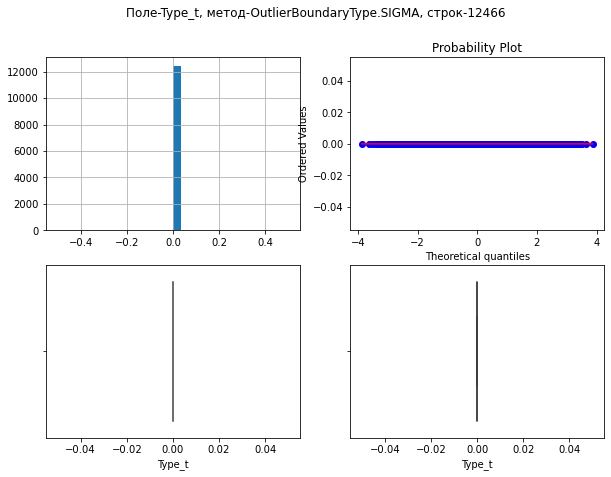

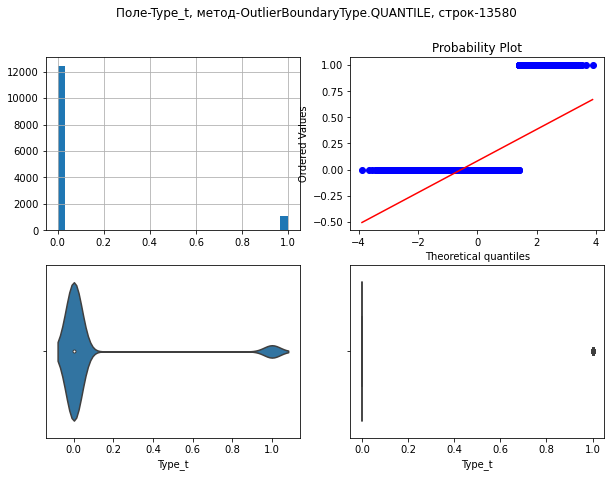

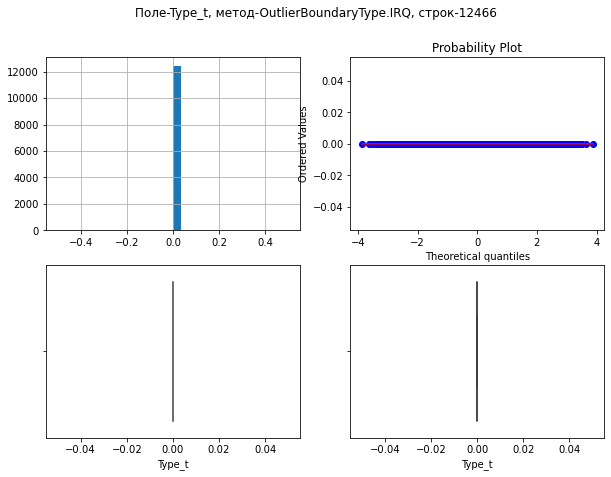

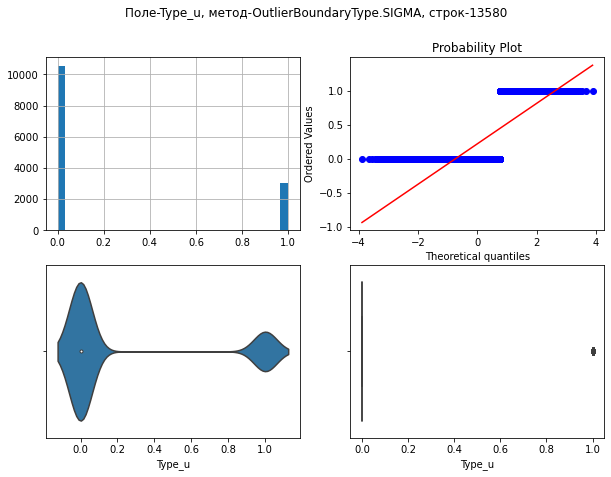

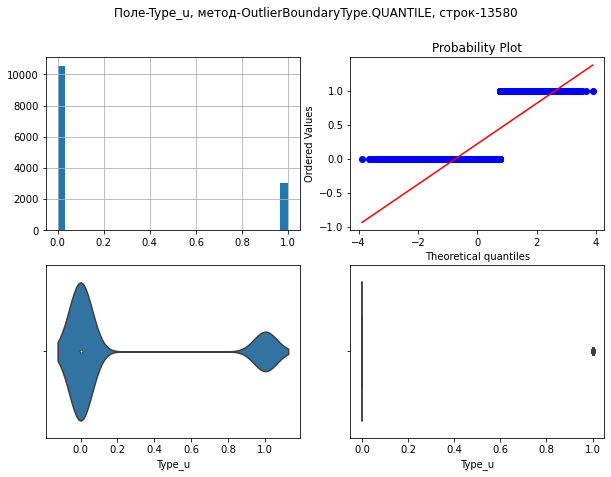

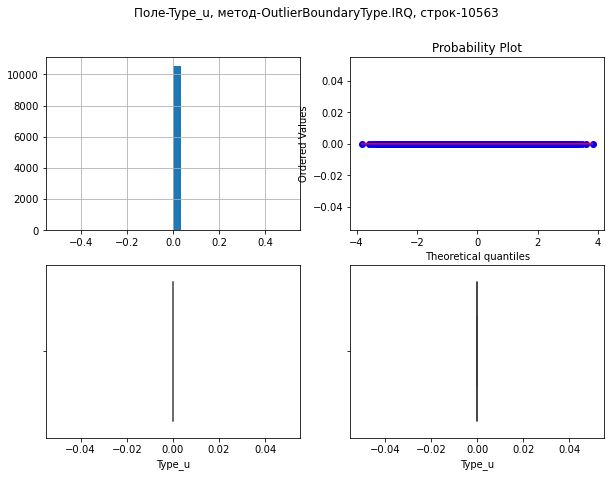

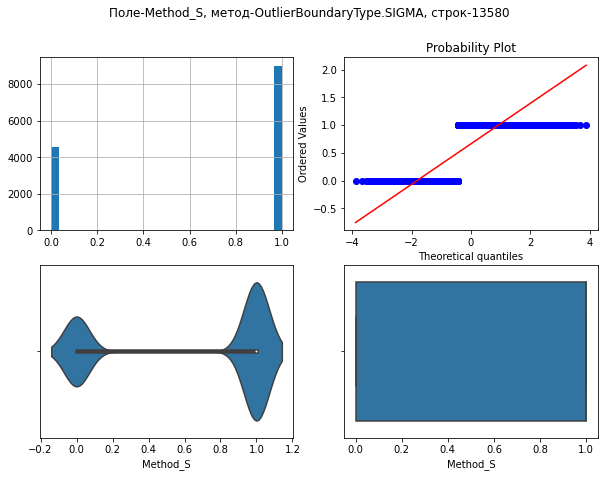

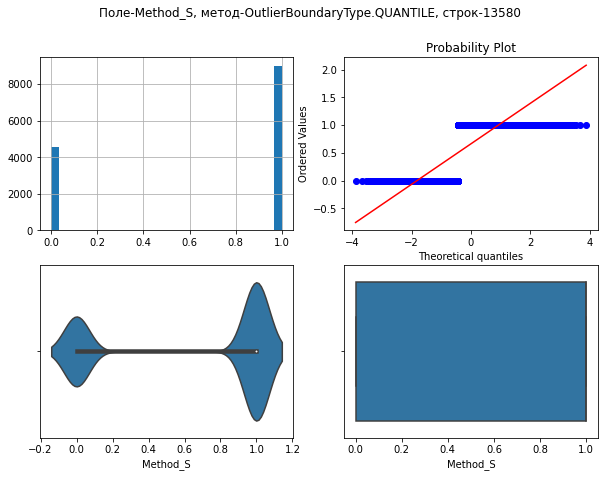

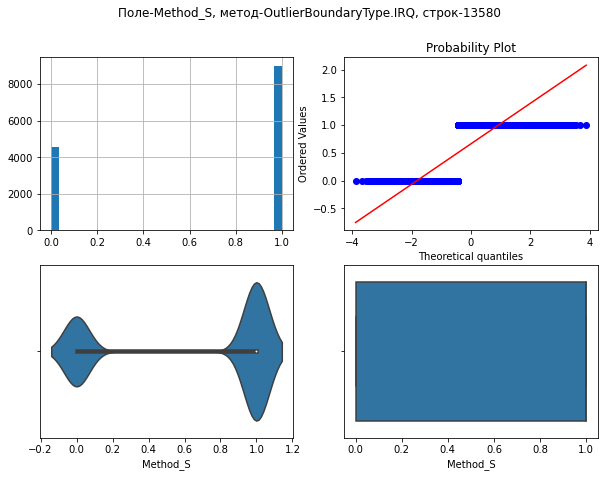

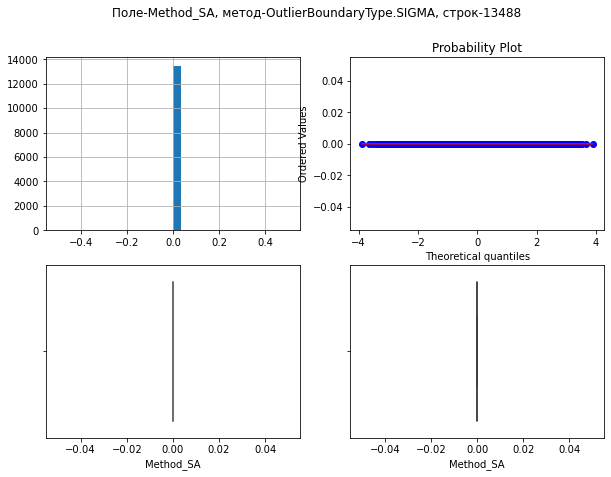

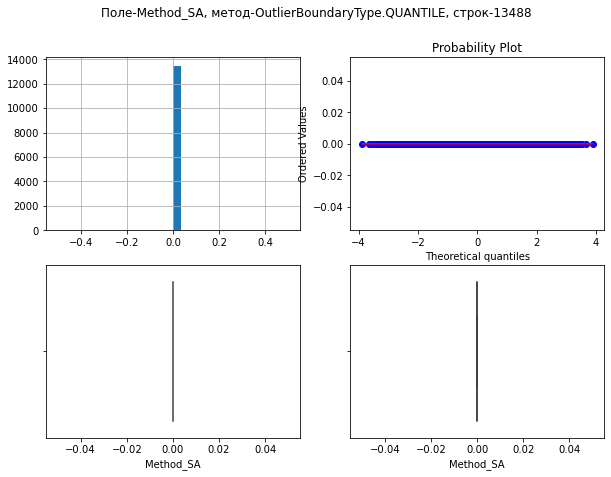

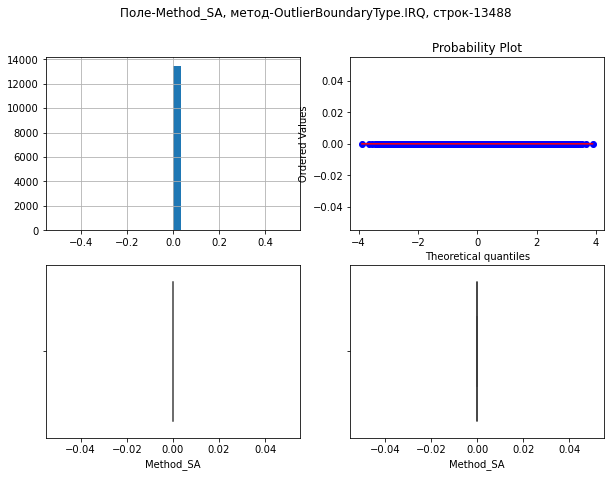

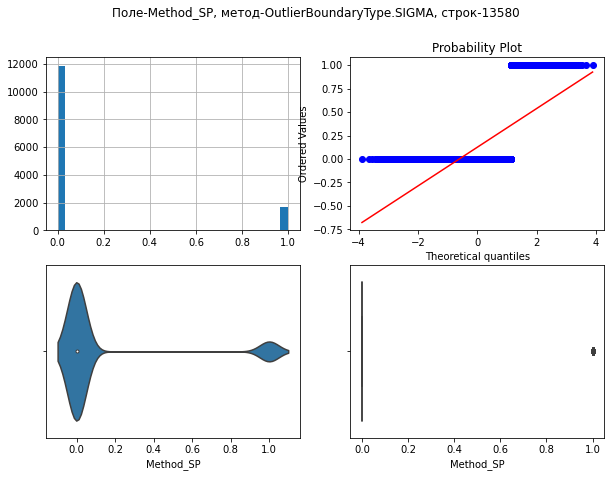

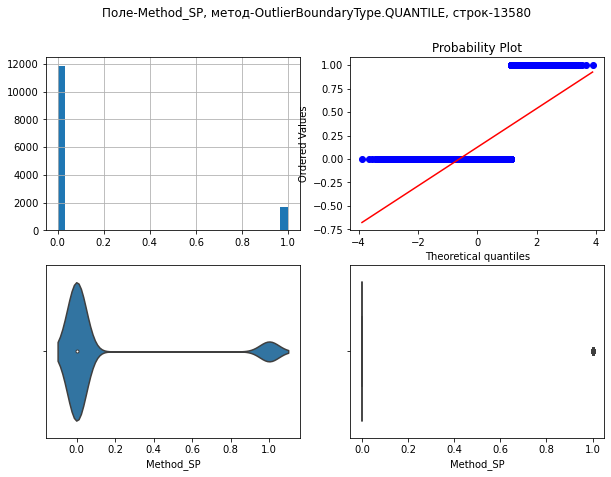

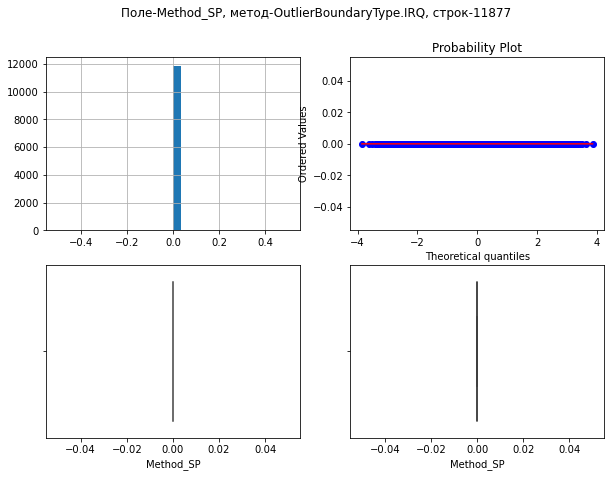

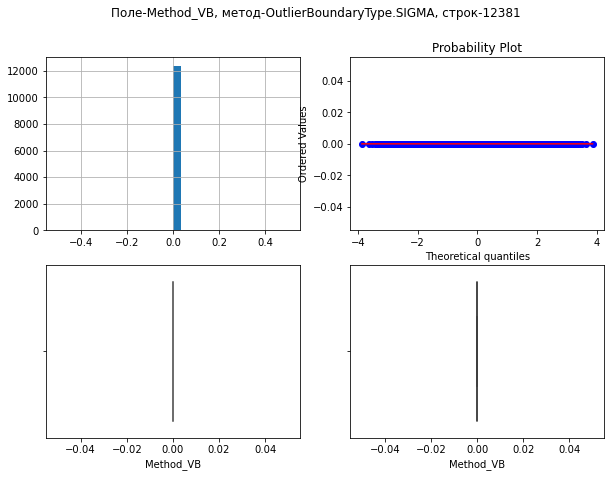

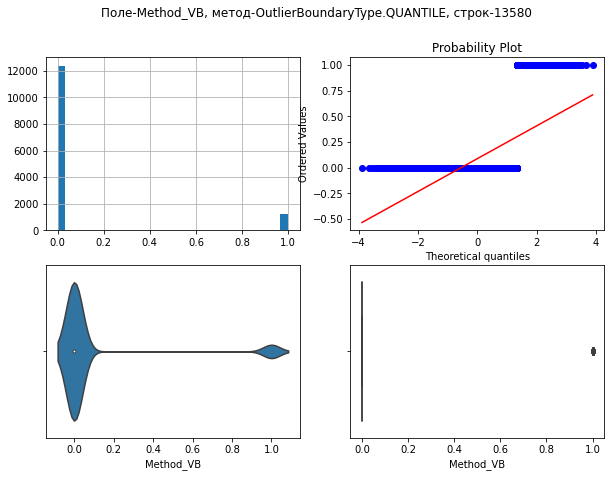

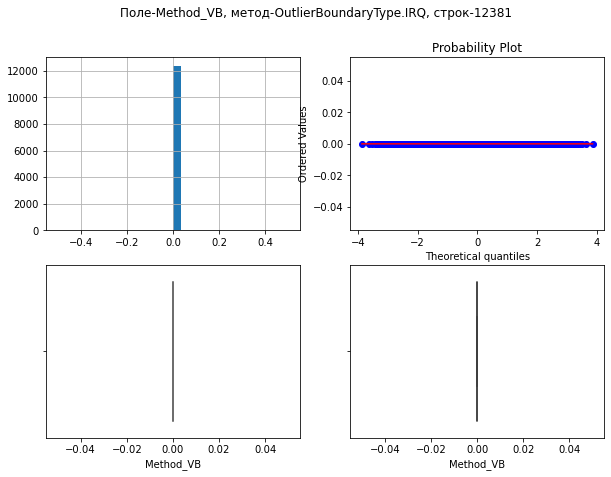

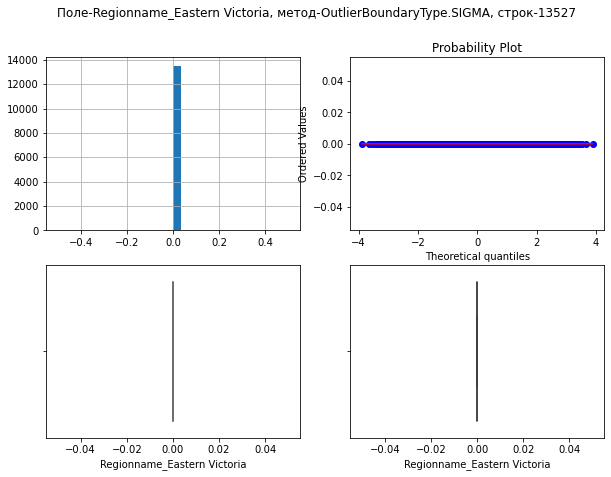

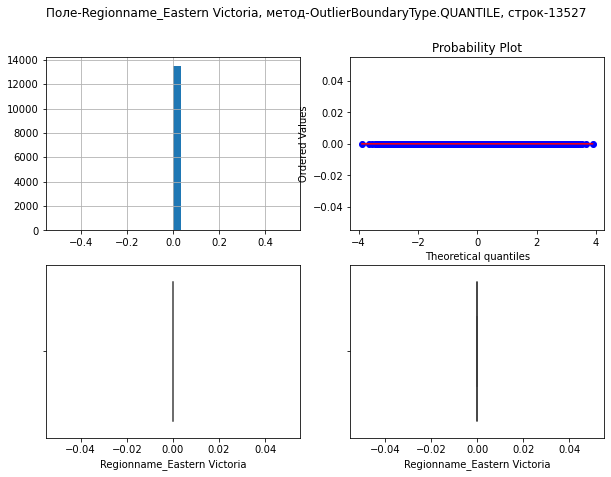

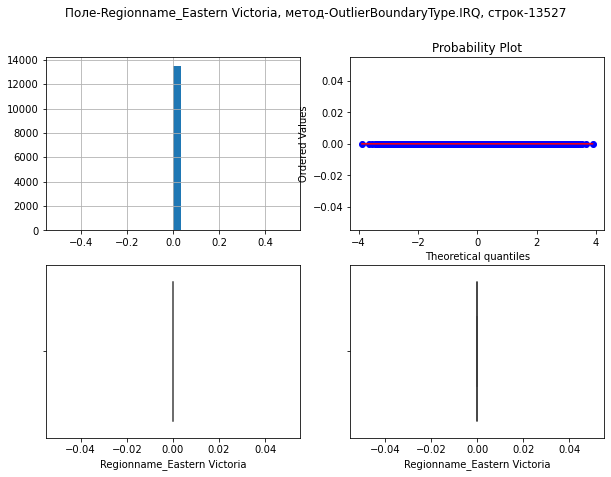

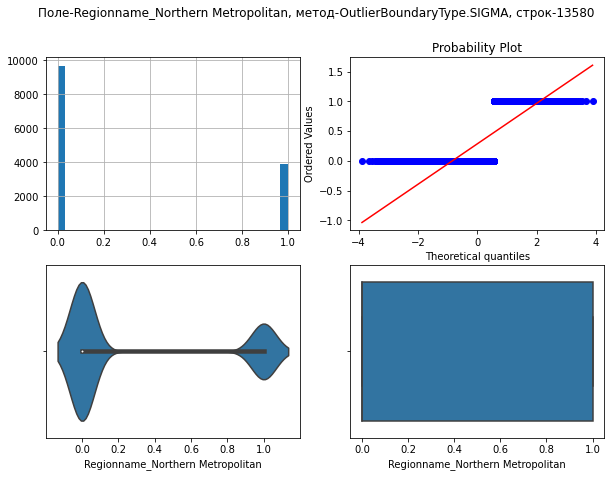

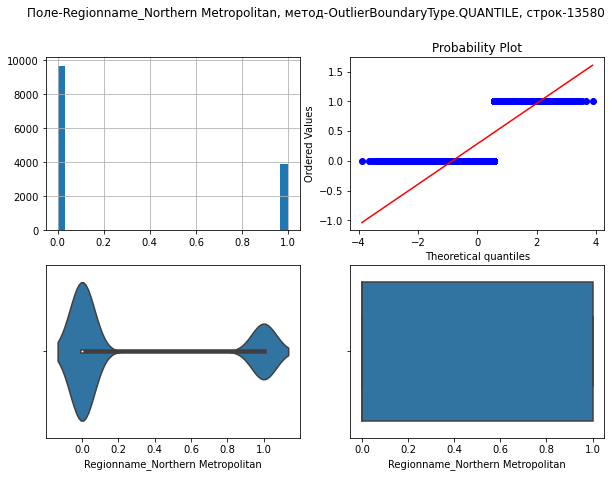

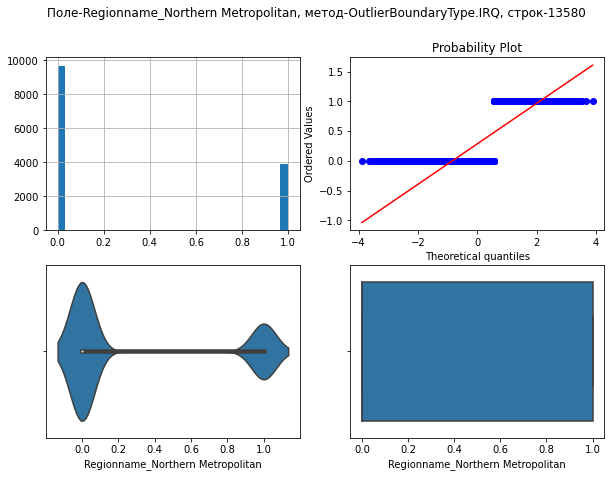

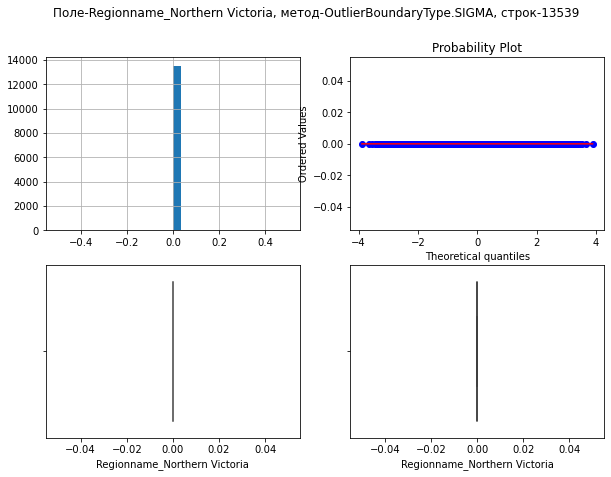

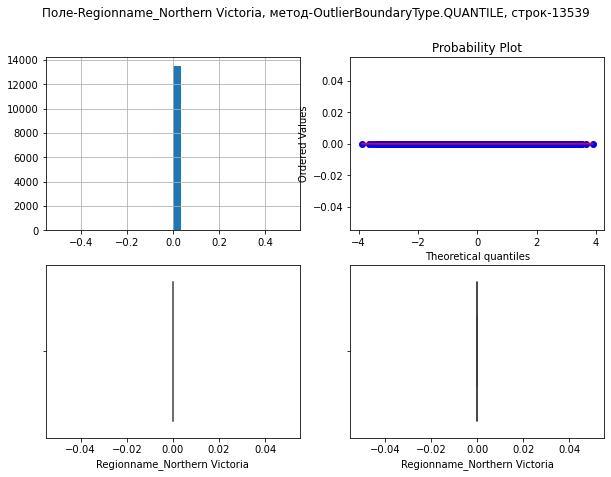

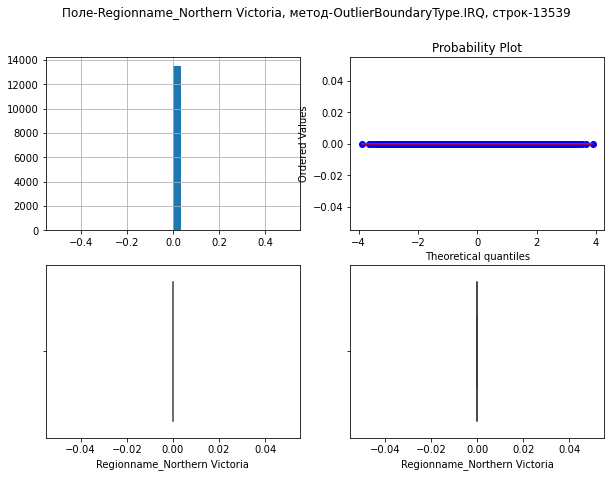

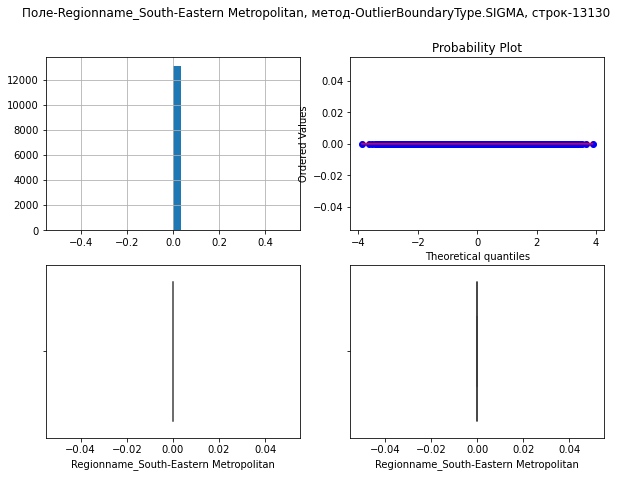

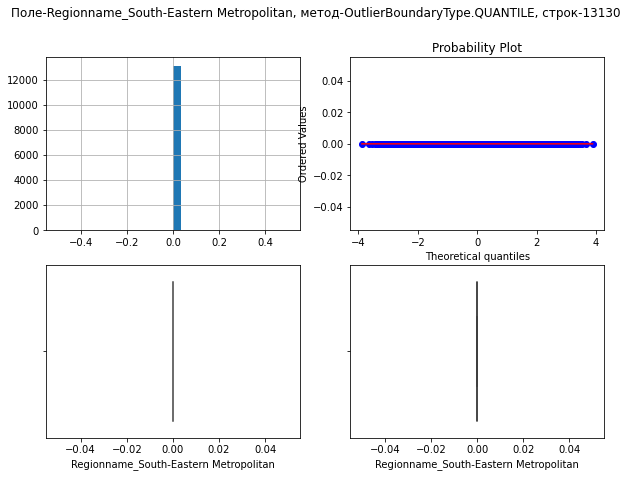

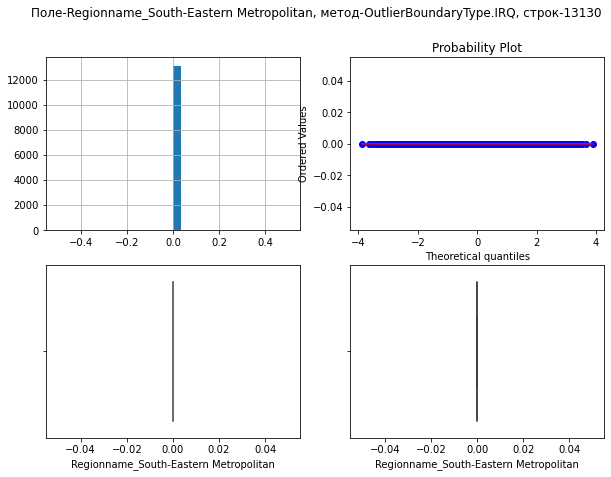

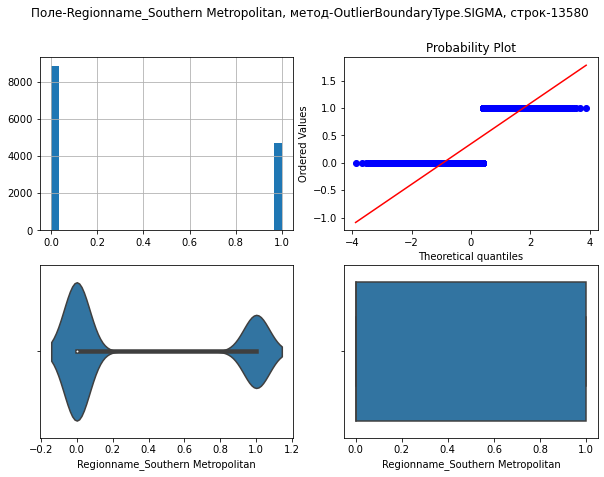

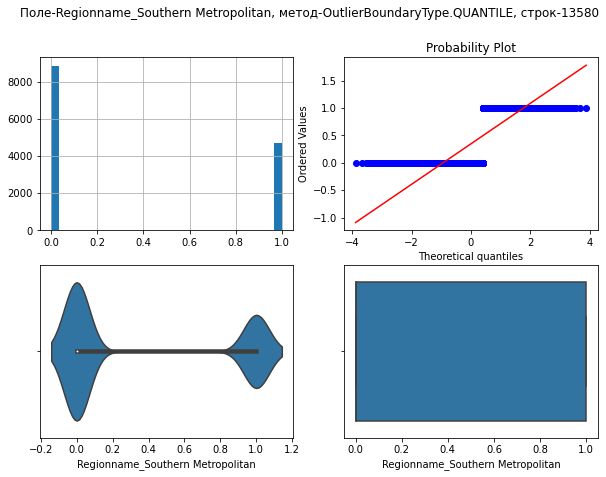

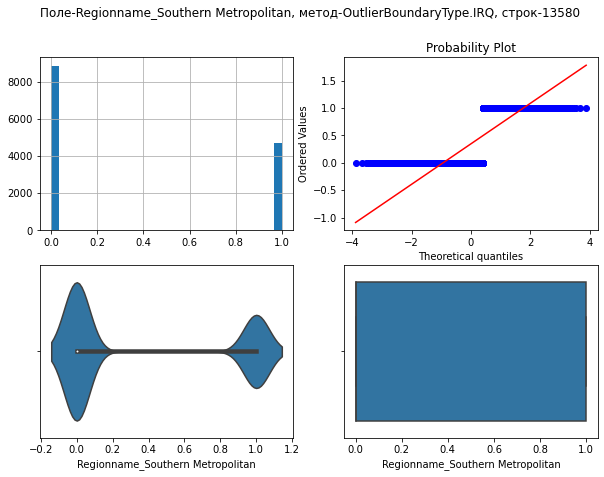

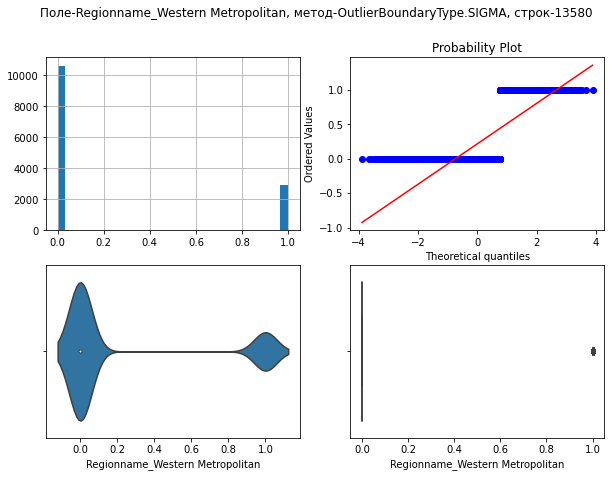

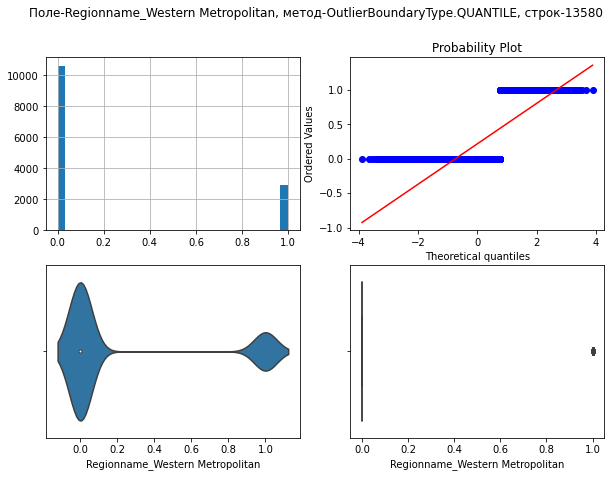

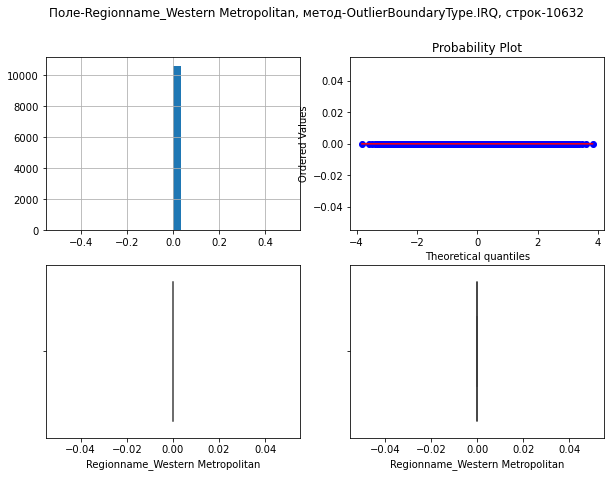

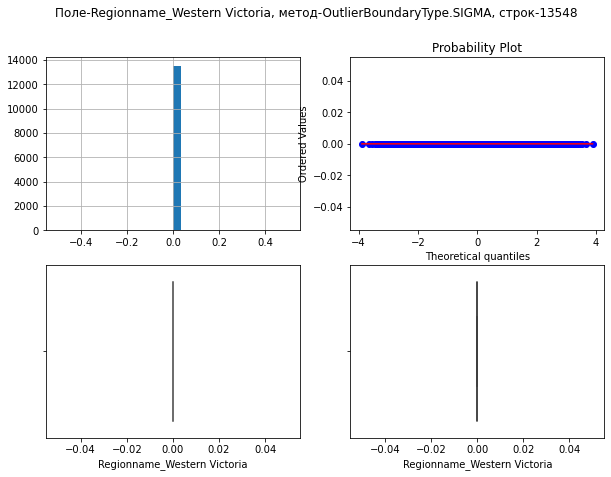

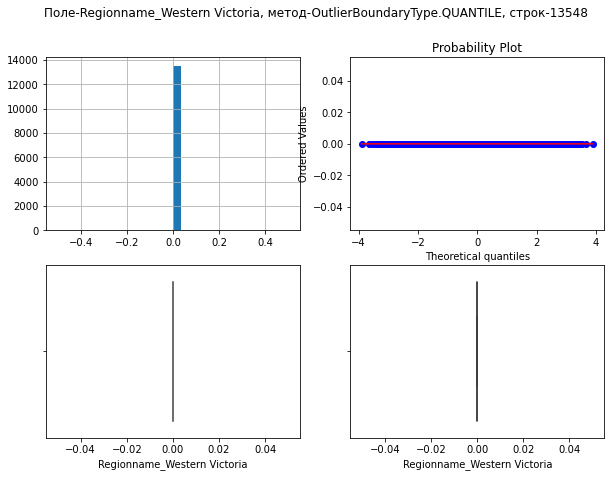

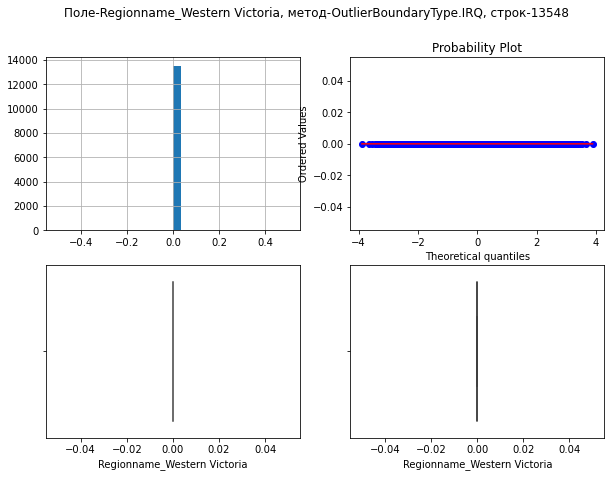

In [33]:
for col in num_cols:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots_out(data_trimmed, col, title)

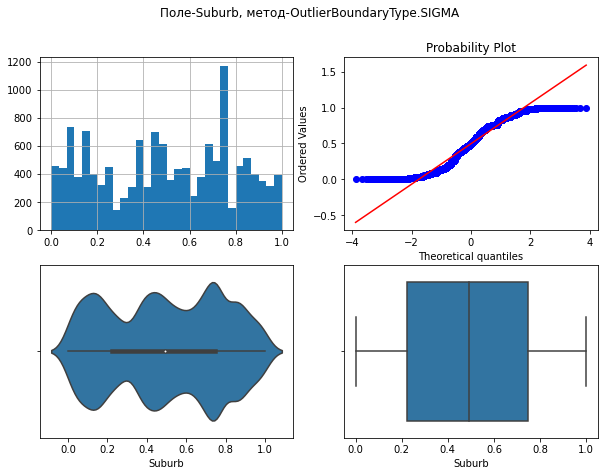

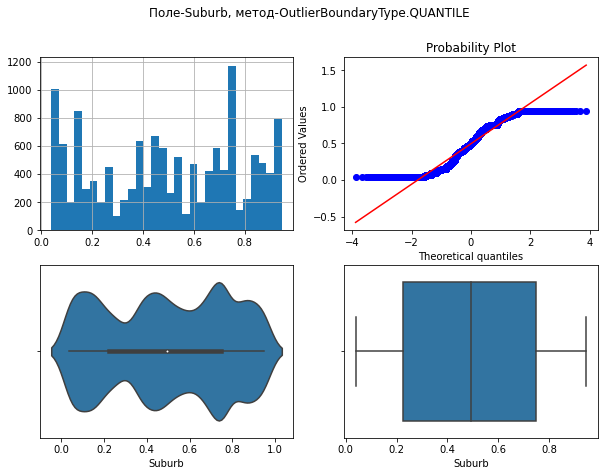

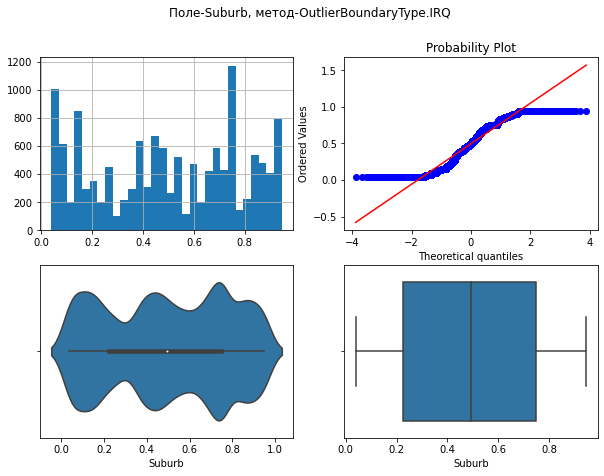

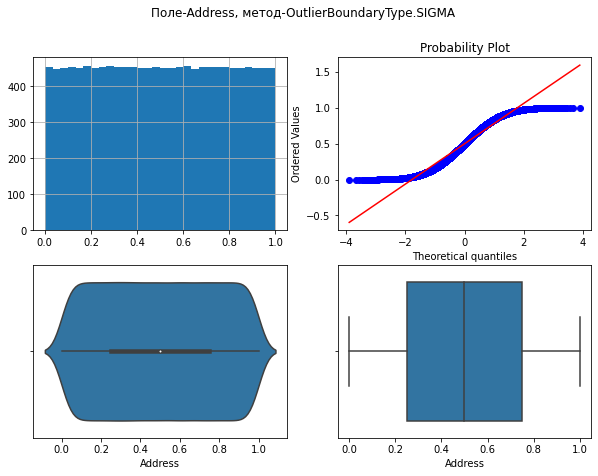

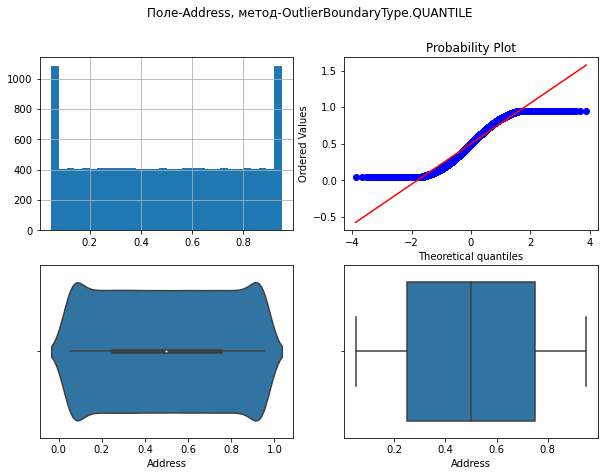

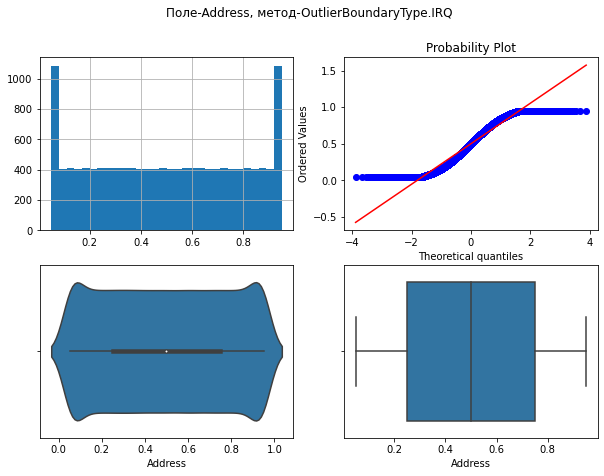

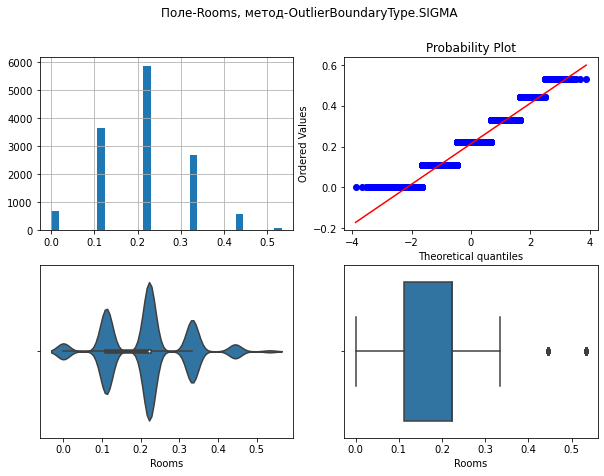

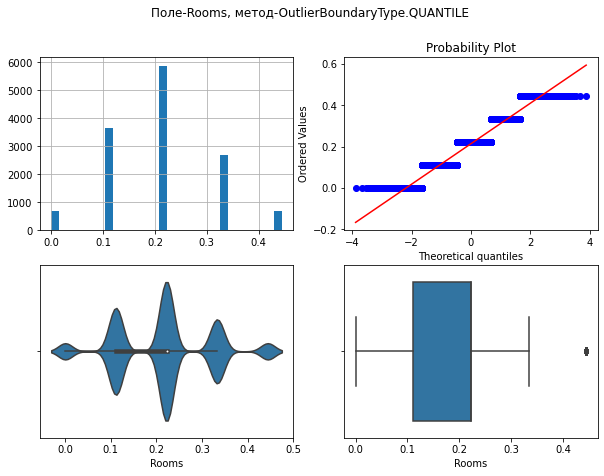

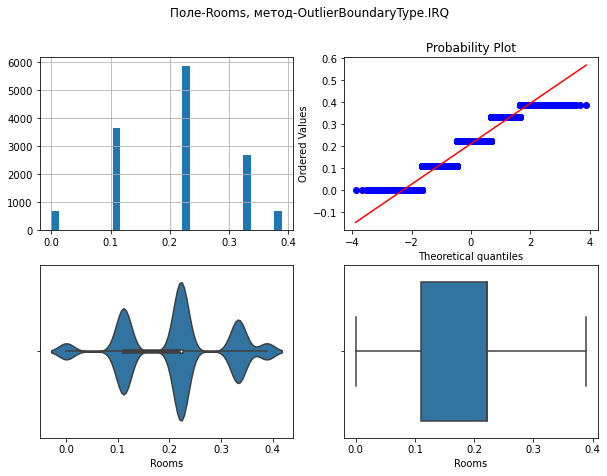

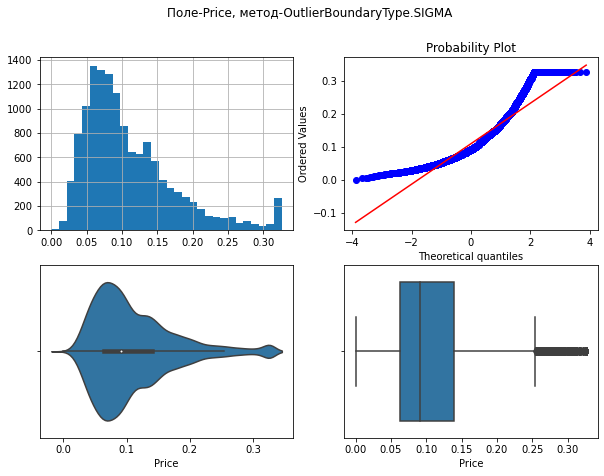

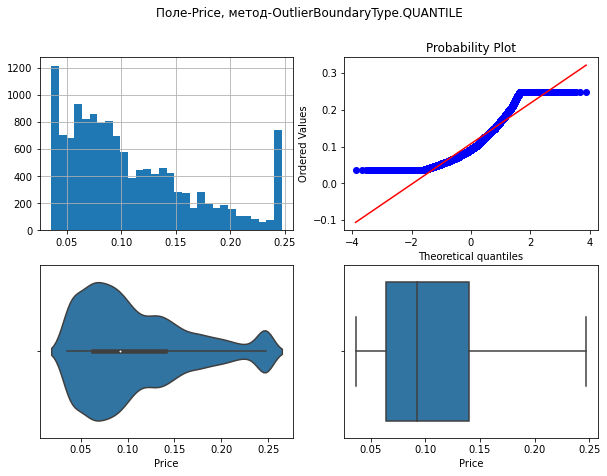

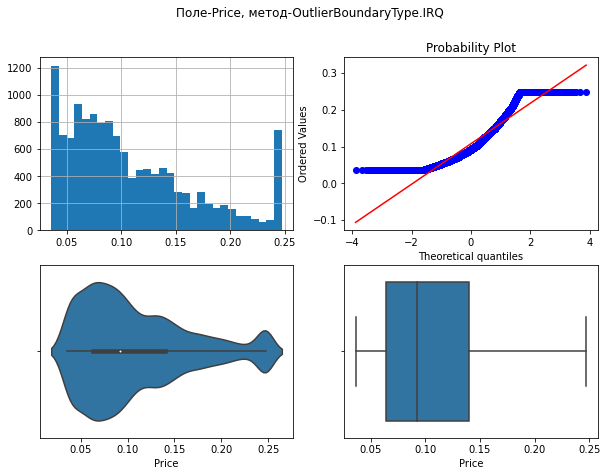

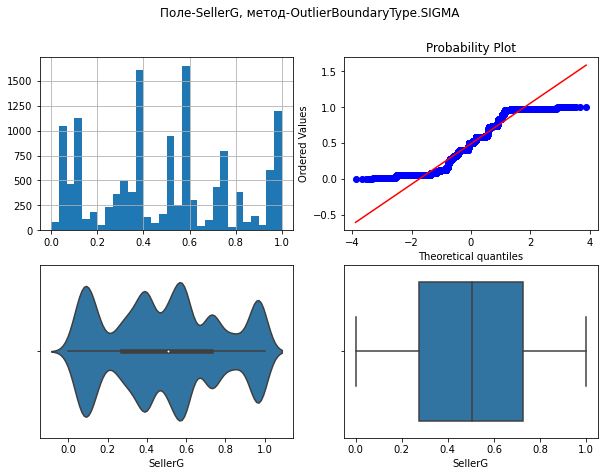

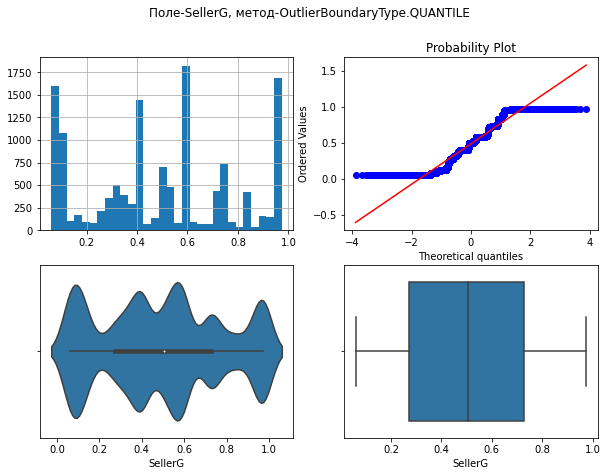

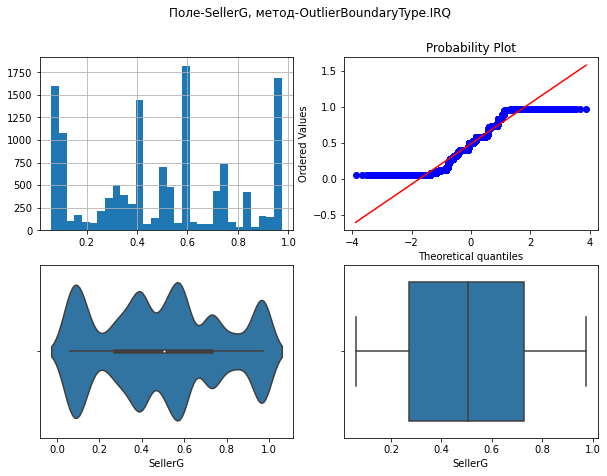

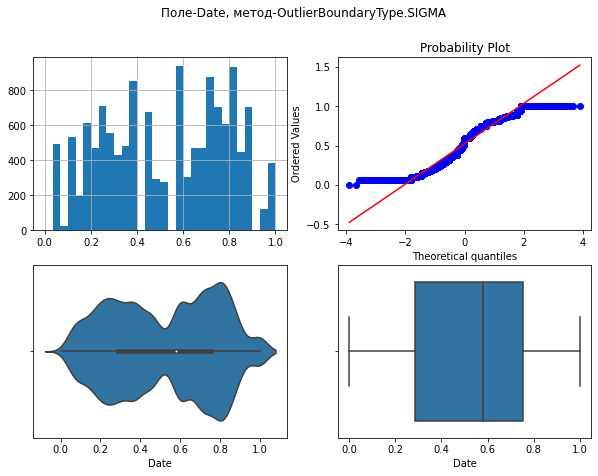

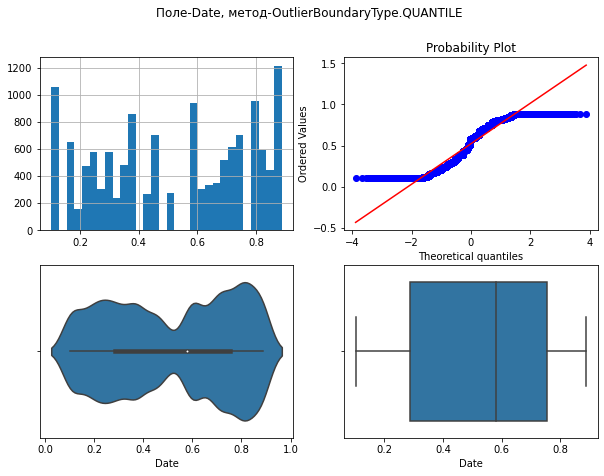

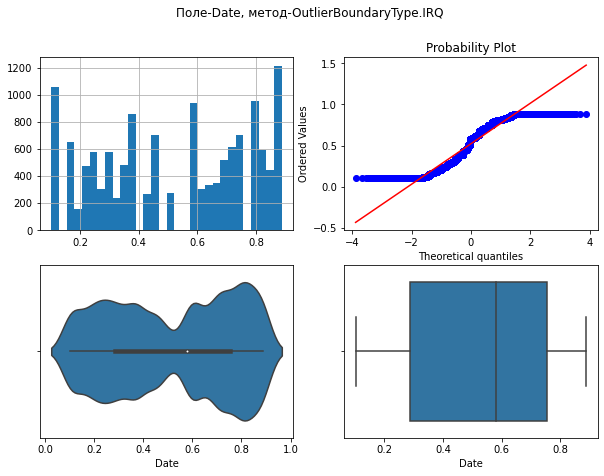

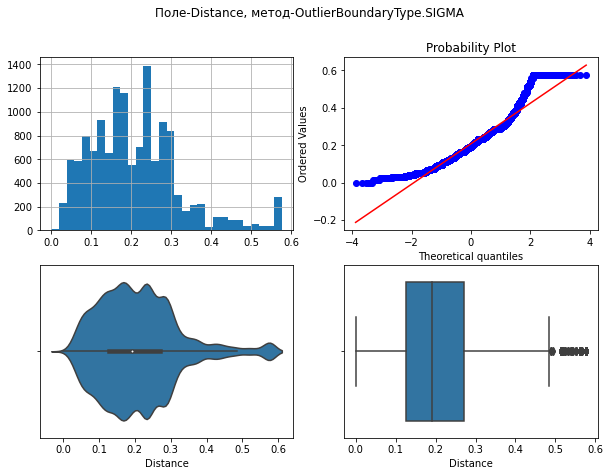

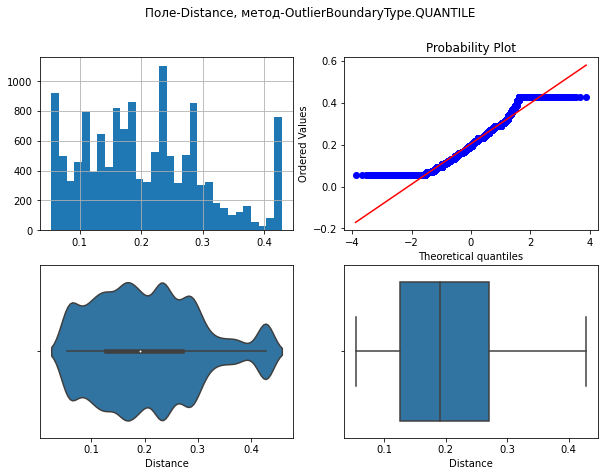

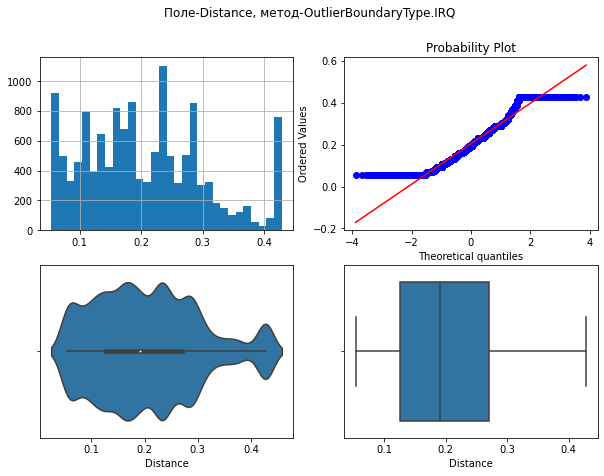

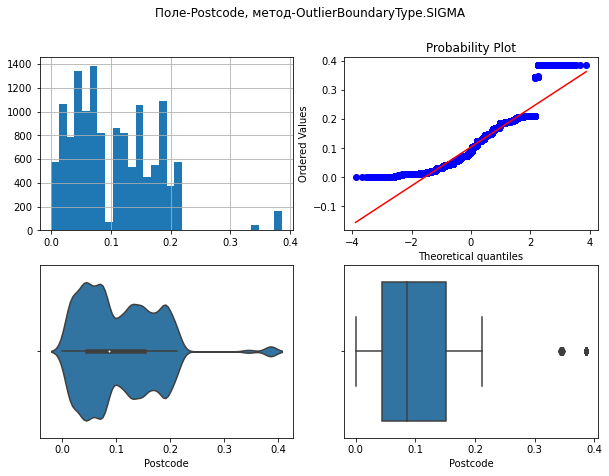

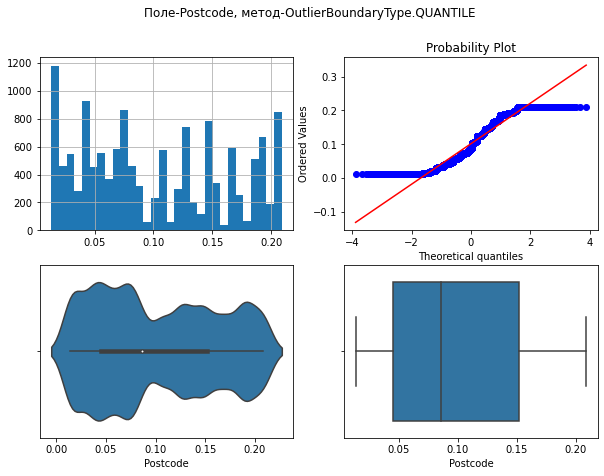

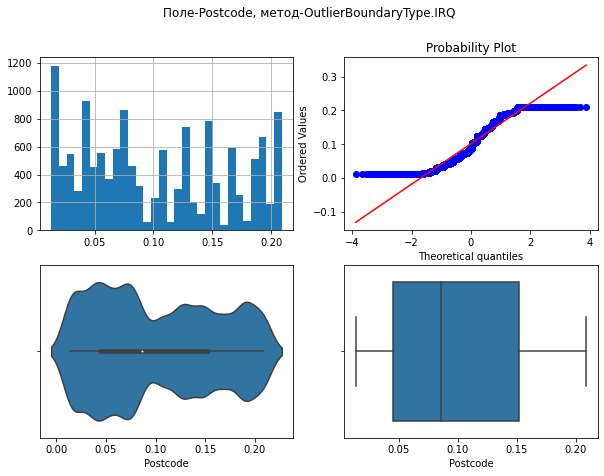

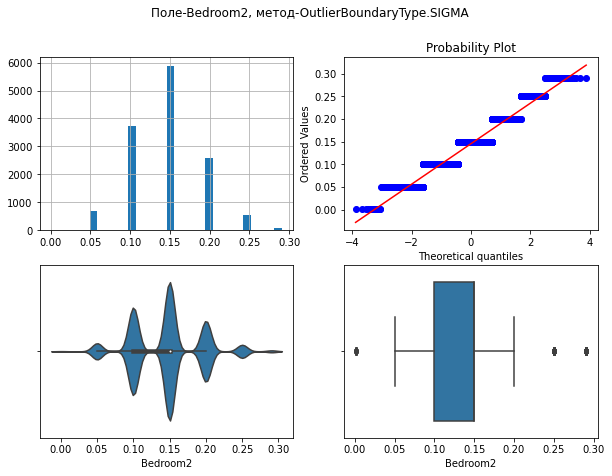

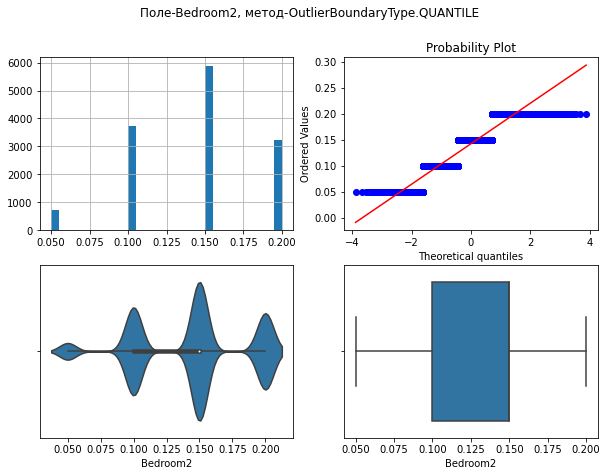

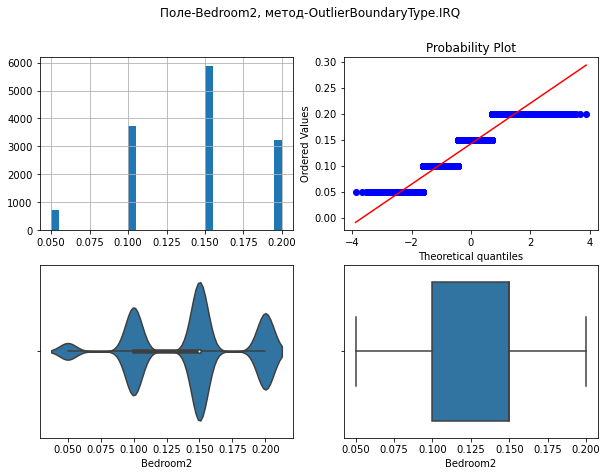

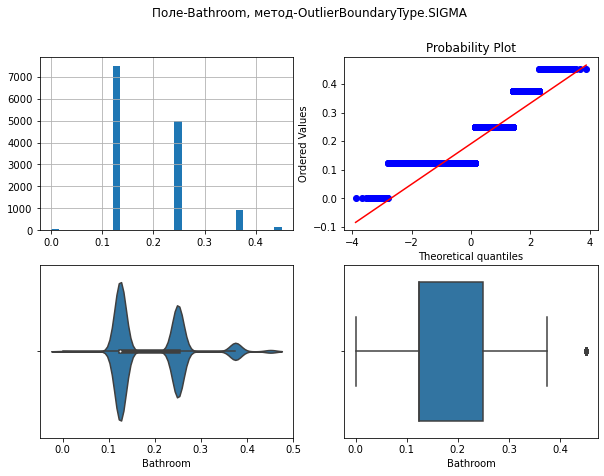

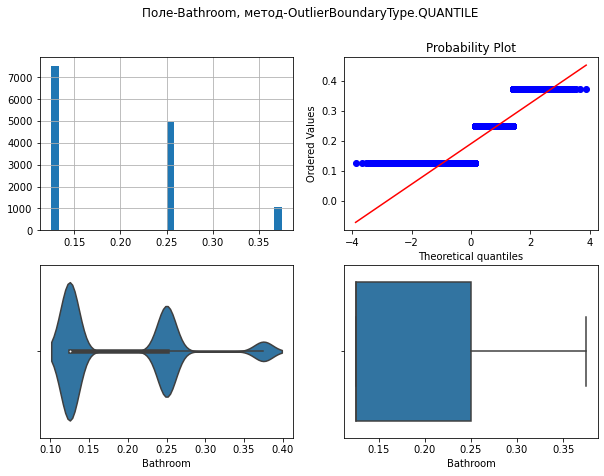

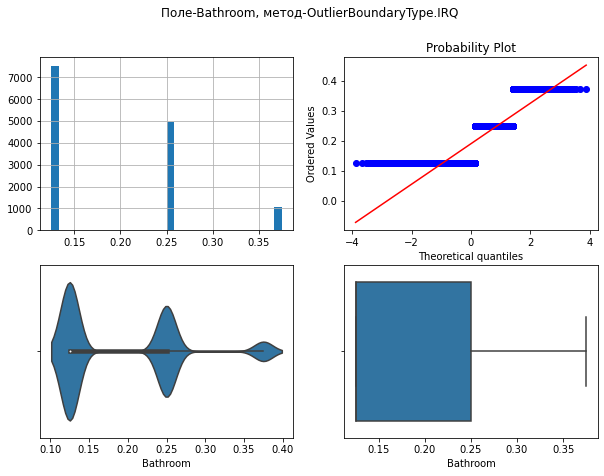

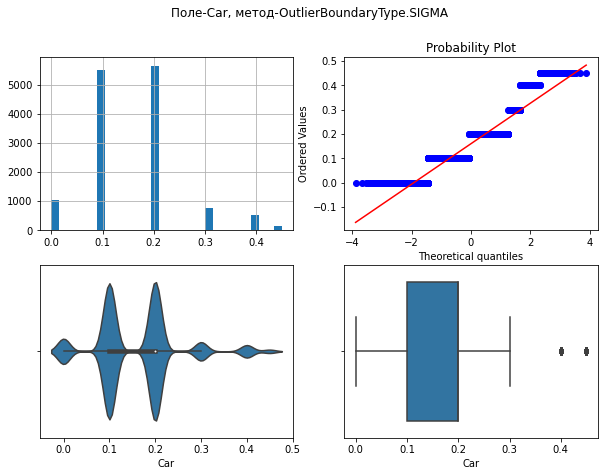

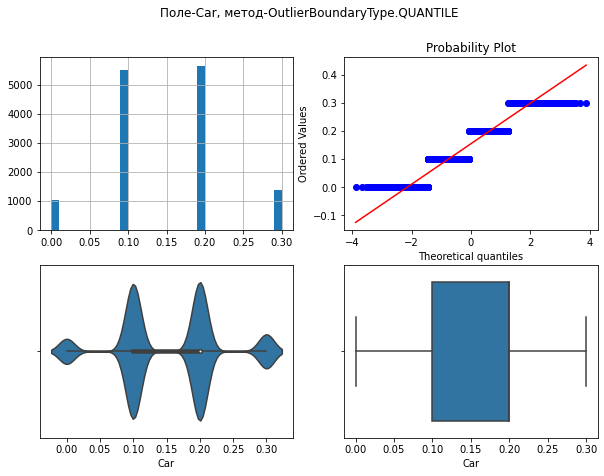

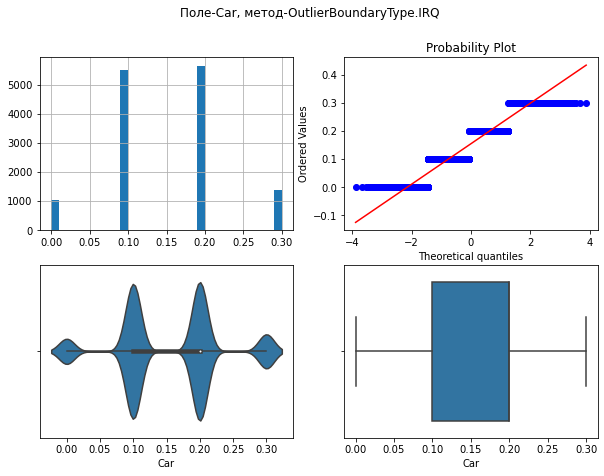

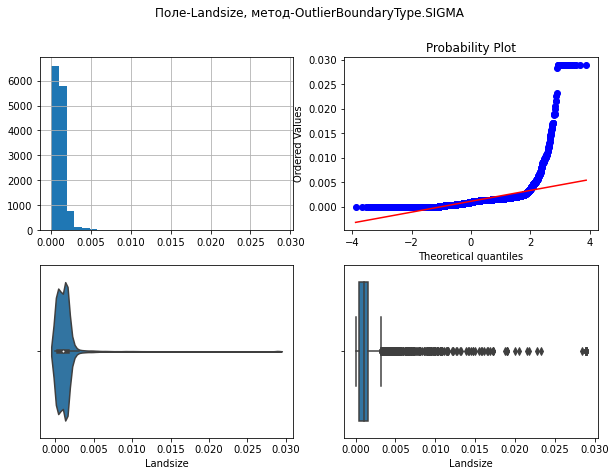

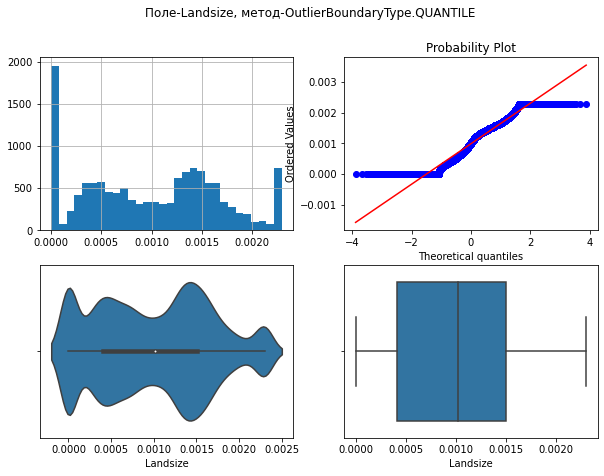

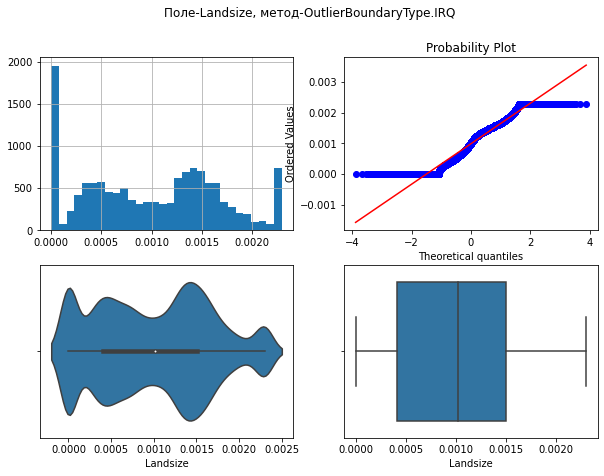

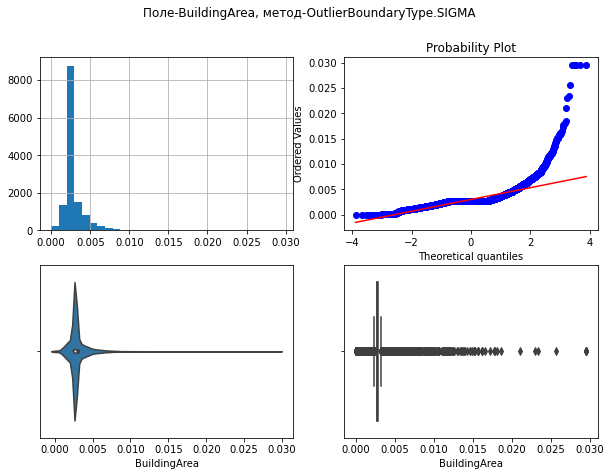

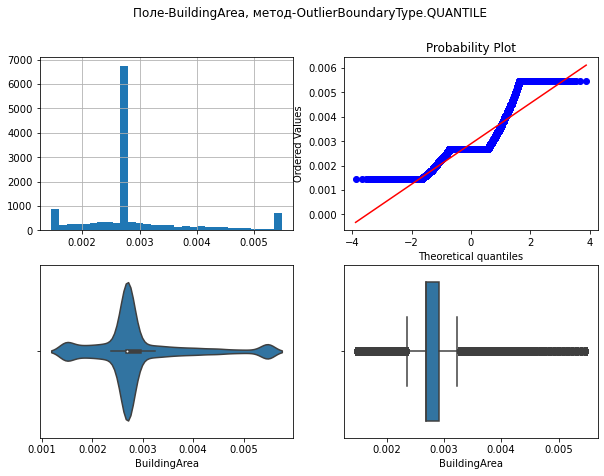

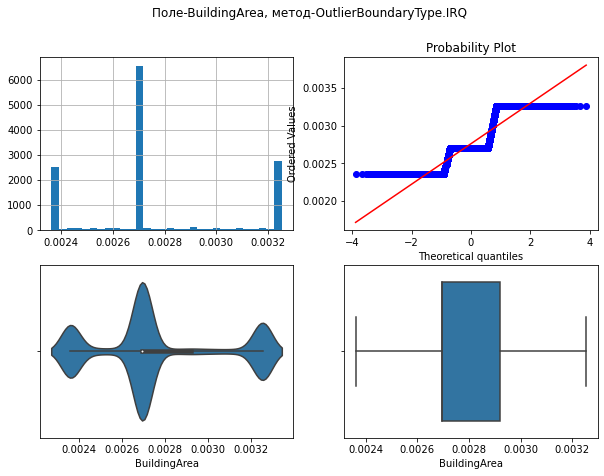

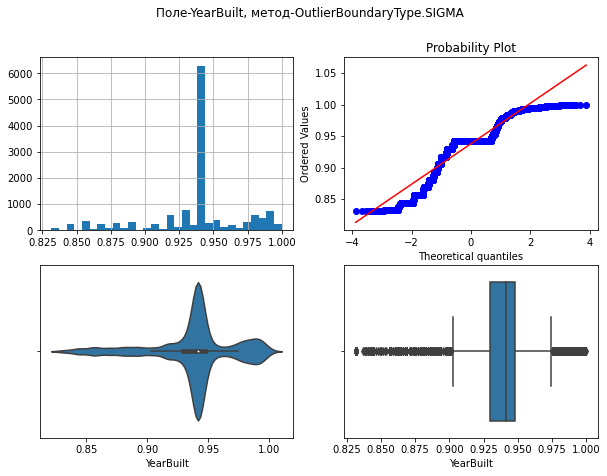

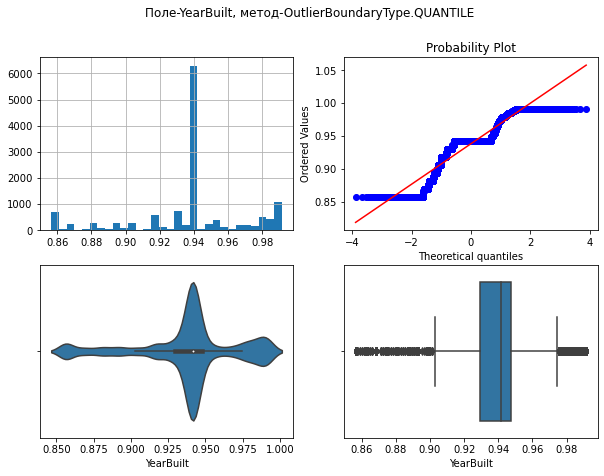

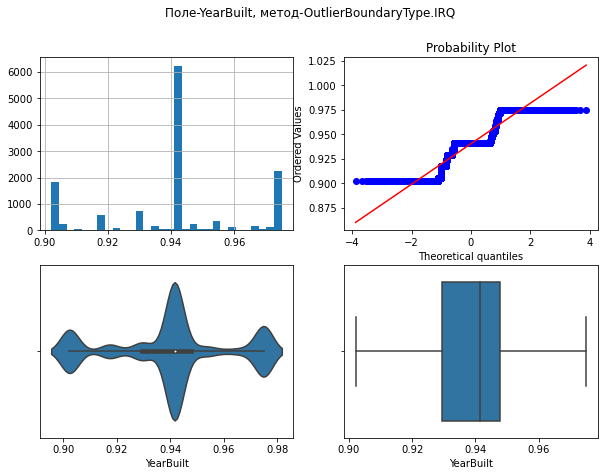

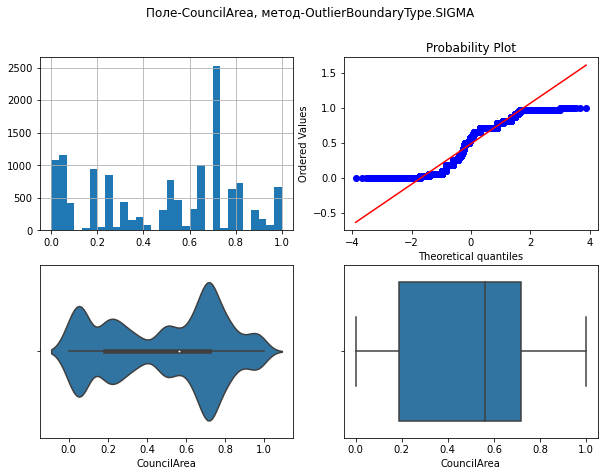

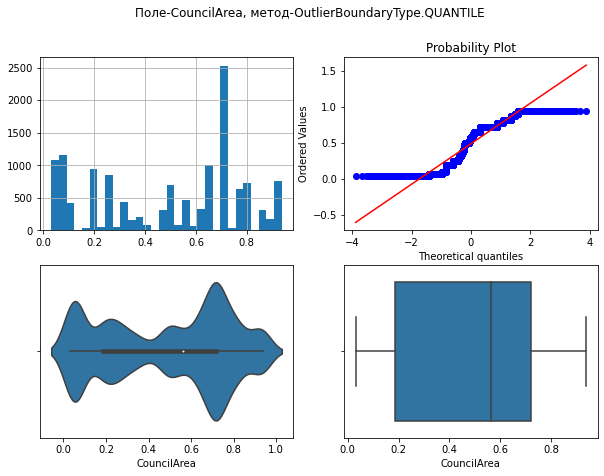

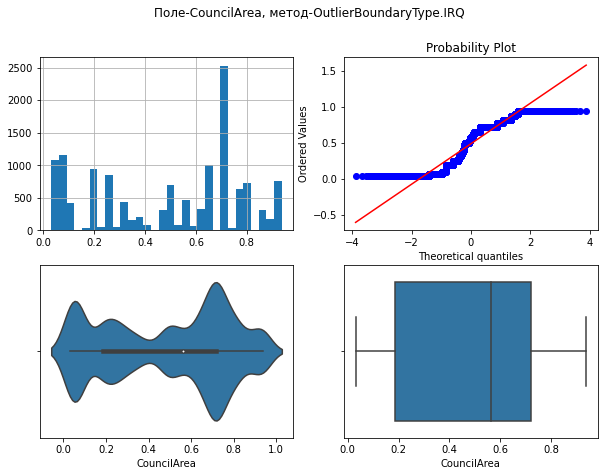

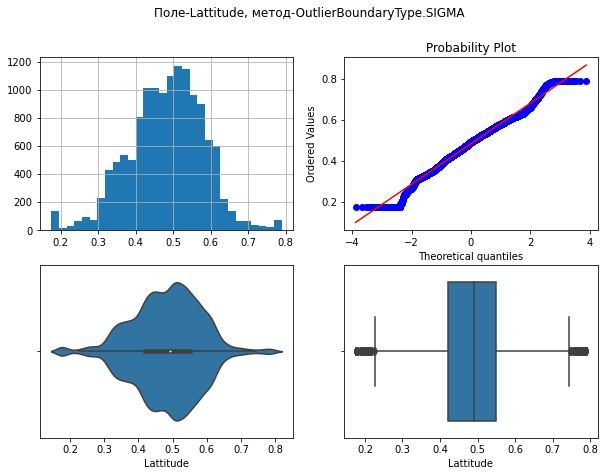

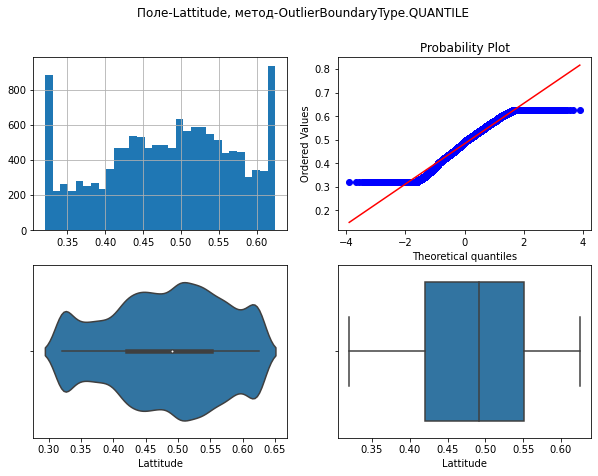

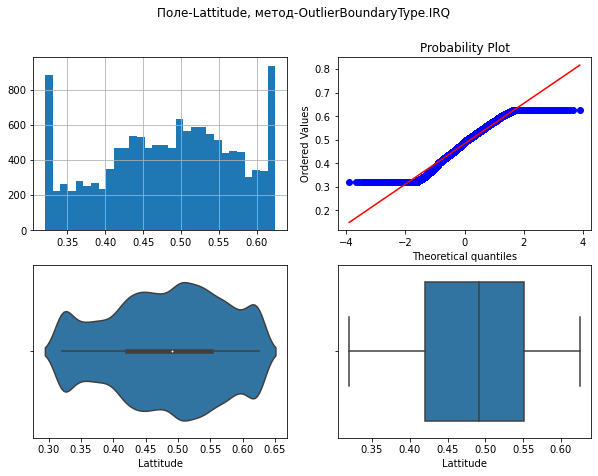

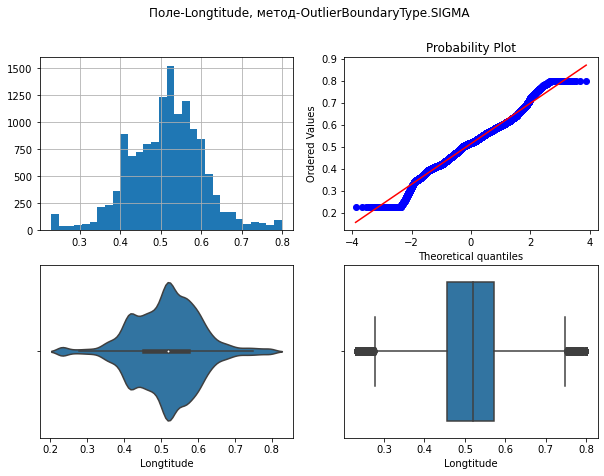

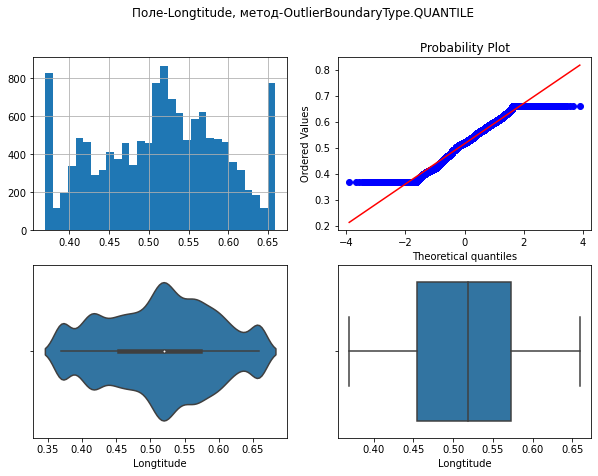

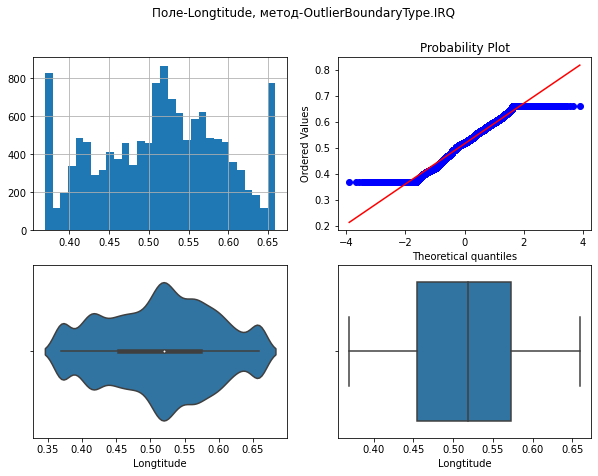

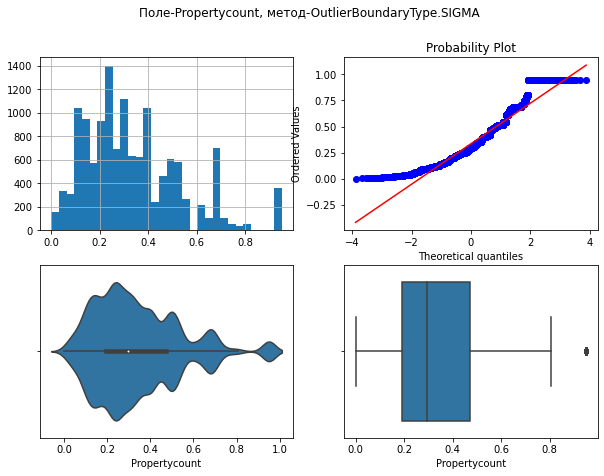

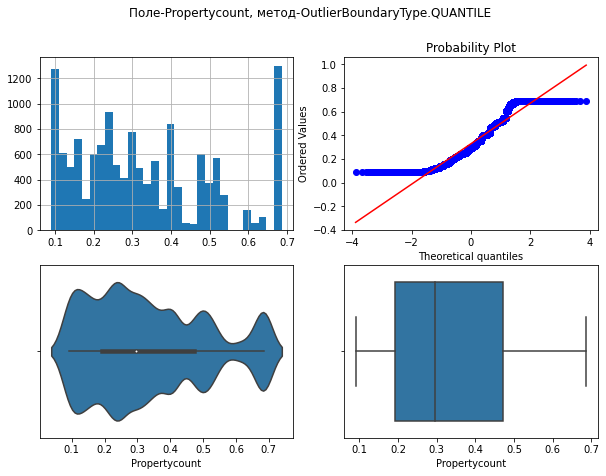

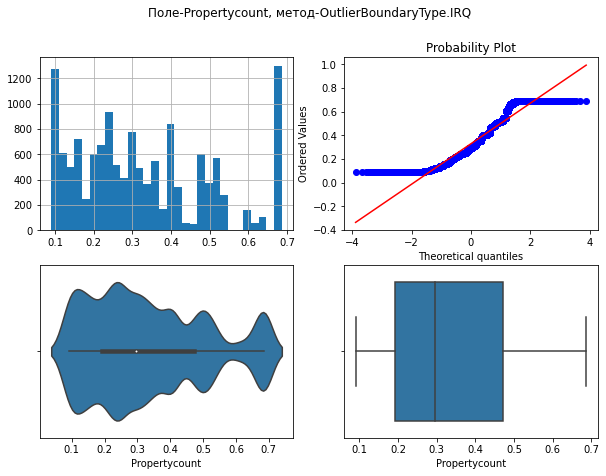

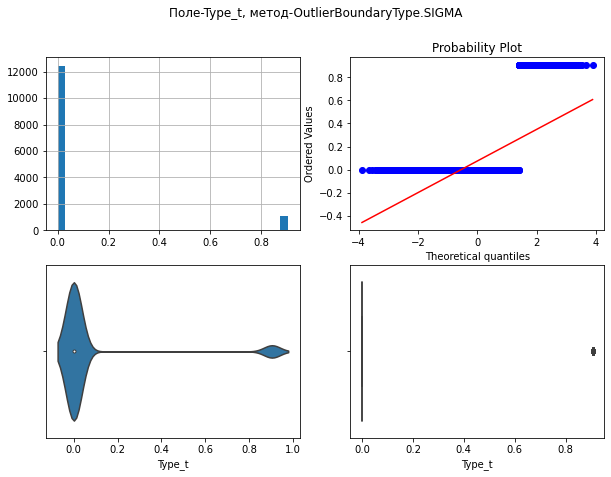

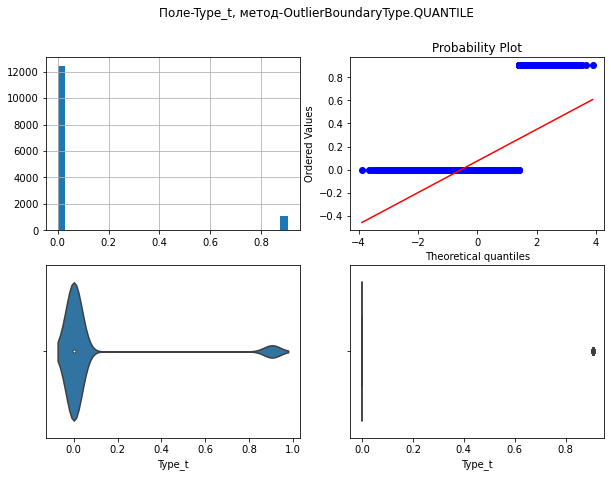

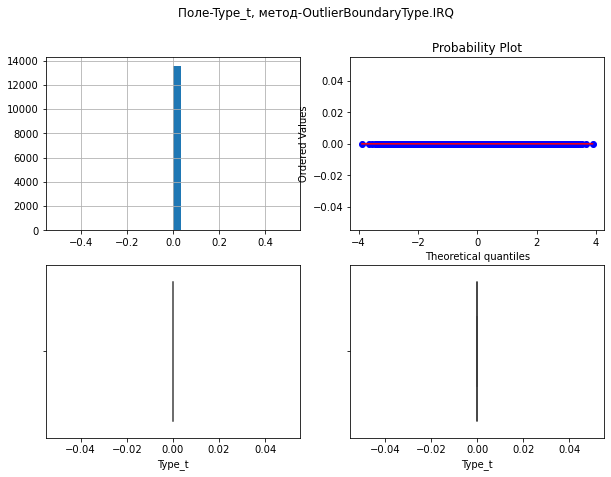

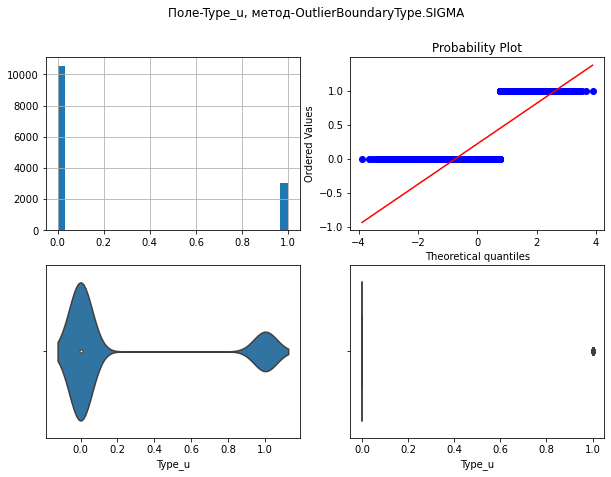

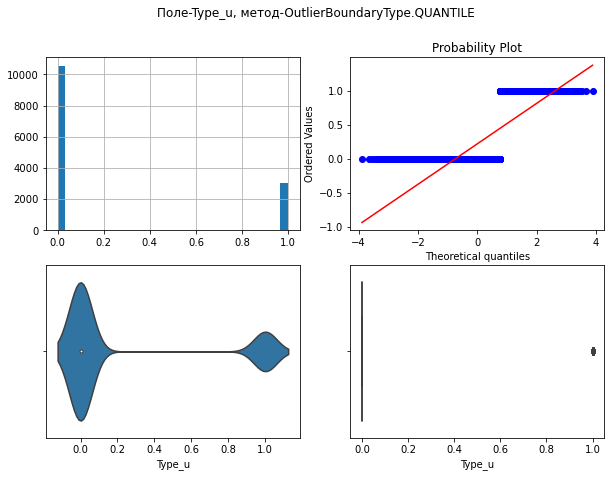

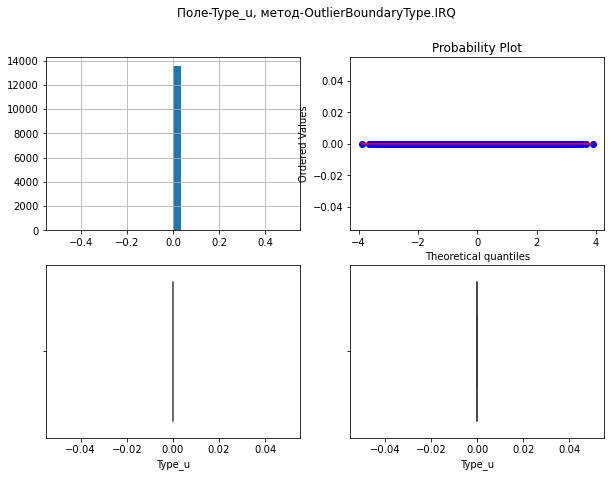

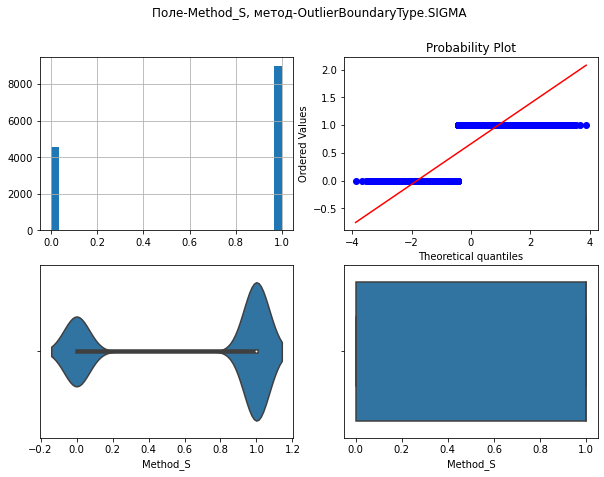

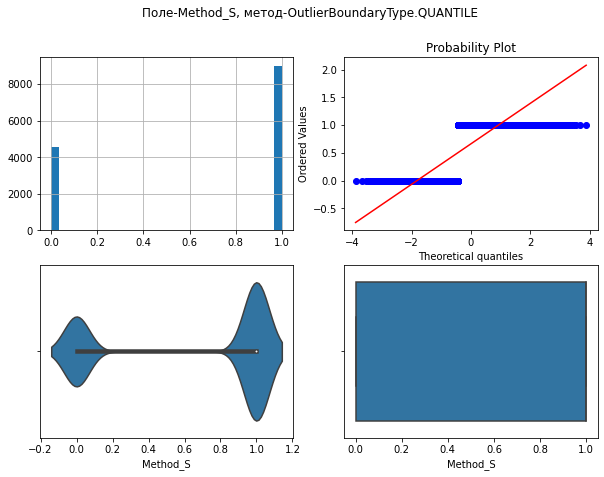

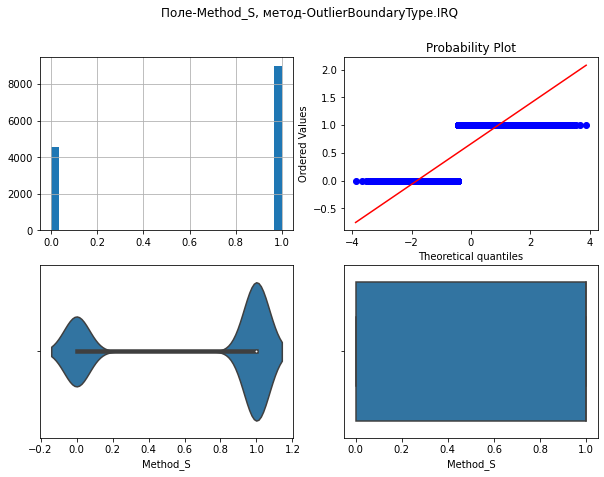

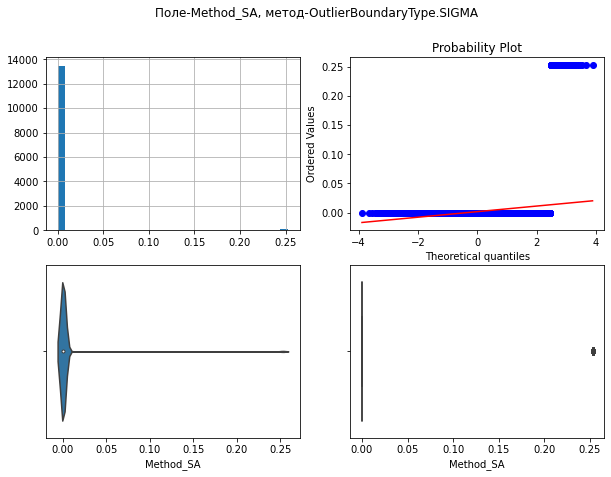

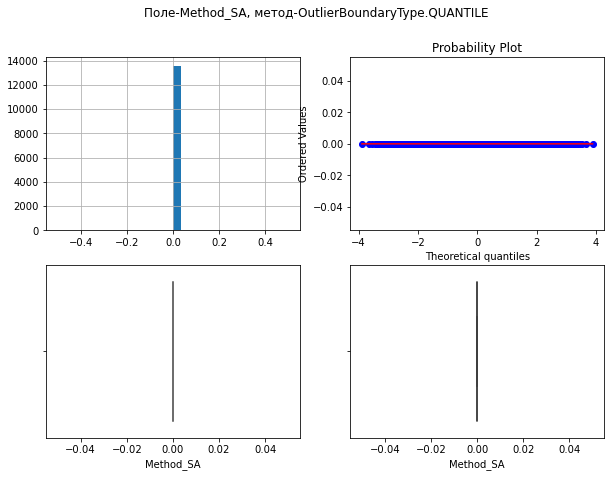

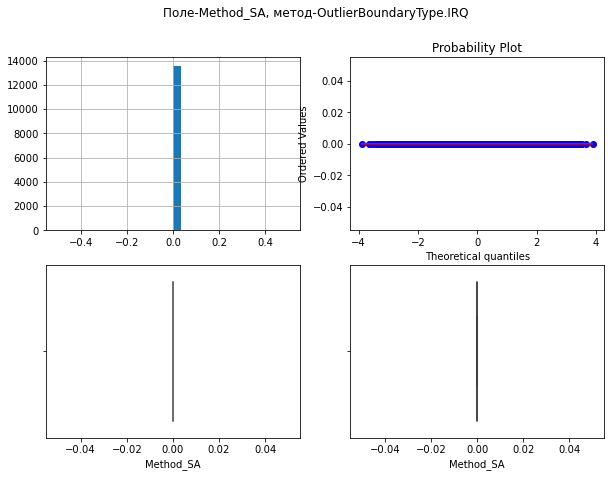

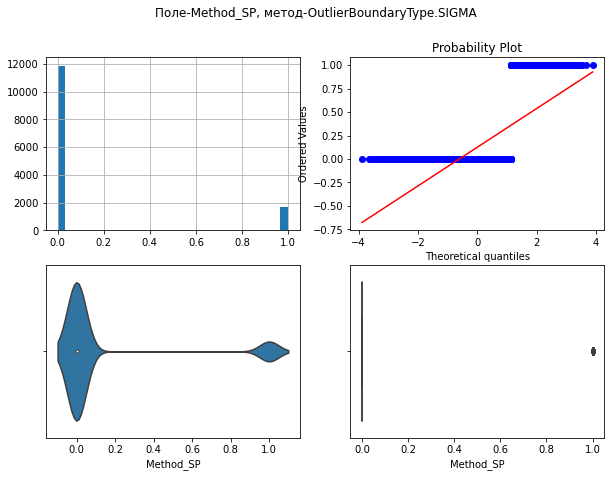

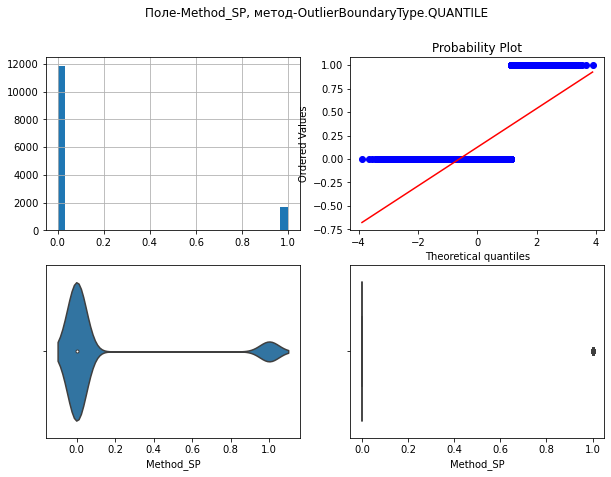

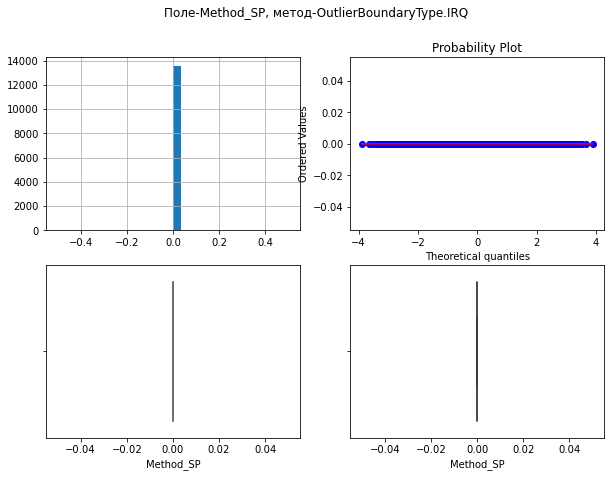

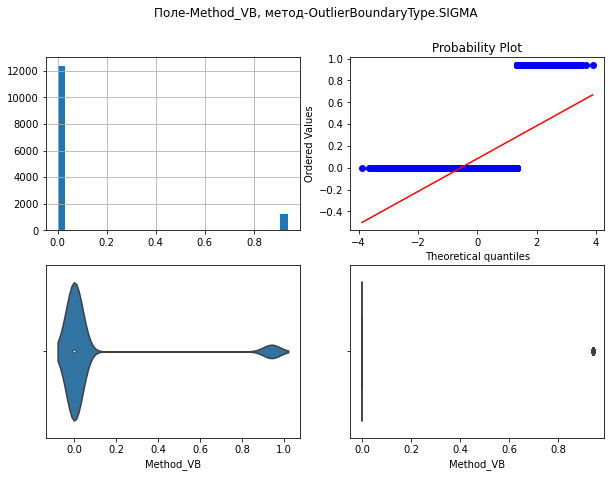

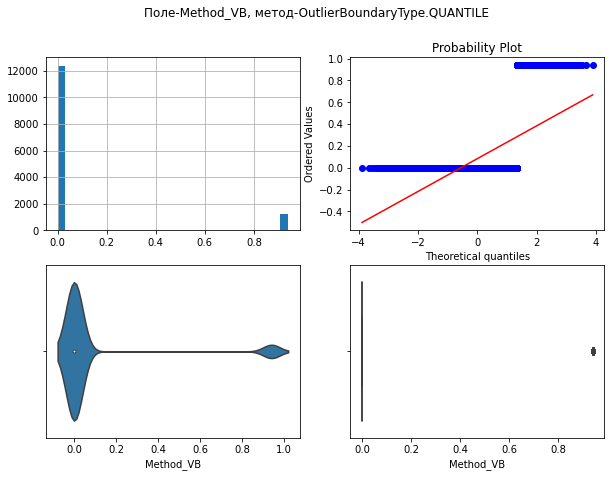

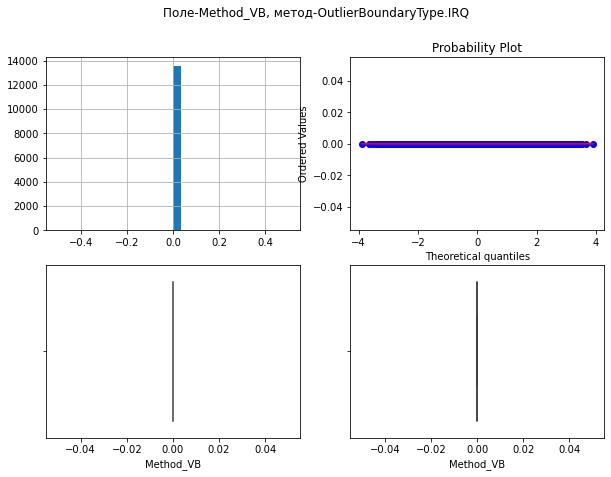

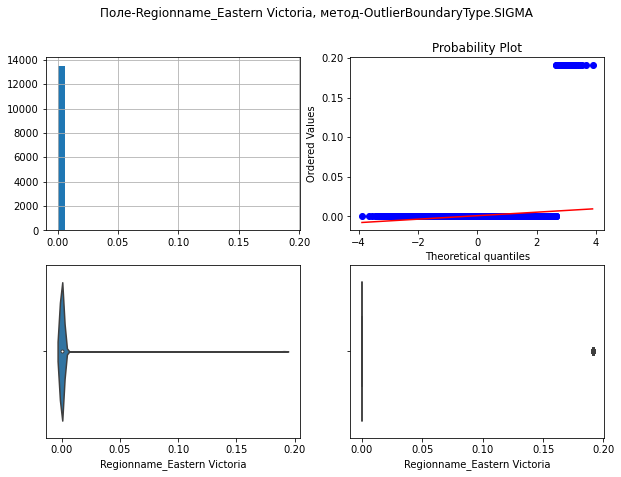

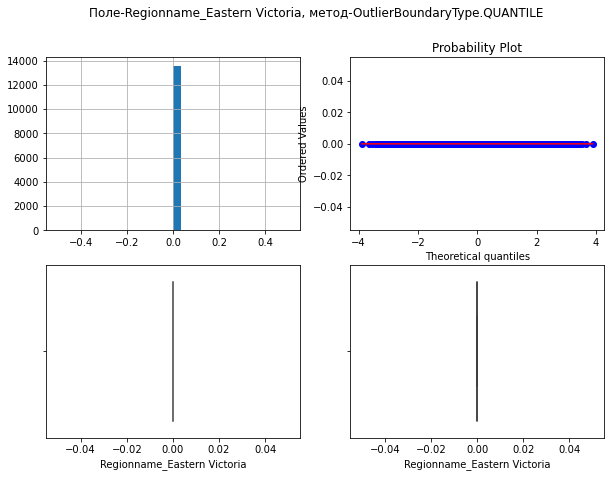

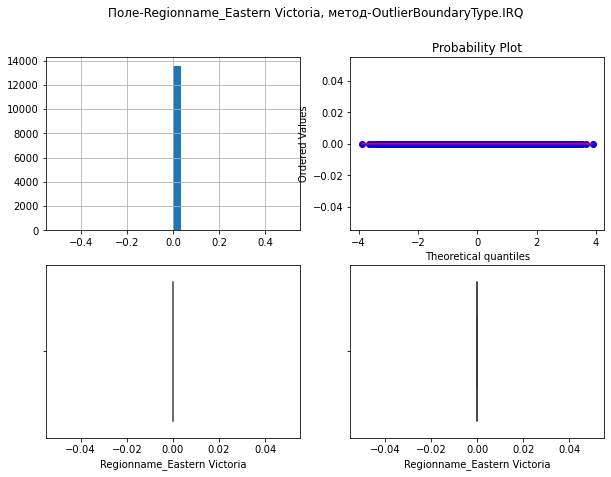

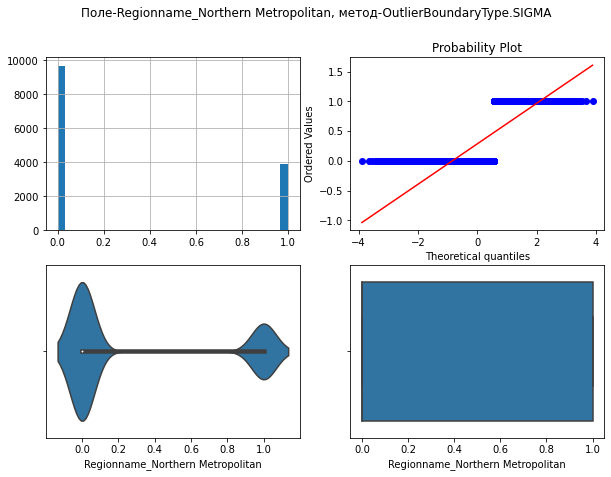

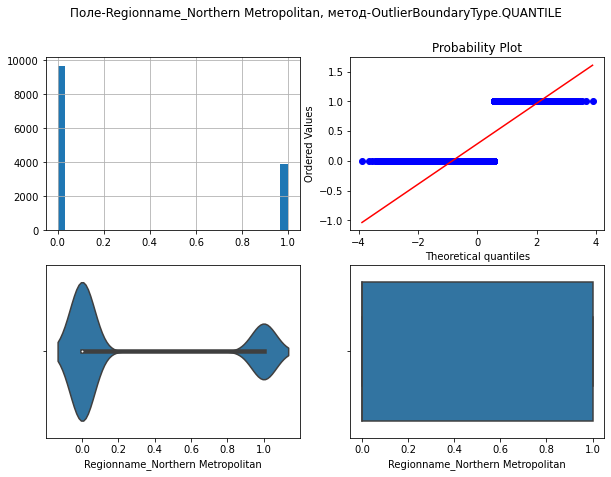

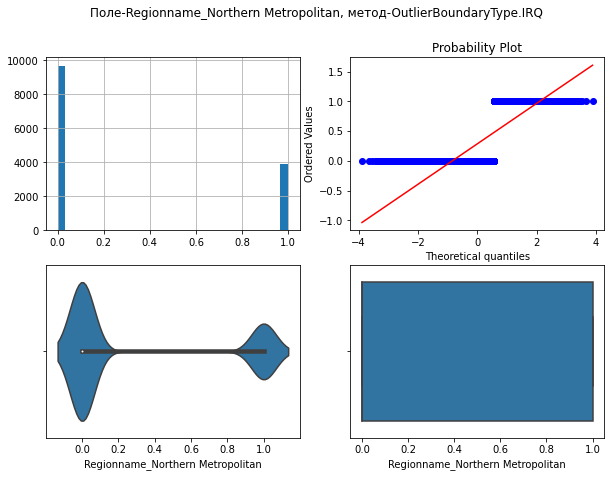

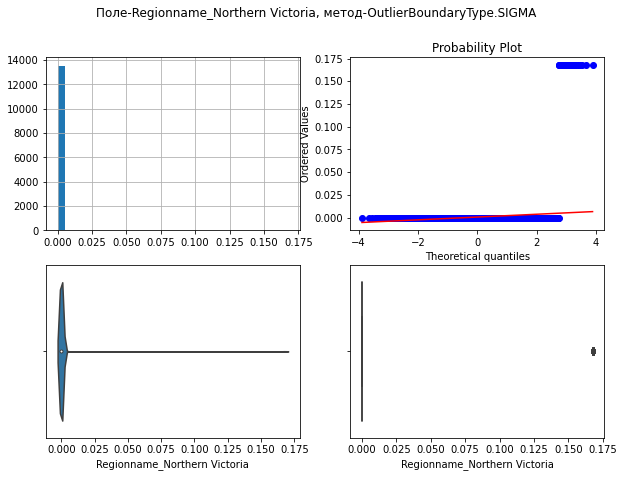

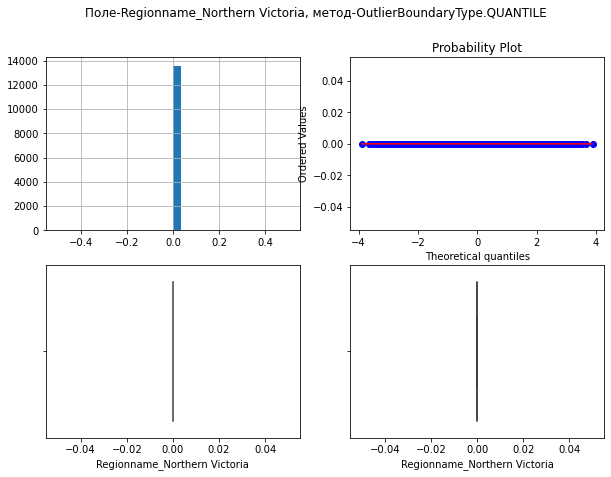

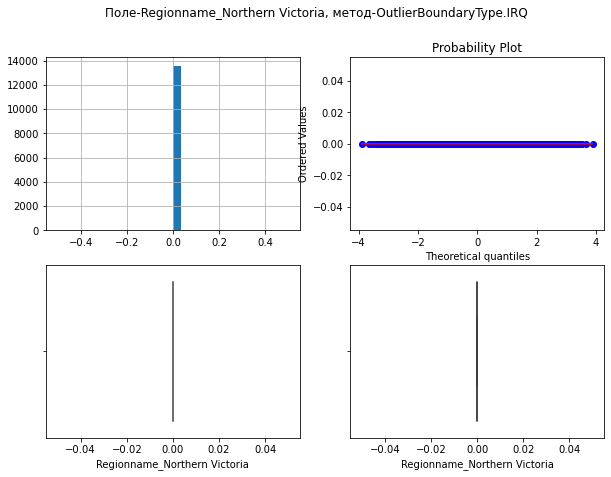

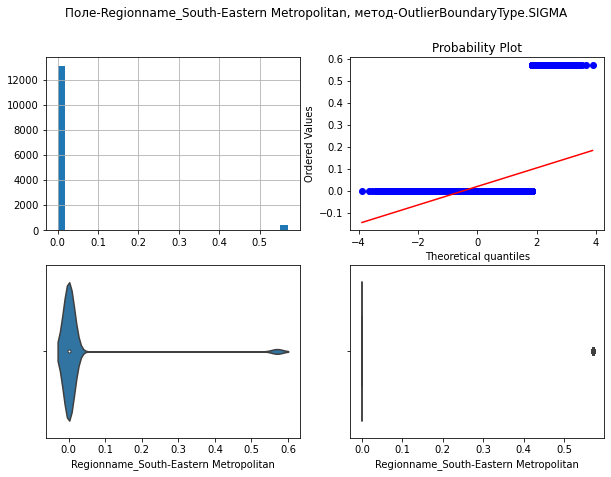

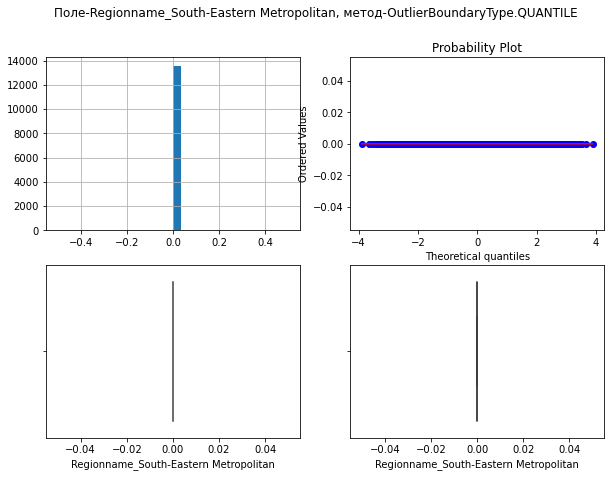

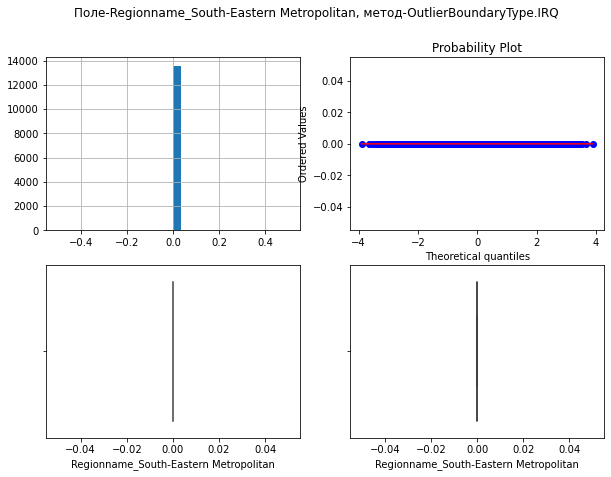

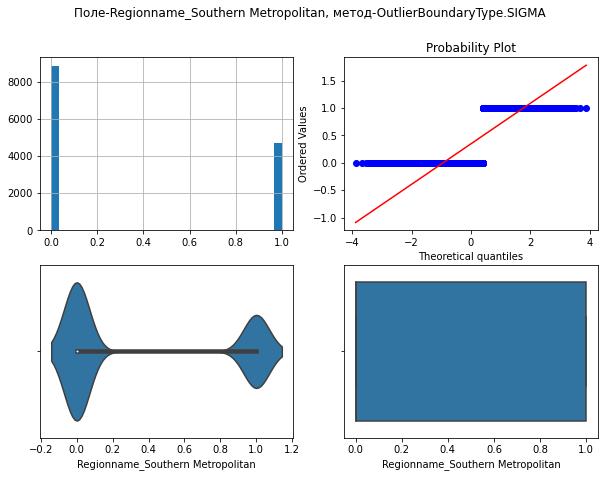

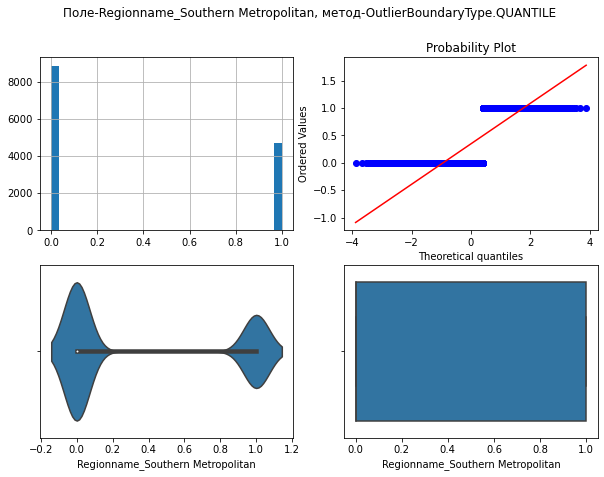

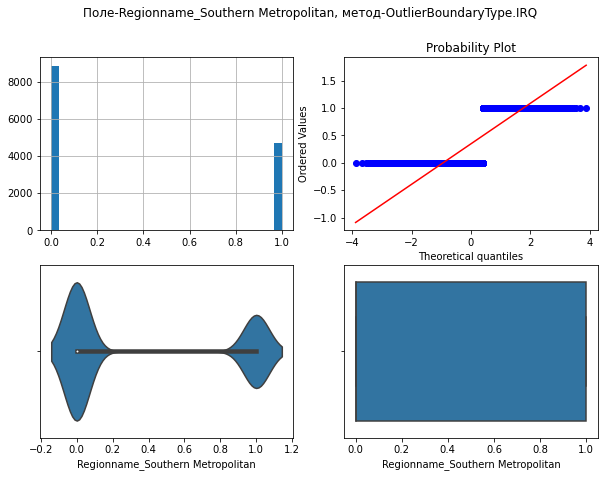

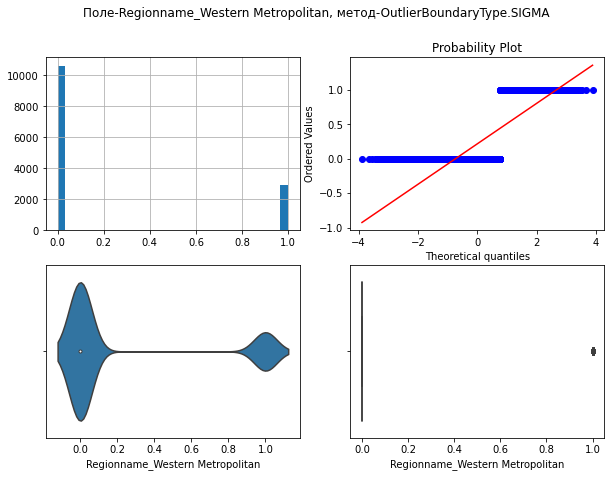

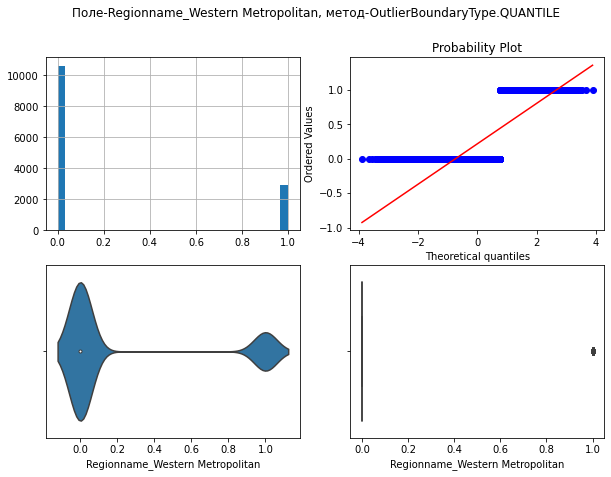

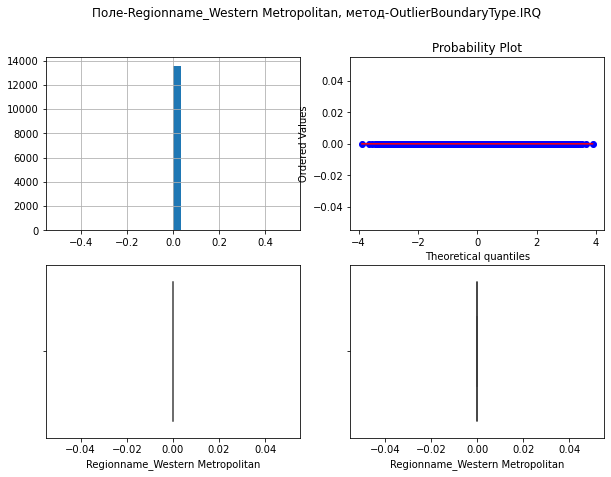

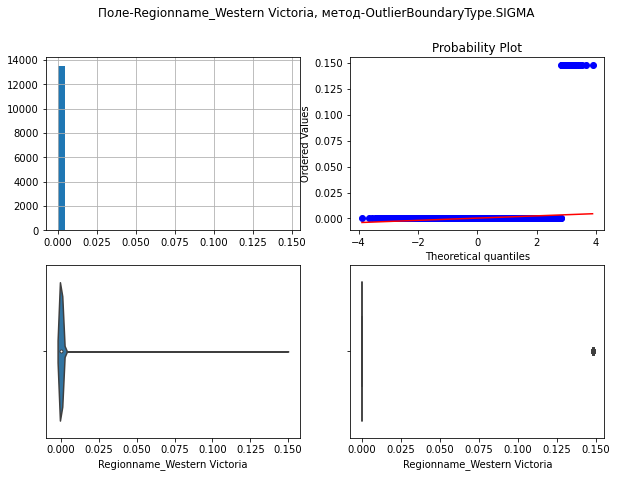

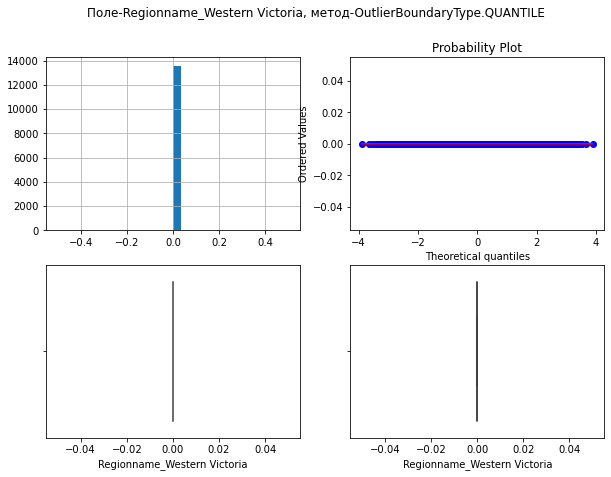

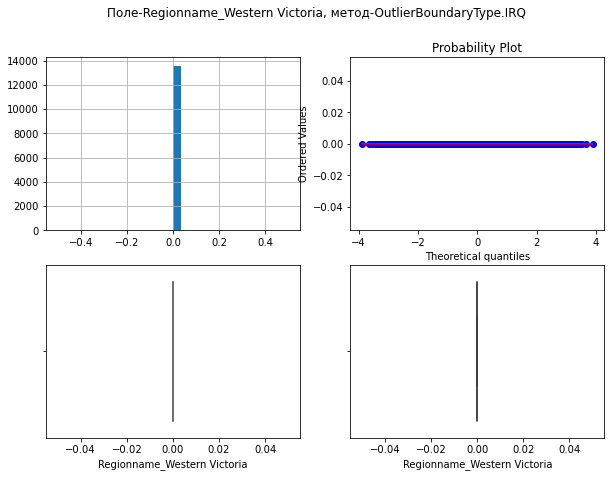

In [34]:
for col in num_cols:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots_out(data, col, title)

In [35]:
y = data['Price']
data_x = data.drop(['Price'], axis = 1)

# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(data_x, y,
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = pd.DataFrame(X_train, columns=data.columns)
X_test_df = pd.DataFrame(X_test, columns=data.columns)

X_train_df.shape, X_test_df.shape

((10864, 31), (2716, 31))

In [36]:
# Удаление выбросов
for obt in OutlierBoundaryType:
    df1 = X_train_df.copy()    
    count = 0
    for col in num_cols:
        lower_boundary, upper_boundary = get_outlier_boundaries(df1, col, obt)
        temp = np.where(df1[col] > upper_boundary, True, 
                            np.where(df1[col] < lower_boundary, True, False))
        if count==0:
            outliers = temp
        else:
            outliers = outliers + temp
        count += 1 
        
    data_train_trimmed = df1.loc[~(outliers), ]

In [37]:
# Замена выбросов
for obt in OutlierBoundaryType:
    
    df2 = X_train_df.copy()
    
    for col in num_cols:    
        lower_boundary, upper_boundary = get_outlier_boundaries(df2, col, obt)
        df2[col] = np.where(df2[col] > upper_boundary, upper_boundary, 
                                 np.where(df2[col] < lower_boundary, lower_boundary, df2[col]))

    data_train_updated = df2

In [38]:
X_train_df.shape

(10864, 31)

In [39]:
data_train_trimmed.shape

(6680, 31)

In [40]:
data_train_updated.shape

(10864, 31)

## Отбор признаков

In [98]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

#### filter method

In [54]:
def get_duplicates(X):
    pairs = {}
    dups = []
    for i in range(X.shape[1]):
        feat_outer = X.columns[i]
        if feat_outer not in dups:
            pairs[feat_outer] = []
            for feat_inner in X.columns[i + 1:]:
                if X[feat_outer].equals(X[feat_inner]):
                    pairs[feat_outer].append(feat_inner)
                    dups.append(feat_inner)
    return pairs

In [55]:
get_duplicates(data)

{'Suburb': [],
 'Address': [],
 'Rooms': [],
 'Price': [],
 'SellerG': [],
 'Date': [],
 'Distance': [],
 'Postcode': [],
 'Bedroom2': [],
 'Bathroom': [],
 'Car': [],
 'Landsize': [],
 'BuildingArea': [],
 'YearBuilt': [],
 'CouncilArea': [],
 'Lattitude': [],
 'Longtitude': [],
 'Propertycount': [],
 'Type_t': ['Type_u',
  'Method_SA',
  'Method_SP',
  'Method_VB',
  'Regionname_Eastern Victoria',
  'Regionname_Northern Victoria',
  'Regionname_South-Eastern Metropolitan',
  'Regionname_Western Metropolitan',
  'Regionname_Western Victoria'],
 'Method_S': [],
 'Regionname_Northern Metropolitan': [],
 'Regionname_Southern Metropolitan': []}

In [56]:
data = data.drop(['Type_u',
  'Method_SA',
  'Method_SP',
  'Method_VB',
  'Regionname_Eastern Victoria',
  'Regionname_Northern Victoria',
  'Regionname_South-Eastern Metropolitan',
  'Regionname_Western Metropolitan',
  'Regionname_Western Victoria'], axis = 1)

In [60]:
data_y = data['Price']
data_X = data.drop(['Price'], axis = 1)

In [94]:
from sklearn import preprocessing

lab = preprocessing.LabelEncoder()
data_y = lab.fit_transform(data_y)

Text(0, 0.5, 'Взаимная информация')

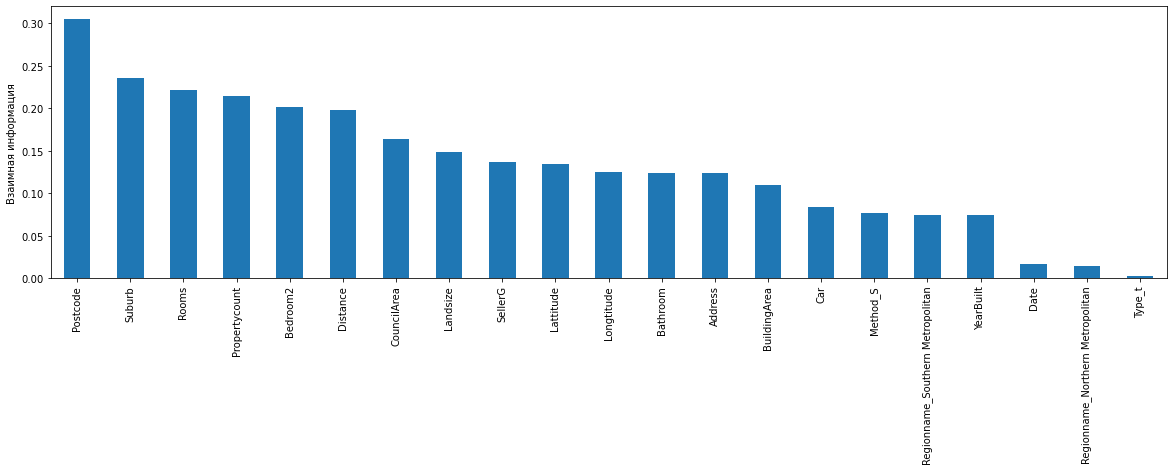

In [61]:
mi = mutual_info_regression(data_X, data_y)
mi = pd.Series(mi)
mi.index = data_X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,5))
plt.ylabel('Взаимная информация')

In [62]:
sel_mi = SelectKBest(mutual_info_regression, k=15).fit(data_X, data_y)

In [63]:
data_filter = data_X[ data_X.columns[ sel_mi.get_support() ] ]
data_filter

Suburb   Address     Rooms   SellerG  Distance  Postcode  Bedroom2  \
0      0.038339  0.949619  0.111111  0.086142  0.054054  0.068577      0.10   
1      0.038339  0.444270  0.111111  0.086142  0.054054  0.068577      0.10   
2      0.038339  0.733647  0.222222  0.086142  0.054054  0.068577      0.15   
3      0.038339  0.673096  0.222222  0.086142  0.054054  0.068577      0.15   
4      0.038339  0.791583  0.333333  0.580524  0.054054  0.068577      0.15   
...         ...       ...       ...       ...       ...       ...       ...   
13575  0.945687  0.148838  0.333333  0.059925  0.347193  0.153531      0.20   
13576  0.945687  0.914555  0.222222  0.940075  0.141372  0.016377      0.15   
13577  0.945687  0.949619  0.222222  0.726592  0.141372  0.016377      0.15   
13578  0.945687  0.949619  0.333333  0.831461  0.141372  0.016377      0.20   
13579  0.945687  0.805562  0.333333  0.895131  0.130977  0.013306      0.20   

       Bathroom  Car  Landsize  BuildingArea  CouncilArea  Lattitude  \
0         0.125  0.1  0.000466      0.002696      0.93750   0.494755   
1         0.125  0.0  0.000360      0.002361      0.93750   0.484031   
2         0.250  0.0  0.000309      0.003254      0.93750   0.482223   
3         0.250  0.1  0.000217      0.002696      0.93750   0.498243   
4         0.125  0.2  0.000277      0.003190      0.93750   0.484936   
...         ...  ...       ...           ...          ...        ...   
13575     0.250  0.2  0.001506      0.002696      0.71875   0.357781   
13576     0.250  0.2  0.000769      0.002988      0.71875   0.417664   
13577     0.250  0.3  0.001007      0.002696      0.71875   0.426100   
13578     0.125  0.3  0.002000      0.003254      0.71875   0.417909   
13579     0.125  0.1  0.000836      0.002516      0.71875   0.478889   

       Longtitude  Propertycount  
0        0.517651       0.176160  
1        0.513083       0.176160  
2        0.513997       0.176160  
3        0.516281       0.176160  
4        0.513723       0.176160  
...           ...            ...  
13575    0.659474       0.333769  
13576    0.408601       0.286482  
13577    0.416221       0.286482  
13578    0.421346       0.286482  
13579    0.413580       0.294098  

[13580 rows x 15 columns]

#### wrapper methods

In [101]:
f = ['Postcode', 'Suburb', 'Car', 'Date']

In [102]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [103]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(data_X[f], data_y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less

Best accuracy score: 0.02
Best subset (indices): (1, 2)
Best subset (corresponding names): ('Suburb', 'Car')


In [104]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(data_X[f], data_y)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less

Best accuracy score: 0.02
Best subset (indices): (2,)
Best subset (corresponding names): ('Car',)


#### embedded methods

In [84]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    labels = [x for x,_ in sorted_list]
    data = [x for _,x in sorted_list]
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

In [95]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier()
rfc1.fit(data_X, data_y)

rfc1.feature_importances_, sum(rfc1.feature_importances_)

(array([0.05171496, 0.09541201, 0.02884043, 0.06960433, 0.08923458,
        0.05848408, 0.04725837, 0.02286868, 0.021646  , 0.0343154 ,
        0.09209418, 0.04113226, 0.04903918, 0.03451678, 0.09279202,
        0.09281155, 0.05119466, 0.        , 0.01587388, 0.00599274,
        0.00517391]),
 1.0)

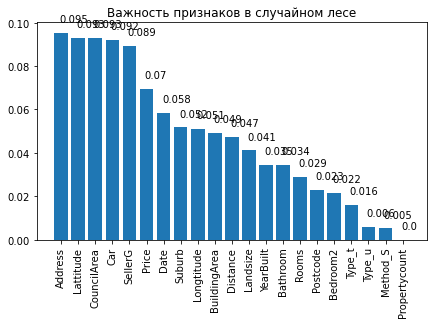

In [96]:
_,_=draw_feature_importances(rfc1, data, 'Важность признаков в случайном лесе')

In [99]:
from sklearn.feature_selection import SelectFromModel

filter_index = data_X.columns[ SelectFromModel(rfc1, threshold='0.1*mean').fit(data_X, data_y).get_support() ]


In [100]:
data_filter = data_X[filter_index]
data_filter

Suburb   Address     Rooms   SellerG      Date  Distance  Postcode  \
0      0.038339  0.949619  0.111111  0.086142  0.101471  0.054054  0.068577   
1      0.038339  0.444270  0.111111  0.086142  0.101471  0.054054  0.068577   
2      0.038339  0.733647  0.222222  0.086142  0.633824  0.054054  0.068577   
3      0.038339  0.673096  0.222222  0.086142  0.633824  0.054054  0.068577   
4      0.038339  0.791583  0.333333  0.580524  0.101471  0.054054  0.068577   
...         ...       ...       ...       ...       ...       ...       ...   
13575  0.945687  0.148838  0.333333  0.059925  0.847059  0.347193  0.153531   
13576  0.945687  0.914555  0.222222  0.940075  0.847059  0.141372  0.016377   
13577  0.945687  0.949619  0.222222  0.726592  0.847059  0.141372  0.016377   
13578  0.945687  0.949619  0.333333  0.831461  0.847059  0.141372  0.016377   
13579  0.945687  0.805562  0.333333  0.895131  0.847059  0.130977  0.013306   

       Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0          0.10     0.125  0.1  0.000466      0.002696   0.941606   
1          0.10     0.125  0.0  0.000360      0.002361   0.902068   
2          0.15     0.250  0.0  0.000309      0.003254   0.902068   
3          0.15     0.250  0.1  0.000217      0.002696   0.941606   
4          0.15     0.125  0.2  0.000277      0.003190   0.975061   
...         ...       ...  ...       ...           ...        ...   
13575      0.20     0.250  0.2  0.001506      0.002696   0.954988   
13576      0.15     0.250  0.2  0.000769      0.002988   0.972019   
13577      0.15     0.250  0.3  0.001007      0.002696   0.974453   
13578      0.20     0.125  0.3  0.002000      0.003254   0.902068   
13579      0.20     0.125  0.1  0.000836      0.002516   0.902068   

       CouncilArea  Lattitude  Longtitude  Propertycount  Method_S  \
0          0.93750   0.494755    0.517651       0.176160       1.0   
1          0.93750   0.484031    0.513083       0.176160       1.0   
2          0.93750   0.482223    0.513997       0.176160       0.0   
3          0.93750   0.498243    0.516281       0.176160       0.0   
4          0.93750   0.484936    0.513723       0.176160       0.0   
...            ...        ...         ...            ...       ...   
13575      0.71875   0.357781    0.659474       0.333769       1.0   
13576      0.71875   0.417664    0.408601       0.286482       0.0   
13577      0.71875   0.426100    0.416221       0.286482       1.0   
13578      0.71875   0.417909    0.421346       0.286482       0.0   
13579      0.71875   0.478889    0.413580       0.294098       0.0   

       Regionname_Northern Metropolitan  Regionname_Southern Metropolitan  
0                                   1.0                               0.0  
1                                   1.0                               0.0  
2                                   1.0                               0.0  
3                                   1.0                               0.0  
4                                   1.0                               0.0  
...                                 ...                               ...  
13575                               0.0                               0.0  
13576                               0.0                               0.0  
13577                               0.0                               0.0  
13578                               0.0                               0.0  
13579                               0.0                               0.0  

[13580 rows x 20 columns]